# INITIALIZATION

## (S) Choosing Runtime Type

In [ ]:
# Choosing whether to work with a local or a hosted runtime

runtime_type = 0 # 0 - Local runtime. 1 - Hosted runtime.

if runtime_type:
  print('A hosted runtime was chosen.\n')
  # Mounting Google drive - use only when connecting to a hosted runtime
  from google.colab import drive
  drive.mount('/content/drive')

else:
  print('A local runtime was chosen.\n')

# Check whether a CPU or a GPU is used
print('Presenting the GPU device name (if nothing is printed then it\'s a CPU):')
import tensorflow as tf
tf.test.gpu_device_name()
print('\n')

# Print local devices to check which CPU or GPU is used
print('Presenting a list of local devices:')
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

A local runtime was chosen.

Presenting the GPU device name (if nothing is printed then it's a CPU):


Presenting a list of local devices:


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7182278436398816255]

**How to connect to a local runtime** \
(Instructions from: https://research.google.com/colaboratory/local-runtimes.html) \
\
1) Install Jupyter \
2) Install and enable the "jupyter_http_over_ws" jupyter extension (do this only once). This can be done in the "Anaconda Prompt", by entering: \
pip install jupyter_http_over_ws \
jupyter serverextension enable --py jupyter_http_over_ws \
3) Start a server and authenticate, by entering the following in the "Anaconda Prompt", with the wanted port number (the default is "8888", and you can also use "8889", "8890", etc.): \
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0 \
4) Copy the "http://localhost:something/?token=something" \
5) Connect to a local runtime in Google colab. On the top right side, click the small downward arrow, select "Connect to local runtime" and paste what you copied \
6) To close Jupyter, enter in "Anaconda Prompt": \
jupyter notebook stop \
To stop a server, enter the following, where "XXXX" is the port number: \
jupyter notebook stop XXXX \
Alternatively, click the "Logout" button in the top right corner in the notebook in the browser. \
\
To see the running notebooks, enter in "Anaconda Prompt": \
jupyter notebook list \


## (S) Importing Modules

If a local runtime is used, be sure to install the following packagas, which can be done by installing "pip" and running the following in "Anaconda Prompt": \
pip install scipy \
pip install matplotlib \
pip install tensorflow \
pip install Keras \

In [ ]:
# Mathematical tools libraries
import math

# Mathematical tools libraries, especially arrays
import numpy as np

# Numerical functions libraries
from scipy.optimize import minimize, curve_fit
from scipy.optimize import fsolve, root_scalar, brentq, brenth, ridder, bisect, newton, toms748, golden # secant, halley
from scipy.stats import gaussian_kde

# 2D plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rc # For fonts
from matplotlib import rcParams # For fonts

# Plotting color libraries
from termcolor import colored
from colorama import Fore, Back, Style

# Machine learning libraries
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv1D, Reshape
from keras.optimizers import Adam

# import keras
# from keras.models import Model
# from keras.layers import Input, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Conv2DTranspose
# from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Lambda
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.merge import add, concatenate
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.preprocessing.image import ImageDataGenerator

# from tensorflow.python.keras import backend as k

# Date and time libraries
import datetime

## (!) Planning Session

### Training Data Settings

In [ ]:
# Training data settings

# Choosing directories & filenames
data_train_directory_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Data/'
data_train_directory_hosted = '/content/drive/My Drive/Colab Notebooks/Data/'

data_train_session_id = 'prl_simulation_211029_150k_testing_sig' # Use a string with the date and version, followed by an underscore, e.g. '200216_v5' for the fifth version at 16.2.2020

# Choosing which sections to run
data_train_generate_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
data_train_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
data_train_load_flag = 1

# Choosing data generation parameters
data_train_use_fixed_random_seed = 1 # Use a fixed random seed value
data_train_random_seed_value = 0 # Random seed value for generating the data

data_train_num_samples = 600000 # Number of training samples

data_train_num_bins = 100
data_train_set_mass_bins = 0 # 0 - Don't scale the mass bins, 1 - scale the mass bins. Notice that the signal means should be modified accordingly
data_train_mass_bins_edges_min = 100 # [GeV]. Was 100
data_train_mass_bins_edges_max = 200 # [GeV]. Was 200

data_train_bg_random_edges = 1 # 0 - Don't randomize the height of the edges of the background. 1 - Randomize.
data_train_bg_min = 100 # Was 100 in the class function and 10 in the generate data section
data_train_bg_max = 10000 # Was 10000
data_train_bg_num_bgs_to_sum = 1 # The number of randomized curves that the BG will be a sum of
data_train_bg_exponent = 1 # 0 - Don't include this type of background curve in the data. 1 - Include.
data_train_bg_line = 1
data_train_bg_one_over_x = 1
data_train_bg_one_over_x_squared = 1
data_train_bg_one_over_x_cubed = 1
data_train_bg_one_over_x_to_4th = 1
data_train_bg_parabola_half = 1
data_train_bg_ln_negative = 1
data_train_bg_cos_quarter = 1
data_train_bg_cosh_half = 1

data_train_add_signal = 1 # 0 - Nullify the signal. 1 - Calculate the signal as usual
data_train_sig_mean_bin_min = 25 # The minimal bin in which the signal's mean will be
data_train_sig_mean_bin_max = 76
data_train_sig_width_min = 3 # [GeV] # USE A VALUE >1 OR Z WON'T BE POSSIBLE TO CALCULATE! Was 3 in the class function and 9 in the generate data section
data_train_sig_width_max = 3 # [GeV]
data_train_sig_height_min = 1 # The desired significance of the signal relative to the background
data_train_sig_height_max = 20

data_train_fluct_type = 1 # 1 - Add fluctuations only to the background, 2 - only to the signal, 3 - only to the sum of the background and the signal, other value - don't add fluctuations

data_train_z_calc_type = 1 # 1 - Calculate z using the full profile likelihood calculation, 2 - use a simplified calculation, other value - use an approximation

# Choosing preprocessing parameters
data_train_shuffle_order = 0 # Used in preprocessing. Randomly shuffles the order of the data samples
data_train_bg_knowledge = 3 # Used in preprocessing. 1 - Known BG, 2 - partially known BG, 3 - unknown BG
data_train_filter_by_z = 0 # Used in preprocessing. 0 - Don't filter the samples by their true maximal z. 1 - Keep only the samples in which the true maximal z is in a certain range
data_train_filter_by_z_min = 2.999 # Used in preprocessing. The range of true maximal z that samples which are inside it are kept for usage
data_train_filter_by_z_max = 3.001

In [ ]:
# Presenting the mass bins
num_bins_demo = data_train_num_bins
mass_bins_indices_demo = np.arange(1, num_bins_demo+1) # Returns [num1, num2). For 100 bins: 1, 2, ... 100
mass_bins_edges_demo = np.arange(0, num_bins_demo + 1) # For 100 bins: 0, 1, ... 100. This changes by set_mass_bins()
mass_bins_centers_demo = 0.5*(mass_bins_edges_demo[1:]+mass_bins_edges_demo[:-1]) # For 100 bins: 0.5, 1.5, ... 99.5. The length is 100. This changes by set_mass_bins()
means_possible_values_demo = mass_bins_centers_demo[(data_train_sig_mean_bin_min-1) : (data_train_sig_mean_bin_max)]

print('Presenting the mass bins, while neglecting their potential scaling, which could be set in the settings.\n')
print('The amount of the bins is:\n', data_train_num_bins, '\n')
print('The indices of the bins are:\n', mass_bins_indices_demo, '\n')
print('The mass values on the X axis (BEFORE SCALING) of the edges of the bins are:\n', mass_bins_edges_demo, '\n')
print('The mass values on the X axis (BEFORE SCALING) of the centers of the bins are:\n', mass_bins_centers_demo, '\n')
print('The indices of the the minimal and maximal bins that the means of the bumps can be in are:\n',
      data_train_sig_mean_bin_min, data_train_sig_mean_bin_max, '\n')

print('=> The mass values on the X axis (BEFORE SCALING) of the means of the bumps can be:\n', means_possible_values_demo, '\n')
print('The amount of mass values on the X axis (BEFORE SCALING) that the means of the bumps can have is:\n', len(means_possible_values_demo), '\n')

Presenting the mass bins, while neglecting their potential scaling, which could be set in the settings.

The amount of the bins is:
 100 

The indices of the bins are:
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100] 

The mass values on the X axis (BEFORE SCALING) of the edges of the bins are:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84

### Testing Data Settings

In [ ]:
# Testing data settings

# Choosing directories & filenames
data_test_directory_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Data/'
data_test_directory_hosted = '/content/drive/My Drive/Colab Notebooks/Data/'

data_test_session_id = 'prl_simulation_211029_150k_testing_sig' # Use a string with the date and version, followed by an underscore, e.g. '200216_v5' for the fifth version at 16.2.2020

# Choosing which sections to run
data_test_generate_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
data_test_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
data_test_load_flag = 1

# Choosing data generation parameters
data_test_use_fixed_random_seed = 1 # Use a fixed random seed value
data_test_random_seed_value = 1 # Random seed value for generating the data

data_test_num_samples = 150000 # Number of testing samples

data_test_num_bins = 100
data_test_set_mass_bins = 0 # 0 - Don't scale the mass bins, 1 - scale the mass bins. Notice that the signal means should be modified accordingly
data_test_mass_bins_edges_min = 100 # [GeV]. Was 100
data_test_mass_bins_edges_max = 200 # [GeV]. Was 200

data_test_bg_random_edges = 1 # 0 - Don't randomize the height of the edges of the background. 1 - Randomize.
data_test_bg_min = 100 # Was 100 in the class function and 10 in the generate data section
data_test_bg_max = 10000 # Was 10000
data_test_bg_num_bgs_to_sum = 1 # The number of randomized curves that the BG will be a sum of
data_test_bg_exponent = 1 # 0 - Don't include this type of background curve in the data. 1 - Include.
data_test_bg_line = 1
data_test_bg_one_over_x = 1
data_test_bg_one_over_x_squared = 1
data_test_bg_one_over_x_cubed = 1
data_test_bg_one_over_x_to_4th = 1
data_test_bg_parabola_half = 1
data_test_bg_ln_negative = 1
data_test_bg_cos_quarter = 1
data_test_bg_cosh_half = 1

data_test_add_signal = 1 # 0 - Nullify the signal. 1 - Calculate the signal as usual
data_test_sig_mean_bin_min = 25 # The minimal bin in which the signal's mean will be
data_test_sig_mean_bin_max = 76
data_test_sig_width_min = 3 # [GeV] # USE A VALUE >1 OR Z WON'T BE POSSIBLE TO CALCULATE! Was 3 in the class function and 9 in the generate data section
data_test_sig_width_max = 3 # [GeV]
data_test_sig_height_min = 3 # The desired significance of the signal relative to the background
data_test_sig_height_max = 3

data_test_fluct_type = 1 # 1 - Add fluctuations only to the background, 2 - only to the signal, 3 - only to the sum of the background and the signal, other value - don't add fluctuations

data_test_z_calc_type = 1 # 1 - Calculate z using the full profile likelihood calculation, 2 - use a simplified calculation, other value - use an approximation

# Choosing preprocessing parameters
data_test_shuffle_order = 0 # Used in preprocessing. Randomly shuffles the order of the data
data_test_bg_knowledge = 3 # Used in preprocessing. 1 - Known BG, 2 - partially known BG, 3 - unknown BG
data_test_filter_by_z = 0 # Used in preprocessing. 0 - Don't filter the samples by their true maximal z. 1 - Keep only the samples in which the true maximal z is in a certain range
data_test_filter_by_z_min = 2.999 # Used in preprocessing. The range of true maximal z that samples which are inside it are kept for usage
data_test_filter_by_z_max = 3.0001

### Training & Testing Data Settings

In [ ]:
# Training and testing data settings

data_train_test_scale_together = 1 # Scale the training and testing data together, by concatenating them

### Machine Learning Settings

In [ ]:
# Machine learning settings

# Choosing directories & filenames
ml_model_directory_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Models/'
ml_predict_directory_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Predictions/'
ml_model_directory_hosted = '/content/drive/My Drive/Colab Notebooks/Models/'
ml_predict_directory_hosted = '/content/drive/My Drive/Colab Notebooks/Predictions/'

ml_model_session_id = 'prl_simulation_211029_150k_testing_sig' # Session ID of the NN model. Use a string with the date and version, followed by an underscore, e.g. '200216_v5' for the fifth version at 16.2.2020
ml_predict_session_id = 'prl_simulation_211029_150k_testing_sig' # Session ID of the predictions

# Choosing which sections to run
ml_model_define_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
ml_model_train_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
ml_model_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
ml_model_load_flag = 1
ml_history_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
ml_history_load_flag = 1

ml_predict_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
ml_predict_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
ml_predict_load_flag = 1

# Choosing parameters
ml_use_fixed_random_seed = 1 # Use a fixed random seed value
ml_random_seed_value = 2 # Random seed value

ml_loss_function = 'mse' # Loss function = Object the ML algorithm minimizes
ml_optimizer = Adam(lr=0.0003) # Optimizer = Algorithm for how to minimize. Was Adam(lr=0.0003)

ml_training_epochs = 300
ml_training_batch_size = 100
ml_training_validation_split = 0.2 # number of validation samples / number of training samples

ml_filter_by_mass = 0 # How to filter the samples by how close their predicted mass of max z is to the true mass of max z
# 0 - Don't filter the samples by how close their predicted mass of max z is to the true mass of max z
# 1 - Keep samples in which the predicted mass of max z is close enough to the true one
# 2 - Keep samples in which the predicted max z is far enough from the true one
ml_filter_by_mass_diff = 1 # The allowed difference between the masses of the predicted and true maximal z. Used if ml_filter_by_mass != 0

ml_z_range_size = 0.25 # Used for plotting predictions evaluation per range of z values

### Plotting Settings

In [ ]:
# Plotting settings

# Choosing directories & filenames
plot_directory_local = 'C:/Sergey\'s Google Drive/Colab Notebooks/Plots/'
plot_directory_hosted = '/content/drive/My Drive/Colab Notebooks/Plots/'

plot_session_id = 'prl_simulation_211029_150k_testing_sig' # Use a string with the date and version, followed by an underscore, e.g. '200216_v5' for the fifth version at 16.2.2020

# Choosing which sections to run
plot_data_z_flag = 1
plot_data_mu_flag = 1
plot_data_width_flag = 1
plot_data_signal_flag = 1

plot_data_train_example_flag = 1
plot_data_train_example_number = 1 # Which sample to plot as an example
plot_data_train_flag = 0 # Plot all of the samples. Notice that this may take a long time!
plot_data_train_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !

plot_data_test_example_flag = 1
plot_data_test_example_number = 1 # Which sample to plot as an example
plot_data_test_flag = 0 # Plot all of the samples. Notice that this may take a long time!
plot_data_test_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !

plot_data_preprocessed_max_z_histogram_flag = 0
plot_data_preprocessed_train_example_flag = 1
plot_data_preprocessed_test_example_flag = 1
plot_data_preprocessed_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !

plot_loss_flag = 1
plot_accuracy_flag = 0
plot_predict_flag = 1
plot_ml_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !

plot_paper_flag = 1
plot_paper_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !

# Choosing plotting parameters
verbose_percentage = 10 # After how many percents of the generated data to notify the user

font_size = 16 # For font you can also use the following parameter inside set_title: fontdict={'fontsize': 20}
tick_size = font_size - 2

In [ ]:
# # Setting the font

# font = {'family':'serif', 'serif': ['cmr10']}
# # font = {'family':'serif', 'serif': ['computer modern roman']}
# # font = {'family':'serif','size':16, 'serif': ['computer modern roman']}
# # font = {'family':'serif', 'serif': ['Computer Modern Sans Serif']}
# plt.rc('font',**font)

# params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
# plt.rcParams.update(params)

# plt.rcParams['text.usetex'] = True 
# plt.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'cm'

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)

# font_family = 'serif'
# # font_family = 'sans-serif'
# plt.rcParams.update({'font.family':font_family}) # Setting the font globally

# font_from_family = 'Computer Modern' # The LaTeX font
# # font_from_family = 'cmr10' # "Computer Modern Sans Serif" is named "cmr10"
# # font_from_family = 'STIXGeneral'
# # Notice that "computer modern" does not include accented characters (unlike latin modern). Perhaps use "Stix": mpl.rc('font', family = 'serif', serif = 'STIXGeneral')
# plt.rcParams.update({'font.serif':font_from_family}) # Setting the font name for a font family

## (S) Adjusting Directories

In [ ]:
# Selecting the appropriate directories according to the type of runtime

if runtime_type: # If a hosted runtime was chosen
  data_train_directory = data_train_directory_hosted
  data_test_directory = data_test_directory_hosted
  ml_model_directory = ml_model_directory_hosted
  ml_predict_directory = ml_predict_directory_hosted
  plot_directory = plot_directory_hosted

else: # If a local runtime was chosen
  data_train_directory = data_train_directory_local
  data_test_directory = data_test_directory_local
  ml_model_directory = ml_model_directory_local
  ml_predict_directory = ml_predict_directory_local
  plot_directory = plot_directory_local

## (!!!) Overriding Session Plan

In [ ]:
###################### OVERRIDING SESSION PLAN ######################
override_single_session_id_flag = 0 # Use a single session ID for all of the sections
single_session_id = 'prl_simulation_211029_150k_testing_sig' # Use a string with the date and version, followed by an underscore, e.g. '200216_v5' for the fifth version at 16.2.2020

override_data_single_settings_flag = 0 # Use almost the same settings of the training data for the testing data, EXCEPT: DIRECTORIES, FILENAMES & NUMBER OF SAMPLES!

override_data_train_calc_and_save_flag = 0 # Calculate and save in the training data generation sections
override_data_train_load_flag = 1 # Don't calculate and load in the training data generation sections

override_data_test_calc_and_save_flag = 0 # Calculate and save in the testing data generation sections
override_data_test_load_flag = 1 # Don't calculate and load in the testing data generation sections

override_ml_train_calc_and_save_flag = 0 # Calculate and save in the machine learning training sections
override_ml_train_load_flag = 1 # Don't calculate and load in the machine learning training sections

override_ml_predict_calc_and_save_flag = 0 # Calculate and save in the machine learning predicting sections
override_ml_predict_load_flag = 1 # Don't calculate and load in the machine learning predicting sections
#####################################################################

# Session ID settings
if override_single_session_id_flag:
  data_train_session_id = single_session_id
  data_test_session_id = single_session_id
  ml_model_session_id = single_session_id
  ml_predict_session_id = single_session_id
  plot_session_id = single_session_id

# Testing data settings = Training data settings
if override_data_single_settings_flag:
  # Choosing which sections to run
  data_test_generate_flag = data_train_generate_flag # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_test_save_flag = data_train_save_flag # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_test_load_flag = data_train_load_flag

  # Choosing data generation parameters
  data_test_num_bins = data_train_num_bins
  data_test_mass_bins_edges_min = data_train_mass_bins_edges_min # [GeV]. Was 300
  data_test_mass_bins_edges_max = data_train_mass_bins_edges_max # [GeV]. Was 600

  data_test_bg_random_edges = data_train_bg_random_edges # 0 - Don't randomize the height of the edges of the background. 1- Randomize.
  data_test_bg_min = data_train_bg_min # Was 200 in the class function and 10 in the generate data section
  data_test_bg_max = data_train_bg_max
  data_test_bg_exponent = data_train_bg_exponent # 1 - Include this type of background curve in the data. 0 - Don't include
  data_test_bg_line = data_train_bg_line
  data_test_bg_one_over_x = data_train_bg_one_over_x
  data_test_bg_one_over_x_squared = data_train_bg_one_over_x_squared
  data_test_bg_one_over_x_cubed = data_train_bg_one_over_x_cubed
  data_test_bg_one_over_x_to_4th = data_train_bg_one_over_x_to_4th
  data_test_bg_parabola_half = data_train_bg_parabola_half
  data_test_bg_ln_negative = data_train_bg_ln_negative
  data_test_bg_cos_quarter = data_train_bg_cos_quarter
  data_test_bg_cosh_half = data_train_bg_cosh_half

  data_test_add_signal = data_train_add_signal # 0 - Nullify the signal. 1 - Calculate the signal as usual
  data_test_sig_mean_bin_min = data_train_sig_mean_bin_min # Notice to not set the mean on the mass bins edges
  data_test_sig_mean_bin_max = data_train_sig_mean_bin_max
  data_test_sig_width_min = data_train_sig_width_min # [GeV] # USE A VALUE >1 OR Z WON'T BE POSSIBLE TO CALCULATE! Was 3 in the class function and 9 in the generate data section
  data_test_sig_width_max = data_train_sig_width_max # [GeV]
  data_test_sig_height_min = data_train_sig_height_min # The desired significance of the signal relative to the background
  data_test_sig_height_max = data_train_sig_height_max

  data_test_fluct_type = data_train_fluct_type # 1 - Add fluctuations only to the background, 2 - only to the signal, 3 - only to the sum of the background and the signal, other value - don't add fluctuations

  data_test_z_calc_type = data_train_z_calc_type # 1 - Calculate z using the full profile likelihood calculation, 2 - use a simplified calculation, other value - use an approximation

  # Choosing preprocessing parameters
  data_test_shuffle_order = data_train_shuffle_order # Used in preprocessing. Randomly shuffles the order of the data
  data_test_bg_knowledge = data_train_bg_knowledge # Used in preprocessing. 1 - Known BG, 2 - partially known BG, 3 - unknown BG
  data_test_filter_by_z = data_train_filter_by_z # Used in preprocessing. 0 - Don't filter the samples by their true maximal z. 1 - Keep only the samples in which the true maximal z is in a certain range
  data_test_filter_by_z_min = data_train_filter_by_z_min # Used in preprocessing. The range of true maximal z that samples which are inside it are kept for usage
  data_test_filter_by_z_max = data_train_filter_by_z_max

# Training data settings
if override_data_train_calc_and_save_flag:
  data_train_generate_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_train_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_train_load_flag = 0

elif override_data_train_load_flag:
  data_train_generate_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_train_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_train_load_flag = 1

# Testing data settings
if override_data_test_calc_and_save_flag:
  data_test_generate_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_test_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_test_load_flag = 0

elif override_data_test_load_flag:
  data_test_generate_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_test_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  data_test_load_flag = 1

# Machine learning training settings
if override_ml_train_calc_and_save_flag:
  ml_model_define_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_model_train_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_model_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_model_load_flag = 0
  ml_history_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_history_load_flag = 0

elif override_ml_train_load_flag:
  ml_model_define_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_model_train_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_model_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_model_load_flag = 1
  ml_history_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_history_load_flag = 1

# Machine learning predicting settings
if override_ml_predict_calc_and_save_flag:
  ml_predict_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_predict_save_flag = 1 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_predict_load_flag = 0

elif override_ml_predict_load_flag:
  ml_predict_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_predict_save_flag = 0 # C A R E   T O   N O T   O V E R W R I T E ! ! !
  ml_predict_load_flag = 1

# DATA GENERATION

## (T) Timing Section

In [ ]:
time_data_gen_start = datetime.datetime.now()
print(time_data_gen_start)

2021-11-09 20:54:55.465999


## (D) Defining Functions

In [ ]:
def find_bin_index(x, bins_edges):
  """Return the index of the bin containing x."""
  # Example:
  # a = np.array([0.2, 6.4, 3.0, 1.6])
  # bins_edges = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
  # indices = np.digitize(a, bins_edges)
  # => indices = array([1, 4, 3, 2])
  return np.digitize(x, bins_edges) - 1 # The "-1" is needed since the bins start at 0
  
def scale(X):
  """Scale the array X into the interval [0,1]."""
  X_max, X_min = X.max(), X.min()
  scaler_m = 1./(X_max - X_min)
  scaler_c = -X_min*scaler_m
  scaled_X = scaler_m*X + scaler_c # map to [0,1] globally
  return scaled_X, scaler_m, scaler_c

def inv_scale(scaled_X, scaler_m, scaler_c):
  return (scaled_X - scaler_c)/scaler_m

def area_trapezoidal(x, y):
  """Calculate the area under the function given by the coordinates (x,y),
  using the trapezoidal rule."""
  # Sorting the coordinates according to their x values
  sort_order = np.argsort(x)
  x = x[sort_order]
  y = y[sort_order]
  
  # # Leaving only a single copy of a coordinate with every x value
  # for i in range(0, len(x)):
  #   if x[i] == x[i+1]:
  #     x_no_doubles[j] = x[i]
  #     y_no_doubles[j] = y[i]
  # x = x_no_doubles
  # y = y_no_doubles

  # Calculating the area
  area = 0.0
  for i in range(0, len(x)-1):
     area += (x[i+1] - x[i]) * (y[i+1] + y[i]) / 2
  
  # Debugging
  if 0:
    print('sort_order =', sort_order)
    print('sorted x =', x)
    print('area =', area)

  return area

############################## UNUSED FUNCTIONS ##############################

def exp_func(x, a, b):
  return a*np.exp(-b*x)

def fit_exp(x_to_plot, x_to_fit, y_to_fit, sigma=None):
  popt, pcov = curve_fit(exp_func, x_to_fit, y_to_fit, sigma=sigma, p0=(1000,0.01))
  return exp_func(x_to_plot, *popt)

def get_bgfits(X_data, mask=None):
  bgfit = np.ones(X_data.shape)
  if mask is None:
    mask = np.ones(X_data.shape, dtype=bool)
  for i in range(X_data.shape[0]):
    x_to_fit = bins[mask[i]]
    y_to_fit = X_data[i][mask[i]]
    sigma = np.sqrt(X_data[i][mask[i]])
    bgfit[i] = fit_exp(bins, x_to_fit, y_to_fit, sigma=sigma)
  return bgfit

def create_mask(center, window_size=10):
  return abs(bins - center) > window_size/2

def sidebandfits(X_data):
  fits = np.zeros(X_data.shape)
  for i in bins:
    mask = create_mask(center=i, window_size=10)
    x_to_fit = bins[mask]
    for j in range(X_data.shape[0]):
      y_to_fit = X_data[j][mask]
      fits[j,i] = fit_exp(i, x_to_fit, y_to_fit)
  return fits

## (D) Defining Data Generation Class

In [ ]:
class GenerateData:

  def __init__(self, num_bins):
    self.num_bins = num_bins
    self.bins = np.arange(0, num_bins) # Returns [num1, num2). For 100 bins: 0, 1, ... 99
    self.mass_bins_edges = np.arange(0, num_bins + 1) # For 100 bins: 0, 1, ... 100. This changes by set_mass_bins()
    self.mass_bins_centers = 0.5*(self.mass_bins_edges[1:]+self.mass_bins_edges[:-1]) # For 100 bins: 0.5, 1.5, ... 99.5. The length is 100. This changes by set_mass_bins()

    self.bg = np.ones(num_bins) # Background
    self.sig_norm_method = 'area'
    self.sig = np.zeros(num_bins) # Signal
    self.obs = np.zeros(num_bins) # Observed = Background + signal
    
    self.q0 = np.zeros(num_bins)
    self.z = np.zeros(num_bins)
  
  def set_mass_bins(self, m0, m1):
    self.mass_bins_edges = np.linspace(m0, m1, num=self.num_bins+1, endpoint=True)
    self.mass_bins_centers = 0.5*(self.mass_bins_edges[1:]+self.mass_bins_edges[:-1])
    return
  
  def mass_to_bin(self, m):
    """Return bin index of mass bin containing m."""
    # Example:
    # x = np.array([0.2, 6.4, 3.0, 1.6])
    # bin_edges = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
    # indices = np.digitize(x, bin_edges)
    # => indices = array([1, 4, 3, 2])
    return np.digitize(m, self.mass_bins_edges) - 1 # The "-1" is needed since the bins start at 0
  
  def gen_gaussian_norm(self, mass_bins_centers, sig_mean, sig_width):
    """ Generate a Guassian with a unit area and return an array. """
    gaussian_unit_height = np.exp(-(mass_bins_centers - sig_mean) ** 2 / (2.* abs(sig_width) ** 2)) # Gaussian with a unit height (not area!)
    gaussian_unit_area = gaussian_unit_height * 1./ (np.sqrt(2.0 * np.pi) * sig_width) # Gaussian with a unit area
    return gaussian_unit_area

  def fluctuate(self, curve):
    """Generate poisson fluctuations in an input curve and return array."""
    fluc_curve = np.random.poisson(lam=curve, size=len(curve))
    while np.any(fluc_curve==0): # Resample any fluctuations that hit 0
      inds = np.where(fluc_curve==0)[0]
      fluc_curve[inds] = np.random.poisson(lam=curve[inds], size=len(inds))
      print('fluc 0, at m = ', self.mass_bins_centers[inds])
      break
    return fluc_curve
  
  #################### BACKGROUND ####################

  def gen_bg_exponent(self, x1, y1, x2, y2):
    """
    Generate a decaying background of b*exp(-a*x) from (x1,y1) to (x2,y2)
    and return an array.
    """
    a = -(np.log(float(y1)/y2))/(x1 - x2)
    b = y1*np.exp(-(x1*np.log(float(y1)/y2))/(x1 - x2))
    # and y2!=0 and y1!=0 and x1!=x2
    bg = b*np.exp(-a*self.mass_bins_centers)
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_line(self, x1, y1, x2, y2):
    """
    Generate a decaying background of ax+b from (x1,y1) to (x2,y2)
    and return an array.
    """
    a = (y1 - y2)/(x1 - x2)
    b = (x1*y2 - x2*y1)/(x1 - x2)
    # and x1!=x2
    bg = a*self.mass_bins_centers + b
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_one_over_x(self, x1, y1, x2, y2):
    """
    Generate a decaying background of 1/(a*x)+b from (x1,y1) to (x2,y2),
    where y1>y2 and x1<x2, and return an array.
    """
    # Calculated by: y1 = 1/(a*x1)+b, y2 = 1/(a*x2)+b => y1-1/(a*x1) = y2-1/(a*x2) => ...
    a = -(x1 - x2)/(x1*x2*y1 - x1*x2*y2)
    b = (x1*y1 - x2*y2)/(x1 - x2)
    # and x1*x2*y1!=x1*x2*y2 and x1!=x2
    bg = 1/(a*self.mass_bins_centers) + b 
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_one_over_x_squared(self, x1, y1, x2, y2):
    """
    Generate a decaying background of 1/(a*x**2)+b from (x1,y1) to (x2,y2),
    where y1>y2 and x1<x2, and return an array.
    """
    a = (x2**2 - x1**2)/(x1**2*x2**2*(y1 - y2))
    b = (x1**2*y1 - x2**2*y2)/(x1**2 - x2**2)
    # and x1*x2*y1!=x1*x2*y2 and x1**2!=x2**2
    bg = 1/(a*self.mass_bins_centers**2) + b
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_one_over_x_cubed(self, x1, y1, x2, y2):
    """
    Generate a decaying background of 1/(a*x**3)+b from (x1,y1) to (x2,y2),
    where y1>y2 and x1<x2, and return an array.
    """
    a = (x2**3 - x1**3)/(x1**3*x2**3*(y1 - y2))
    b = (x1**3*y1 - x2**3*y2)/(x1**3 - x2**3)
    # and x1*x2*(y1 - y2)!=0 and x1**3 - x2**3!=0
    bg = 1/(a*self.mass_bins_centers**3) + b
    bg_params = [a, b] 
    return bg, bg_params

  def gen_bg_one_over_x_to_4th(self, x1, y1, x2, y2):
    """
    Generate a decaying background of 1/(a*x**4)+b from (x1,y1) to (x2,y2),
    where y1>y2 and x1<x2, and return an array.
    """
    a = (x2**4 - x1**4)/(x1**4*x2**4*(y1 - y2))
    b = (x1**4*y1 - x2**4*y2)/(x1**4 - x2**4)
    # and x1*x2*y1!=x1*x2*y2 and x1**4!=x2**4
    bg = 1/(a*self.mass_bins_centers**4) + b
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_parabola_half(self, x1, y1, x2, y2):
    """
    Generate a decaying background of half a parabola from (x1,y1) to (x2,y2),
    with a minimum at (x2,y2), where y1>y2 and x1<x2, and return an array.
    """
    # Using the form: y = a*(x-h)**2 + k, where (h,k) is the vertex 
    h = x2 # x value of the minimum vertex
    k = y2 # y value of the minimum vertex
    a = (y1-y2) / (x1-x2)**2
    bg = a*(self.mass_bins_centers - h)**2 + k
    bg_params = [a, h, k]
    return bg, bg_params

  def gen_bg_ln_negative(self, x1, y1, x2, y2):
    """
    Generate a decaying background of -a*ln(x)+b from (x1,y1) to (x2,y2),
    where y1>y2 and x1<x2, and return an array.
    """
    # The base of np.exp(x) is Euler's number: np.exp(x) = np.e**x
    a = (y2 - y1)/(np.log(x1) - np.log(x2))
    b = (y2*np.log(x1) - y1*np.log(x2))/(np.log(x1) - np.log(x2))
    bg = -a*np.log(self.mass_bins_centers) + b
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_cos_quarter(self, x1, y1, x2, y2):
    """
    Generate a decaying background of (y1-y2)*cos(a*(x-b))+y1 from (x1,y1) to (x2,y2),
    where y1>y2, x1<x2, the phase of pi/2 corresponds to (x1,y1),
    and the phase of pi corresponds to (x2,y2), and return an array.
    """
    # Calculating using: a(x1-b)=pi/2, a(x2-b)=pi
    # Since the cosine fluctuates around y1, we add y1
    # The amplitude goes from y1 at pi/2 to y2 at pi, we multiply by (y1-y2)
    a = np.pi / (2*(x2-x1))
    b = 2*x1 - x2
    bg = (y1-y2) * np.cos(a*(self.mass_bins_centers - b)) + y1
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_cosh_half(self, x1, y1, x2, y2):
    """
    Generate a decaying background of cosh(a*(x-x2))+b from (x1,y1) to (x2,y2),
    where y1>y2, x1<x2 and the minimum is at (x2,y2), and return an array.
    """
    a = np.arccosh(y1-y2+1) / (x1-x2)
    b = y2 - 1
    bg = np.cosh(a*(self.mass_bins_centers - x2)) + b
    bg_params = [a, b]
    return bg, bg_params

  def gen_bg_diphoton(self, N=5000, a=8.08, b=3.09):
    """
    Generate a diphoton decaying background and return array. 
    """
    x = self.mass_bins_centers/13000
    bg = ((1.-x**(1./3))**a)*(x**b)
    bg_params = [N, a, b]
    return N*bg/np.sum(bg), bg_params # Giving us N events total
  
  def set_true_bg(self, bg_type, **kwargs):
    """Set instance's background curve."""
    if bg_type=='exponent':
      self.bg, bg_params = self.gen_bg_exponent(**kwargs)
    elif bg_type=='line':
      self.bg, bg_params = self.gen_bg_line(**kwargs)
    elif bg_type=='one over x':
      self.bg, bg_params = self.gen_bg_one_over_x(**kwargs)
    elif bg_type=='one over x squared':
      self.bg, bg_params = self.gen_bg_one_over_x_squared(**kwargs)
    elif bg_type=='one over x cubed':
      self.bg, bg_params = self.gen_bg_one_over_x_cubed(**kwargs)
    elif bg_type=='one over x to 4th':
      self.bg, bg_params = self.gen_bg_one_over_x_to_4th(**kwargs)
    elif bg_type=='parabola half':
      self.bg, bg_params = self.gen_bg_parabola_half(**kwargs)
    elif bg_type=='ln negative':
      self.bg, bg_params = self.gen_bg_ln_negative(**kwargs)      
    elif bg_type=='cos quarter':
      self.bg, bg_params = self.gen_bg_cos_quarter(**kwargs)
    elif bg_type=='cosh half':
      self.bg, bg_params = self.gen_bg_cosh_half(**kwargs)
    return self.bg, bg_params

  #################### SIGNAL ####################

  def gen_sig(self, mass_bins_centers, sig_mean, sig_width, sig_wanted_z, bg_for_generating_sig):
    """ Generate a Gaussian at mass and return an array.
    mass_bins_centers - The x-axis values for the signal, the centers of the bins
    sig_mean - Mean of the Gaussian signal
    sig_width - Width of the Gaussian signal in mass units, i.e. no. bins
    sig_z - max z, the profile likelihood test statistic's maximal significance of the signal
    bg_for_generating_sig - The background relative to which the significance is set """
    # Create S to be a normalized Gaussian
    sig_norm = self.gen_gaussian_norm(mass_bins_centers, sig_mean, sig_width)

    # Calculate mu such that the z for mu*sig_norm will equal sig_wanted_z
    fun = lambda mu: np.absolute(self.calc_z(bg_for_generating_sig + mu*sig_norm, bg_for_generating_sig, sig_norm) - sig_wanted_z) # The signal shape in calc_z() should be "mu*sig_norm" for no warnings to appear
    # Debugging
    if 0:
      fun = lambda mu: np.absolute(self.calc_z_debug(bg_for_generating_sig + mu*sig_norm, mu, bg_for_generating_sig, sig_norm) - sig_wanted_z) # The signal shape in calc_z() should be "mu*sig_norm" for no warnings to appear
    mu_interval_start = 0.1 # (Was 10) One of the edges of the interval in which the solution will be found
    mu_interval_end = 10000 # (Was 1000) The other edge
    # mu_interval_middle = (mu_interval_start+mu_interval_end)/2
    # mu_interval_middle = 300
    tolerance = 1e-4 # The precision of the calculation

    mu_for_correct_z = golden(fun, brack=(mu_interval_start,mu_interval_end), tol=tolerance) # Requires an absolute value around "fun" to work properly!
    # mu_for_correct_z = root_scalar(fun, method='secant', x0=mu_interval_start, x1=mu_interval_end, xtol=tolerance, maxiter=100000000).root # Returns the roots of the non-linear equations fun(x)=0
    # 'brentq', 'brenth', 'toms748' and 'ridder' methods require fun() to have opposite signs on the edges of the interval
    # 'newton' method requires to input the derivative of fun()
    # mu_for_correct_z = brentq(fun, mu_interval_start, mu_interval_end, xtol=tolerance) # Use the same syntax for toms748
    # mu_for_correct_z = bisect(fun, mu_interval_start, mu_interval_end, xtol=tolerance)
    # mu_for_correct_z = fsolve(fun, x0=200.0, xtol=tolerance) # Returns the roots of the non-linear equations fun(x)=0

    # args = (bg_for_generating_sig, sig_norm, sig_wanted_z)
    # mu_for_correct_z = golden(self.func_to_minimize_in_gen_sig(mu, *args), brack=(10, 100, 1000), tol=tolerance) # Requires an absolute value around "fun" to work properly!
    
    # # Treating negative mu's
    # if mu_for_correct_z >= 0:
    #   signal = mu_for_correct_z * sig_norm
    # else:
    #   signal = 0 * sig_norm
    #   print('A negative mu is required to generate the signal!')
    signal = mu_for_correct_z * sig_norm

    # Debugging
    if 0:
      print('Exiting gen_sig(). z of generated signal =', self.calc_z(bg_for_generating_sig + signal, bg_for_generating_sig, sig_norm))
    return signal, mu_for_correct_z

  def set_true_sig(self, add_signal, sig_mean, sig_width, sig_height, bg_for_generating_sig):
    """ Set instance's signal curve. """
    if add_signal:
      self.sig, mu_for_correct_z = self.gen_sig(self.mass_bins_centers, sig_mean, sig_width, sig_height, bg_for_generating_sig)
      if 0: # FOR DEBUGGING
        print('The signal generation parameters inside set_true_sig() are:')
        print('self.mass_bins_centers, sig_mean, sig_width, sig_height, bg_for_generating_sig =', self.mass_bins_centers, sig_mean, sig_width, sig_height, bg_for_generating_sig) # FOR DEBUGGING
    else:
      self.sig = np.zeros(self.num_bins) # Nullify the signal
      mu_for_correct_z = 0
    return self.sig, mu_for_correct_z

  # def func_to_minimize_in_gen_sig(self, mu, bg_for_generating_sig, sig_norm, sig_wanted_z):
  #   """ Returns the calculated z minus the wanted z. """
  #   value = np.absolute(self.calc_z(bg_for_generating_sig + mu*sig_norm, bg_for_generating_sig, sig_norm) - sig_wanted_z)
  #   if 0: # FOR DEBUGGING
  #     value = np.absolute(self.calc_z_debug(bg_for_generating_sig + mu*sig_norm, mu, bg_for_generating_sig, sig_norm) - sig_wanted_z) # The signal shape in calc_z() should be "mu*sig_norm" for no warnings to appear
  #   return value

  # def set_true_obs(self, data_fluctuate_type):
  #   """
  #   Generate an array of the observed number of events, equal to the sum of the
  #   background and the signal, with optional added statistical fluctuations.
  #   """
  #   if data_fluctuate_type == 1:
  #     self.obs = self.fluctuate(self.bg) + self.sig
  #   elif data_fluctuate_type == 2:
  #     self.obs = self.bg + self.fluctuate(self.sig)
  #   elif data_fluctuate_type == 3:
  #     self.obs = self.fluctuate(self.bg + self.sig)
  #   else:
  #     self.obs = self.bg + self.sig
  #   return

  #################### Z TEST STATISTIC ####################

  def calc_neg_log_likelihood(self, mu, *args):
    """ The function expects the following arguments: args = (N, B, S) """
    # When using "*args" in the arguments of the function, the function unifies the arguments it receives after "mu" into a tuple
    N, B, S = args
    neg_log_likelihood = -np.sum( N*np.log(B + mu*S) - (B + mu*S) ) # Works. Neglecting the division by "N!" in L
    # neg_log_likelihood = -np.sum( N*np.log(B + mu*S) - (B + mu*S) - np.log(N) ) # Used by Federico. He included "-np.log(N)", which isn't needed since it doesn't effect the calculation of mu_hat by "minimize"
    return neg_log_likelihood

  def calc_mu_hat(self, N, B, S):
    """ Calculate mu hat, the maximum-likelihood estimator. """
    # The ".x" attribute gives the solutions array
    # This doesn't work if calc_likelihood has the division by "N!"
    initial_guess = 0 # (Was 0, then 210 for wanted z=3)
    tolerance = 1e-4 # The precision of the calculation
    args = (N, B, S)
    mu_hat = minimize(fun=self.calc_neg_log_likelihood, x0=initial_guess, args=args, method='Nelder-Mead', tol=tolerance).x[0] # Works. Minimizing -1*f to maximize f
    # mu_hat = minimize(fun=self.calc_neg_log_likelihood, x0=364, args=args, bounds=(200,700), tol=tolerance).x[0]
    return mu_hat

  def calc_z(self, N, B, S): # The signal has a specific mean
    """ Calculate the profile likelihood test statistic, z, for a specific signal mean.
    z helps compare a null and alternative hypotheses, H0: N ~ Pois(B) and H1: N ~ Pois(B+μS).
    - The null hypothesis - A given observed number of events, N, originated from a mean number of background events, B.
    - The alternate hypothesis - N originated from a mean number of background events, B, plus some signal, S, which can be scaled by mu.
    The larger z is, the more likely it is that we need to reject the null hypothesis.
    Notice that z depends on N, B and S only, and not on mu. """
    mu_hat = self.calc_mu_hat(N, B, S)
    if mu_hat >= 0:
      args = (N, B, S)
      q0 = 2*self.calc_neg_log_likelihood(0, *args) - 2*self.calc_neg_log_likelihood(mu_hat, *args) # Federico's formula = -2*log(L(0)/L(mu_hat))
      # "*args" will split the elements in the tuple into single variables
    else:
      q0 = 0
    z = np.sqrt(q0)

    # Debugging
    if 0:
      print('Inside calc_z(). mu_hat =', mu_hat, ', z =', z)
    return z

  def calc_z_debug(self, N, mu, B, S): # The signal has a specific mean
    """ Calculate the profile likelihood test statistic, z, for a specific signal mean.
    z helps compare a null and alternative hypotheses, H0: N ~ Pois(B) and H1: N ~ Pois(B+μS).
    - The null hypothesis - A given observed number of events, N, originated from a mean number of background events, B.
    - The alternate hypothesis - N originated from a mean number of background events, B, plus some signal, S, which can be scaled by mu.
    The larger z is, the more likely it is that we need to reject the null hypothesis.
    Notice that z depends on N, B and S only, and not on mu. """
    mu_hat = self.calc_mu_hat(N, B, S)
    if mu_hat >= 0:
      args = (N, B, S)
      q0 = 2*self.calc_neg_log_likelihood(0, *args) - 2*self.calc_neg_log_likelihood(mu_hat, *args) # Federico's formula = -2*log(L(0)/L(mu_hat))
      # "*args" will split the elements in the tuple into single variables
    else:
      q0 = 0
    z = np.sqrt(q0)

    # Debugging
    if 1:
      print('Exiting calc_z_debug(). mu =', mu, '. z =',z)
    return z

  def calc_z_range_bins(self, mass_bins_centers, N, B, S_means, S_width):
    """ Calculate the profile likelihood test statistic, z,
    for a range of assumed signal means, assuming a Guassian signal shape. """
    z_range_bins = np.zeros(len(S_means))
    for i in range(0, len(S_means)):
      S_mean = S_means[i]
      S = self.gen_gaussian_norm(mass_bins_centers, S_mean, S_width)
      z_range_bins[i] = self.calc_z(N, B, S)
      # Debugging
      if 0:
        print('Inside calc_z_range_bins(). z_range_bins[i] =', z_range_bins[i])     
    self.z = z_range_bins
    self.q0 = z_range_bins**2

    # Debugging
    if 0:
      print('Exiting calc_z_range_bins().')
      print('np.max(z_range_bins) =', np.max(z_range_bins))
      print('z_range_bins =', z_range_bins)
    return z_range_bins

  def calc_z_approx(self, mass_bins_edges, N, B, sig_mean_for_z, sig_width_for_z, num_std=2):
    """ Calculate z approximately by summing over (N-B)/sqrt(B), around sig_mean_for_z,
    in the range of (num_std*sig_width_for_z) bins. 
    This approximation becomes more accurate for B>>(S inside N). """
    z_approx = 0
    initial_bin = mass_to_bin(mass_bins_edges,sig_mean_for_z) - num_std*sig_width_for_z
    final_bin = mass_to_bin(mass_bins_edges,sig_mean_for_z) + num_std*sig_width_for_z
    for i in range(initial_bin, final_bin + 1):
      z_approx = z_approx + (N[i]-B[i])/np.sqrt(B[i])
    return z_approx

  def calc_z_simple(self, n, b):
    """ Calculate the z test statistic """
    n = np.array(n)
    b = np.array(b)
    s = n - b

    for i in range(0, len(n)):
      args = (s[i], b[i], n[i])
      mu_hat = minimize(self.negloglikelihood, 1, args=args).x[0]
      # mu_hat = n[i] - b[i]
      if mu_hat >= 0:
        q0_at_i = 2*self.negloglikelihood(0, *args)-2*self.negloglikelihood(mu_hat, *args)
        if q0_at_i < 0:
          q0_at_i = 0
      else:
        q0_at_i = 0

      self.q0[i] = q0_at_i
      self.z[i] = np.sqrt(q0_at_i)
    # self.z = z_approx.tolist()
    # self.q0 = q0_approx.tolist()
    return self.z
    
  ############################## UNUSED METHODS ##############################

  def negloglikelihood_varw(self, var, *args):
    mu, test_w = var
    bg, obs, test_m, x = args
    gaussian_pdf_at_m = 1./(np.sqrt(2.0*np.pi)*test_w)*np.exp(-(x-test_m)**2/(2.*test_w**2))
    test_signal = sum(obs-bg)*gaussian_pdf_at_m
    return -np.sum(obs*np.log(mu*test_signal+bg)-(mu*test_signal+bg)-np.log(obs))
  
  def calc_z_at_m_varw(self, test_m):
    """
    Calculate the z statistic with test signal width as additional free parameter.
    """
    Args = (self.bg, self.obs, test_m, self.bins)
    mu_hat, w_hat = minimize(self.negloglikelihood_varw, (1, 1), args=Args).x
    if mu_hat >= 0:
      q0_m = 2*self.negloglikelihood_varw((0, 1), *Args)-2*self.negloglikelihood_varw((mu_hat, w_hat), *Args)
      if q0_m < 0:
        q0_m = 0
    else:
      q0_m = 0
    m_ind = self.get_index(test_m)
    self.q0[m_ind] = q0_m
    self.z[m_ind] = np.sqrt(q0_m)
    return q0_m

## (*) Adjusting Randomization

In [ ]:
# Adjusting randomization
# Based on: https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

random_seed_value = data_train_random_seed_value

if data_train_use_fixed_random_seed:
    # You can use different seed values at each stage

    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(random_seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(random_seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(random_seed_value)

    # 4. Set the `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    # tf.random.set_seed(random_seed_value)

    # for later versions: 
    tf.compat.v1.set_random_seed(random_seed_value)

    # 5. Configure a new global `tensorflow` session
    from keras import backend as K
    # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    # K.set_session(sess)

    # for later versions:
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

else:
  print('This section wasn\'t executed.')

## (*) (P) Generating Training Data

In [ ]:
# Generating the training data samples

if data_train_generate_flag:
  # Initializing variables
  X_train = [] # NN input (obs = sig + bg)
  Y_train = [] # NN output (z = sqrt(q0))
  B_train = [] # Background
  S_train = [] # True signal
  BT_train = [] # Background type
  BP_train = [] # Background parameters
  SP_train = [] # Signal parameters
  Smu_train = [] # mu required to generate a signal with the wanted z
  M_train = [] # Mass bins edges

  data_train_bg_types = [data_train_bg_exponent, data_train_bg_line, data_train_bg_one_over_x, data_train_bg_one_over_x_squared, data_train_bg_one_over_x_cubed, data_train_bg_one_over_x_to_4th, data_train_bg_parabola_half, data_train_bg_ln_negative, data_train_bg_cos_quarter, data_train_bg_cosh_half] # E.g. [0,1,0,1,1]
  print('Generating training samples with the following background types:', data_train_bg_types)
  data_train_bg_types_numbered = np.linspace(1, len(data_train_bg_types), num=len(data_train_bg_types)) * data_train_bg_types # E.g. [0,2,0,4,5]
  
  verbose_step = math.ceil(data_train_num_samples * verbose_percentage / 100)
  
  # Generating data samples
  i = 1
  print('Generating training sample number 1/%i' %data_train_num_samples)
  while i <= data_train_num_samples:
    if i%verbose_step == 0:
      # print('Percent of data generated:' %i/verbose_step '%')
      print('Generating training sample number %i/%i' %(i, data_train_num_samples))
    
    data_train = GenerateData(data_train_num_bins)
    if data_train_set_mass_bins:
      data_train.set_mass_bins(data_train_mass_bins_edges_min, data_train_mass_bins_edges_max) # [GeV]
  
    # Generating the background
    bg = np.zeros(data_train_num_bins)
    x1=data_train.mass_bins_centers[0] # Notice that x1<x2
    x2=data_train.mass_bins_centers[-1]

    for i_bg in range(data_train_bg_num_bgs_to_sum): # Create the BG by summing the chosen amount of randomized BGs
      if data_train_bg_random_edges:
        y_rand = [0, 0]
        while y_rand[0] == y_rand[1]: # Verifying that y1!=y2
          y_rand = np.random.uniform(data_train_bg_min, data_train_bg_max, 2)
        y1, y2 = max(y_rand), min(y_rand) # Notice that y1>y2
      else:
        y1, y2 = data_train_bg_max, data_train_bg_min # Notice that y1>y2

      bg_type_rand = 0
      while bg_type_rand == 0:
        i_rand = np.random.randint(0, len(data_train_bg_types_numbered))
        bg_type_rand = data_train_bg_types_numbered[i_rand]
      
        if bg_type_rand == 1:
          bg_type='exponent'
        elif bg_type_rand == 2:
          bg_type='line'
        elif bg_type_rand == 3:
          bg_type='one over x'
        elif bg_type_rand == 4:
          bg_type='one over x squared'
        elif bg_type_rand == 5:
          bg_type='one over x cubed'
        elif bg_type_rand == 6:
          bg_type='one over x to 4th'
        elif bg_type_rand == 7:
          bg_type='parabola half'
        elif bg_type_rand == 8:
          bg_type='ln negative'
        elif bg_type_rand == 9:
          bg_type='cos quarter'
        elif bg_type_rand == 10:
          bg_type='cosh half'
      
      bg_temp, bg_params = data_train.set_true_bg(bg_type=bg_type, x1=x1, y1=y1, x2=x2, y2=y2)
      # Notice that the saved BG parameters belong to the last randomized BG
      bg = bg + bg_temp

    bg = bg / data_train_bg_num_bgs_to_sum # Scaling down the BG so it would be comparable to BGs which were made by summing any number of curves
    data_train.bg = bg
    
    # Generating the signal parameters
    # np.random.uniform(low,high) returns a uniformly distributed value between [low, high). If high == low, values of low will be returned.
    m = np.random.choice(data_train.mass_bins_centers[(data_train_sig_mean_bin_min-1) : (data_train_sig_mean_bin_max)]) # [GeV]
    w = np.random.uniform(data_train_sig_width_min, data_train_sig_width_max) # [GeV]
    h = np.random.uniform(data_train_sig_height_min, data_train_sig_height_max) # h = sig_height # [signal significance over the BG]
    sig_params = (m, w, h)
    
    # Debugging
    if 0:
      print('\n')
      print('Sample number:', i)
      # print('mass bins centers =', data_train.mass_bins_centers)
      print('Background type:', bg_type, '. Parameters:', bg_params)
      # print('bg =', data_train.bg)
      # for i_check in range(0,len(data_train.bg)-1):
      #   # print('Index=',i_check)
      #   if data_train.bg[i_check]<=data_train.bg[i_check+1]:
      #     print('Background is rising between index', i_check, 'and index', i_check+1, ':', data_train.bg[i_check], data_train.bg[i_check+1])
      print('Signal parameters:', sig_params)

    # Calculating the signal & observed based on the chosen fluctuations
    if data_train_fluct_type == 1:
      bg_fluctuated = data_train.fluctuate(bg)
      sig, mu_for_correct_z = data_train.set_true_sig(add_signal=data_train_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg_fluctuated)
      data_train.obs = bg_fluctuated + sig
    elif data_train_fluct_type == 2:
      sig, mu_for_correct_z = data_train.set_true_sig(add_signal=data_train_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg)
      sig_fluctuated = data_train.fluctuate(sig)
      data_train.obs = bg + sig_fluctuated
    elif data_train_fluct_type == 3:
      sig, mu_for_correct_z = data_train.set_true_sig(add_signal=data_train_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg)
      data_train.obs = data_train.fluctuate(bg + sig)
    else:
      sig, mu_for_correct_z = data_train.set_true_sig(add_signal=data_train_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg)
      data_train.obs = bg + sig

    # Calculating the z test statistic
    if data_train_z_calc_type == 1:
      data_train.calc_z_range_bins(data_train.mass_bins_centers, N=data_train.obs, B=data_train.bg, S_means=data_train.mass_bins_centers, S_width=w)
    elif data_train_z_calc_type == 2:
      data_train.calc_z_simple(data_train.obs, data_train.bg)
    else:
      data_train.calc_z_approx(data_train.obs, data_train.bg)

    # Plotting an example data sample
    if plot_data_train_example_flag and (i == plot_data_train_example_number):
      print('\nPresenting sample number', i, 'as an example.')
      # print('mass bins centers =', data_train.mass_bins_centers)
      print('Background parameters:', bg_params)
      print('Signal parameters:', sig_params)
      print('mu for correct z:', mu_for_correct_z)
      # print('z =', data_train.z)
      print('Maximal z:', np.max(data_train.z))

      fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

      axes[0,0].plot(data_train.mass_bins_centers, data_train.bg) # BG only
      axes[0,0].set_title('Background vs. Mass', fontsize=font_size)
      axes[0,0].set_ylabel('Background', fontsize=font_size)
      axes[0,0].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[0,0].tick_params(labelsize=tick_size)

      axes[0,1].plot(data_train.mass_bins_centers, data_train.sig) # Signal only
      axes[0,1].set_title('Signal vs. Mass', fontsize=font_size)
      axes[0,1].set_ylabel('Signal', fontsize=font_size)
      axes[0,1].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[0,1].tick_params(labelsize=tick_size)

      axes[0,2].plot(data_train.mass_bins_centers, data_train.bg + data_train.sig) # BG + signal
      axes[0,2].set_title('Background + signal vs. Mass', fontsize=font_size)
      axes[0,2].set_ylabel('Background + signal', fontsize=font_size)
      axes[0,2].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[0,2].tick_params(labelsize=tick_size)
      
      axes[1,0].plot(data_train.mass_bins_centers, data_train.obs) # Observed data
      axes[1,0].set_title('Observed vs. Mass', fontsize=font_size)
      axes[1,0].set_ylabel('Observed', fontsize=font_size)
      axes[1,0].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[1,0].tick_params(labelsize=tick_size)

      axes[1,1].plot(data_train.mass_bins_centers, data_train.obs - data_train.sig) # Observed - signal
      axes[1,1].set_title('Observed - signal vs. Mass', fontsize=font_size)
      axes[1,1].set_ylabel('Observed - signal', fontsize=font_size)
      axes[1,1].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[1,1].tick_params(labelsize=tick_size)
     
      axes[1,2].plot(data_train.mass_bins_centers, data_train.z)
      axes[1,2].set_title('z vs. Mass', fontsize=font_size)
      axes[1,2].set_ylabel('z', fontsize=font_size)
      axes[1,2].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[1,2].tick_params(labelsize=tick_size)

      plt.tight_layout()
      plt.show()

    # Keeping the generated variables
    if np.isnan(data_train.z).any():
      data_train.z = np.nan_to_num(data_train.z) # Replaces NaN -> 0, infinity -> large number
    X_train.append(data_train.obs)
    Y_train.append(data_train.z)
    B_train.append(data_train.bg)
    S_train.append(data_train.sig)
    BT_train.append(bg_type)
    BP_train.append(bg_params)
    SP_train.append(sig_params)
    Smu_train.append(mu_for_correct_z)
    M_train.append(data_train.mass_bins_edges)
    
    i += 1

  # Converting the generated variables to a numpy array    
  X_train = np.array(X_train)
  Y_train = np.array(Y_train)
  B_train = np.array(B_train)
  S_train = np.array(S_train)
  BT_train = np.array(BT_train)
  BP_train = np.array(BP_train)
  SP_train = np.array(SP_train)
  Smu_train = np.array(Smu_train)
  M_train = np.array(M_train)

  print('Training data generation complete. Number of samples: ', data_train_num_samples)
  
else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.


## (S) Saving & Loading Training Data

In [ ]:
# Saving & loading the training data set

# Saving the training data set
if data_train_save_flag:
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_X.npy', X_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_Y.npy', Y_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_B.npy', B_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_S.npy', S_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_BT.npy', BT_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_BP.npy', BP_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_SP.npy', SP_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_Smu.npy', Smu_train)
  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_M.npy', M_train)

  print('Training data set was saved successfully.')
  print('Number of training samples: %i, number of bins: %i.' %(len(X_train[:,1]), len(X_train[1,:])))

# Loading the training data set
elif data_train_load_flag:

  X_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_X.npy')
  Y_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_Y.npy')
  B_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_B.npy')
  S_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_S.npy')
  M_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_M.npy')
  try:
    BT_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_BT.npy')
    BP_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_BP.npy')
    SP_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_SP.npy')
    print('Training data set was fully loaded.')
  except:
    print('Training data set was partially loaded!')
  try:
    Smu_train = np.load(data_train_directory + 'data_train_' + data_train_session_id + '_Smu.npy')
  except:
    print('Training data\'s mu for correct signal z wans\'t loaded!')
  
  data_train_num_samples = len(X_train[:,1])
  data_train_num_bins = len(X_train[1,:])
  print('Number of training samples: %i, number of bins: %i.' %(data_train_num_samples, data_train_num_bins))
  
else:
  print('This cell wasn\'t executed.')

Training data set was partially loaded!
Number of training samples: 600000, number of bins: 100.


## (*) Adjusting Randomization

In [ ]:
# Adjusting randomization
# Based on: https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

random_seed_value = data_test_random_seed_value

if data_test_use_fixed_random_seed:
    # You can use different seed values at each stage

    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(random_seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(random_seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(random_seed_value)

    # 4. Set the `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    # tf.random.set_seed(random_seed_value)

    # for later versions: 
    tf.compat.v1.set_random_seed(random_seed_value)

    # 5. Configure a new global `tensorflow` session
    from keras import backend as K
    # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    # K.set_session(sess)

    # for later versions:
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

else:
  print('This section wasn\'t executed.')

## (*) (P) Generating Testing Data

In [ ]:
# Generating the testing data samples

if data_test_generate_flag:
  # Initializing variables
  X_test = [] # NN input (obs = sig + bg)
  Y_test = [] # NN output (z = sqrt(q0))
  B_test = [] # Background
  S_test = [] # True signal
  BT_test = [] # Background type
  BP_test = [] # Background parameters
  SP_test = [] # Signal parameters
  Smu_test = [] # mu required to generate a signal with the wanted z
  M_test = [] # Mass bins edges
  
  data_test_bg_types = [data_test_bg_exponent, data_test_bg_line, data_test_bg_one_over_x, data_test_bg_one_over_x_squared, data_test_bg_one_over_x_cubed, data_test_bg_one_over_x_to_4th, data_test_bg_parabola_half, data_test_bg_ln_negative, data_test_bg_cos_quarter, data_test_bg_cosh_half] # E.g. [0,1,0,1,1]
  print('Generating testing samples with the following background types:', data_test_bg_types)
  data_test_bg_types_numbered = np.linspace(1, len(data_test_bg_types), num=len(data_test_bg_types)) * data_test_bg_types # E.g. [0,2,0,4,5]
  
  verbose_step = math.ceil(data_test_num_samples * verbose_percentage / 100)
  
  # Generating data samples
  i = 1
  print('Generating testing sample number 1/%i' %data_test_num_samples)
  while i <= data_test_num_samples:
    if i%verbose_step == 0:
      # print('Percent of data generated:' %i/verbose_step '%')
      print('Generating testing sample number %i/%i' %(i, data_test_num_samples))
    
    data_test = GenerateData(data_test_num_bins)
    if data_test_set_mass_bins:
      data_test.set_mass_bins(data_test_mass_bins_edges_min, data_test_mass_bins_edges_max) # [GeV]
  
    # Generating the background
    bg = np.zeros(data_test_num_bins)
    x1=data_test.mass_bins_centers[0] # Notice that x1<x2
    x2=data_test.mass_bins_centers[-1]

    for i_bg in range(data_test_bg_num_bgs_to_sum): # Create the BG by summing the chosen amount of randomized BGs
      if data_test_bg_random_edges:
        y_rand = [0, 0]
        while y_rand[0]==y_rand[1]: # Verifying that y1!=y2
          y_rand = np.random.uniform(data_test_bg_min, data_test_bg_max, 2)
        y1, y2 = max(y_rand), min(y_rand) # Notice that y1>y2
      else:
        y1, y2 = data_test_bg_max, data_test_bg_min # Notice that y1>y2

      bg_type_rand = 0
      while bg_type_rand == 0:
        i_rand = np.random.randint(0, len(data_test_bg_types_numbered))
        bg_type_rand = data_test_bg_types_numbered[i_rand]
      
      if bg_type_rand == 1:
        bg_type='exponent'
      elif bg_type_rand == 2:
        bg_type='line'
      elif bg_type_rand == 3:
        bg_type='one over x'
      elif bg_type_rand == 4:
        bg_type='one over x squared'
      elif bg_type_rand == 5:
        bg_type='one over x cubed'
      elif bg_type_rand == 6:
        bg_type='one over x to 4th'
      elif bg_type_rand == 7:
        bg_type='parabola half'
      elif bg_type_rand == 8:
        bg_type='ln negative'
      elif bg_type_rand == 9:
        bg_type='cos quarter'
      elif bg_type_rand == 10:
        bg_type='cosh half'
      
      bg_temp, bg_params = data_test.set_true_bg(bg_type=bg_type, x1=x1, y1=y1, x2=x2, y2=y2)
      # Notice that the saved BG parameters belong to the last randomized BG
      bg = bg + bg_temp

    bg = bg / data_test_bg_num_bgs_to_sum # Scaling down the BG so it would be comparable to BGs which were made by summing any number of curves
    data_test.bg = bg

    # Generating the signal parameters
    # np.random.uniform(low,high) returns a uniformly distributed value between [low, high). If high == low, values of low will be returned.
    m = np.random.choice(data_test.mass_bins_centers[(data_test_sig_mean_bin_min-1) : (data_test_sig_mean_bin_max)]) # [GeV]
    w = np.random.uniform(data_test_sig_width_min, data_test_sig_width_max) # [GeV]
    h = np.random.uniform(data_test_sig_height_min, data_test_sig_height_max) # h = sig_height # [signal significance over the BG]
    sig_params = (m, w, h)
    # print(sig_params) # FOR DEBUGGING

    # Calculating the signal & observed based on the chosen fluctuations
    if data_test_fluct_type == 1:
      bg_fluctuated = data_test.fluctuate(bg)
      sig, mu_for_correct_z = data_test.set_true_sig(add_signal=data_test_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg_fluctuated)
      data_test.obs = bg_fluctuated + sig
    elif data_test_fluct_type == 2:
      sig, mu_for_correct_z = data_test.set_true_sig(add_signal=data_test_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg)
      sig_fluctuated = data_test.fluctuate(sig)
      data_test.obs = bg + sig_fluctuated
    elif data_test_fluct_type == 3:
      sig, mu_for_correct_z = data_test.set_true_sig(add_signal=data_test_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg)
      data_test.obs = data_test.fluctuate(bg + sig)
    else:
      sig, mu_for_correct_z = data_test.set_true_sig(add_signal=data_test_add_signal, sig_mean=m, sig_width=w, sig_height=h, bg_for_generating_sig=bg)
      data_test.obs = bg + sig

    # Calculating the z test statistic
    if data_test_z_calc_type == 1:
      data_test.calc_z_range_bins(data_test.mass_bins_centers, N=data_test.obs, B=data_test.bg, S_means=data_test.mass_bins_centers, S_width=w)
    elif data_test_z_calc_type == 2:
      data_test.calc_z_simple(data_test.obs, data_test.bg)
    else:
      data_test.calc_z_approx(data_test.obs, data_test.bg)

    # Plotting an example data sample
    if plot_data_test_example_flag and (i == plot_data_test_example_number):
      print('\nPresenting sample number', i, 'as an example.')
      # print('mass bins centers =', data_test.mass_bins_centers)
      print('Background parameters:', bg_params)
      print('Signal parameters:', sig_params)
      print('mu for correct z:', mu_for_correct_z)
      # print('z =', data_test.z)
      print('Maximal z:', np.max(data_test.z))

      fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

      axes[0,0].plot(data_test.mass_bins_centers, data_test.bg) # BG only
      axes[0,0].set_title('Background vs. Mass', fontsize=font_size)
      axes[0,0].set_ylabel('Background', fontsize=font_size)
      axes[0,0].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[0,0].tick_params(labelsize=tick_size)

      axes[0,1].plot(data_test.mass_bins_centers, data_test.sig) # Signal only
      axes[0,1].set_title('Signal vs. Mass', fontsize=font_size)
      axes[0,1].set_ylabel('Signal', fontsize=font_size)
      axes[0,1].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[0,1].tick_params(labelsize=tick_size)

      axes[0,2].plot(data_test.mass_bins_centers, data_test.bg + data_test.sig) # BG + signal
      axes[0,2].set_title('Background + signal vs. Mass', fontsize=font_size)
      axes[0,2].set_ylabel('Background + signal', fontsize=font_size)
      axes[0,2].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[0,2].tick_params(labelsize=tick_size)

      axes[1,0].plot(data_test.mass_bins_centers, data_test.obs) # Observed data
      axes[1,0].set_title('Observed vs. Mass', fontsize=font_size)
      axes[1,0].set_ylabel('Observed', fontsize=font_size)
      axes[1,0].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[1,0].tick_params(labelsize=tick_size)

      axes[1,1].plot(data_test.mass_bins_centers, data_test.obs - data_test.sig) # Observed - signal
      axes[1,1].set_title('Observed - signal vs. Mass', fontsize=font_size)
      axes[1,1].set_ylabel('Observed - signal', fontsize=font_size)
      axes[1,1].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[1,1].tick_params(labelsize=tick_size)
     
      axes[1,2].plot(data_test.mass_bins_centers, data_test.z)
      axes[1,2].set_title('z vs. Mass', fontsize=font_size)
      axes[1,2].set_ylabel('z', fontsize=font_size)
      axes[1,2].set_xlabel('Mass [GeV]', fontsize=font_size)
      axes[1,2].tick_params(labelsize=tick_size)

      plt.tight_layout()
      plt.show()

    # Keeping the generated variables
    if np.isnan(data_test.z).any():
      data_test.z = np.nan_to_num(data_test.z) # Replaces NaN -> 0, infinity -> large number
    X_test.append(data_test.obs)
    Y_test.append(data_test.z)
    B_test.append(data_test.bg)
    S_test.append(data_test.sig)
    BT_test.append(bg_type)
    BP_test.append(bg_params)
    SP_test.append(sig_params)
    Smu_test.append(mu_for_correct_z)
    M_test.append(data_test.mass_bins_edges) 
    
    i += 1

  # Converting the generated variables to a numpy array    
  X_test = np.array(X_test)
  Y_test = np.array(Y_test)
  B_test = np.array(B_test)
  S_test = np.array(S_test)
  BT_test = np.array(BT_test)
  BP_test = np.array(BP_test)
  SP_test = np.array(SP_test)
  Smu_test = np.array(Smu_test)
  M_test = np.array(M_test)

  print('Testing data generation complete. Number of samples: ', data_test_num_samples)
  
else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.


## (S) Saving & Loading Testing Data

In [ ]:
# Saving & loading the testing data set

# Saving the testing data set
if data_test_save_flag:
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_X.npy', X_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_Y.npy', Y_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_B.npy', B_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_S.npy', S_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_BT.npy', BT_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_BP.npy', BP_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_SP.npy', SP_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_Smu.npy', Smu_test)
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_M.npy', M_test)

  print('Testing data set was saved successfully.')
  print('Number of testing samples: %i, number of bins: %i.' %(len(X_test[:,1]), len(X_test[1,:])))

# Loading the testing data set
elif data_test_load_flag:
  X_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_X.npy')
  Y_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_Y.npy')
  B_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_B.npy')
  S_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_S.npy')
  M_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_M.npy')
  try:
    BT_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_BT.npy')
    BP_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_BP.npy')
    SP_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_SP.npy')
    print('Testing data set was fully loaded.')
  except:
    print('Testing data set was partially loaded!')
  try:
    Smu_test = np.load(data_test_directory + 'data_test_' + data_test_session_id + '_Smu.npy')
  except:
    print('Testing data\'s mu for correct signal z wans\'t loaded!')
  
  data_test_num_samples = len(X_test[:,1])
  data_test_num_bins = len(X_test[1,:])
  print('Number of testing samples: %i, number of bins: %i.' %(data_test_num_samples, data_test_num_bins))

else:
  print('This cell wasn\'t executed.')

Testing data set was partially loaded!
Number of testing samples: 150000, number of bins: 100.


## (P) Plotting Data Variables

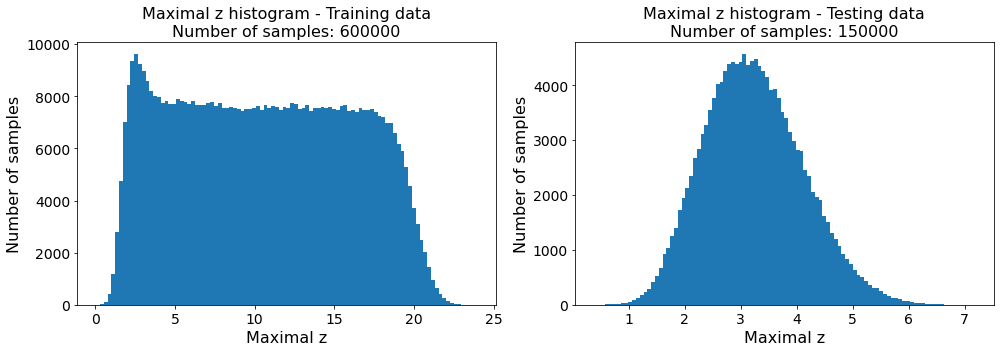

No data parameters found!


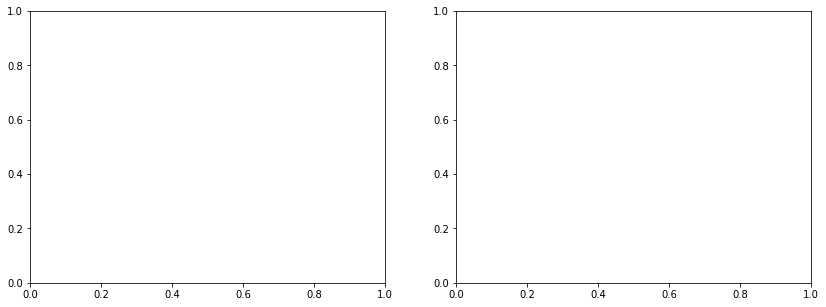

In [ ]:
# Plotting the z test statistic

if plot_data_z_flag:
  # Calculating variables
  z_h_max_train = np.max(Y_train, axis=1)
  # q0_h_max_train = np.max(Y_train**2, axis=1) # q0 = z**2
  z_h_max_test = np.max(Y_test, axis=1)
  # q0_h_max_test = np.max(Y_test**2, axis=1) # q0 = z**2
  # hist_bins = data_train_sig_height_max - data_train_sig_height_min + 1
  hist_bins = 100

  # Plotting
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

  axes[0].hist(z_h_max_train, bins=hist_bins)
  axes[0].set_title('Maximal z histogram - Training data\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
  axes[0].set_ylabel('Number of samples', fontsize=font_size)
  axes[0].set_xlabel('Maximal z', fontsize=font_size)
  axes[0].tick_params(labelsize=tick_size)

  axes[1].hist(z_h_max_test, bins=hist_bins)
  axes[1].set_title('Maximal z histogram - Testing data\nNumber of samples: %d' %(len(X_test[:,0])), fontsize=font_size)
  axes[1].set_ylabel('Number of samples', fontsize=font_size)
  axes[1].set_xlabel('Maximal z', fontsize=font_size)
  axes[1].tick_params(labelsize=tick_size)

  plt.tight_layout()
  plt.show()

  # Plotting
  if 1: # The following plot takes longer to produce
    try:
      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

      x = SP_train[:,2]
      y = z_h_max_train
      max_for_y_equals_x_curve = np.max(np.concatenate((z_h_max_train, SP_train[:,2])))

      if 0:
        xy = np.vstack([x,y])/5
        z = gaussian_kde(xy)(xy)
        cmap = matplotlib.cm.get_cmap('RdBu_r')
        axes[0].scatter(x, y, s=50, c=cmap(z), alpha=0.5)
        # axes[0].scatter(x, y, c=cmap(z), edgecolor='', alpha=0.5) # Causes an error when using a local runtime
      else:
        axes[0].scatter(x, y)
      axes[0].plot(np.linspace(0, max_for_y_equals_x_curve, num=100), np.linspace(0, max_for_y_equals_x_curve, num=100), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
      axes[0].set_title('Maximal z vs. Signal wanted z parameter\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
      axes[0].set_ylabel('Maximal z', fontsize=font_size)
      axes[0].set_xlabel('Signal wanted z parameter', fontsize=font_size)
      axes[0].tick_params(labelsize=tick_size)

      axes[1].scatter(SP_train[:,0], z_h_max_train)
      axes[1].set_title('Maximal z vs. Signal mean mass', fontsize=font_size)
      axes[1].set_ylabel('Maximal z', fontsize=font_size)
      axes[1].set_xlabel('Signal mean mass', fontsize=font_size)
      axes[1].tick_params(labelsize=tick_size)

      plt.tight_layout()
      plt.show()

    except:
      print('No data parameters found!')

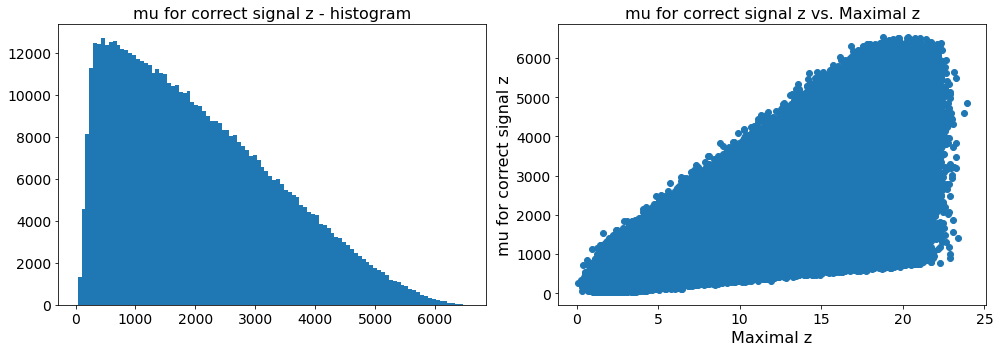

In [ ]:
# Plotting mu - training data

if plot_data_mu_flag:
  # Calculating variables
  z_h_max_train = np.max(Y_train, axis=1)
  hist_bins = 100

  # Debugging
  # print(len(Smu_train))
  # print(z_h_max_train.size)
  # print('Smu_train =', Smu_train)
  # print('z_h_max_train=', z_h_max_train)
  
  # Plotting
  try:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    axes[0].hist(Smu_train, bins=hist_bins)
    axes[0].set_title('mu for correct signal z - histogram', fontsize=font_size)
    axes[0].tick_params(labelsize=tick_size)

    axes[1].scatter(z_h_max_train, Smu_train)
    axes[1].set_title('mu for correct signal z vs. Maximal z', fontsize=font_size)
    axes[1].set_ylabel('mu for correct signal z', fontsize=font_size)
    axes[1].set_xlabel('Maximal z', fontsize=font_size)
    axes[1].tick_params(labelsize=tick_size)

    plt.tight_layout()
    plt.show()
    
  except:
    print('No mu data found!')

  # Plotting
  if 0: # The following plot takes longer to produce
    try:
      max_for_y_equals_x_curve = np.max(np.concatenate((z_h_max_train,SP_train[:,2])))
      # max_for_y_equals_x_curve_2 = np.max(np.concatenate((q0_h_max,SP_train[:,2])))

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

      axes[0].scatter(SP_train[:,0], Smu_train)
      axes[0].set_title('mu for correct signal z vs. Signal mean mass', fontsize=font_size)
      axes[0].set_ylabel('mu for correct signal z', fontsize=font_size)
      axes[0].set_xlabel('Signal mean mass', fontsize=font_size)
      axes[0].tick_params(labelsize=tick_size)

      x = SP_train[:,2]
      y = Smu_train
      if 1:
        xy = np.vstack([x,y])/5
        z = gaussian_kde(xy)(xy)
        cmap = matplotlib.cm.get_cmap('RdBu_r')
        axes[1].scatter(x, y, s=50, c=cmap(z), alpha=0.5)
        # axes[1].scatter(x, y, c=cmap(z), edgecolor='', alpha=0.5) # Causes an error when using a local runtime
      else:
        axes[1].scatter(x, y)
      # axes[1].plot(np.linspace(0, max_for_y_equals_x_curve_2, num=100), np.linspace(0, max_for_y_equals_x_curve_2, num=100), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
      axes[1].set_title('mu for correct signal z vs. Signal wanted z parameter\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
      axes[1].set_ylabel('mu for correct signal z', fontsize=font_size)
      axes[1].set_xlabel('Signal wanted z parameter', fontsize=font_size)
      axes[1].tick_params(labelsize=tick_size)

      plt.tight_layout()
      plt.show() # A new figure is created after plt.show() is called

    except:
      print('No data parameters found!')

else:
  print('This cell wasn\'t executed.')

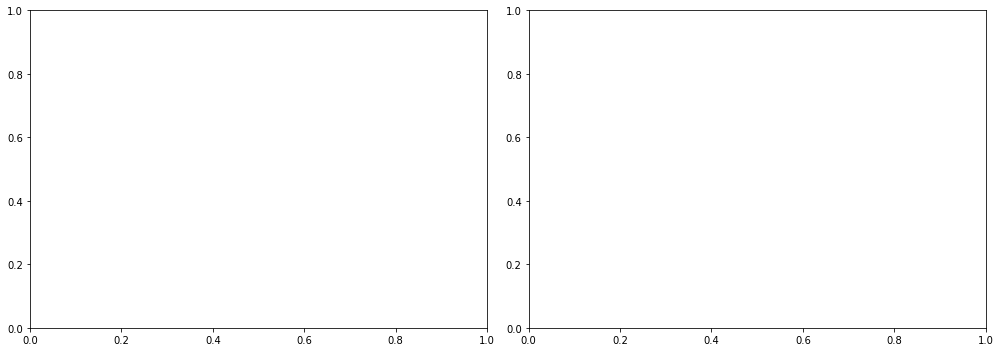

In [ ]:
# Plotting the signal width

if plot_data_width_flag:
  hist_bins = 100

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

  # SP stores sig_params = (m, w, h)
  try:
    axes[0].hist(SP_train[:,1], bins=hist_bins)
    axes[0].set_title('Signal width histogram - Training data\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[0].tick_params(labelsize=tick_size)
  except:
    pass

  try:
    axes[1].hist(SP_test[:,1], bins=hist_bins)
    axes[1].set_title('Signal width histogram - Testing data\nNumber of samples: %d' %(len(X_test[:,0])), fontsize=font_size)
    axes[1].tick_params(labelsize=tick_size)
  except:
    pass
  
  plt.tight_layout()
  plt.show()

In [ ]:
# Plotting the signal - training data

if plot_data_signal_flag:
  try:
    # Calculating variables
    sig_h_max = np.max(S_train, axis=1)
    z_h_max = np.max(Y_train, axis=1)
    q0_h_max = np.max(Y_train**2, axis=1) # q0 = z**2
    hist_bins = 100
    # hist_bins = data_train_sig_height_max - data_train_sig_height_min + 1

    total_sig = np.sum(S_train, axis=1)

    bg_at_sig_mean = np.zeros(len(B_train[:,0]))
    for i in range(0, len(B_train[:,0])):
      bg_at_sig_mean[i] = B_train[i, find_bin_index(SP_train[i,0], M_train[i])]

    total_sig_in_sig_width = np.zeros(len(S_train[:,0]))
    total_bg_in_sig_width = np.zeros(len(S_train[:,0]))
    for i_sample in range(0, len(S_train[:,0])):
      total_sig_in_sig_width_for_sample = 0
      total_bg_in_sig_width_for_sample = 0
      # print('Signal mean: %d, signal mean bin: %d, signal width: %d' %(SP_train[i_sample,0], find_bin_index(SP_train[i_sample,0],M_train[i_sample]), SP_train[i_sample,1])) # FOR DEBUGGING
      # print('Beginning:', data.find_bin_index(SP_train[i_sample,0],M_train[i_sample]) - SP_train[i_sample,1]) # FOR DEBUGGING
      # print('End:', find_bin_index(SP_train[i_sample,0],M_train[i_sample]) + SP_train[i_sample,1] + 1) # FOR DEBUGGING
      # print(type(SP_train[i_sample,1])) # FOR DEBUGGING
      # print(type(SP_train[i_sample,0])) # FOR DEBUGGING
      for i_bin in range( int(max(0, find_bin_index(SP_train[i_sample,0],M_train[i_sample]) - SP_train[i_sample,1])), int(min(data_train_num_bins, find_bin_index(SP_train[i_sample,0],M_train[i_sample]) + SP_train[i_sample,1] + 1)) ):
        # print('Bin number: %d' %(i_bin)) # FOR DEBUGGING
        total_sig_in_sig_width_for_sample += S_train[i_sample,i_bin]
        total_bg_in_sig_width_for_sample += B_train[i_sample,i_bin]
      total_sig_in_sig_width[i_sample] = total_sig_in_sig_width_for_sample # sig_width = 1 standard deviation, so it contains only 68% of the counts
      total_bg_in_sig_width[i_sample] = total_bg_in_sig_width_for_sample
      # print('Sample number: %d, total_bg_in_sig_width: %d' %(i_sample, total_bg_in_sig_width[i_sample])) # FOR DEBUGGING

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    axes[0].hist(SP_train[:,2], bins=hist_bins) # "hist" returns a tuple of the histogram values and the bins edges
    axes[0].set_title('Signal height parameter histogram\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[0].tick_params(labelsize=tick_size)

    axes[1].hist(SP_train[:,0], bins=hist_bins) # "hist" returns a tuple of the histogram values and the bins edges
    axes[1].set_title('Signal mean histogram\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[1].tick_params(labelsize=tick_size)

    plt.tight_layout()
    plt.show() # A new figure is created after plt.show() is called

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    axes[0].hist(sig_h_max, bins=hist_bins)
    axes[0].set_title('Maximal signal height histogram\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[0].tick_params(labelsize=tick_size)

    axes[1].scatter(bg_at_sig_mean, sig_h_max)
    axes[1].set_title('Maximal signal height vs. Background at signal mass\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[1].set_ylabel('Maximal signal height', fontsize=font_size)
    axes[1].set_xlabel('Background at signal mass', fontsize=font_size)
    axes[1].tick_params(labelsize=tick_size)

    plt.tight_layout()
    plt.show() # A new figure is created after plt.show() is called

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    
    axes[0].scatter(SP_train[:,2], sig_h_max/bg_at_sig_mean**0.5)
    axes[0].plot(np.linspace(0, data_train_sig_height_max, num=100), np.linspace(0, data_train_sig_height_max, num=100), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
    # axes[0].plot(np.linspace(0, data_train_sig_height_max, num=100), 0.68*np.linspace(0, data_train_sig_height_max, num=100), 'b--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
    axes[0].set_title('Max sig/(BG at max sig)^0.5 vs. Sig height parameter\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[0].set_ylabel('Max sig/(BG at max sig)^0.5', fontsize=font_size)
    axes[0].set_xlabel('Signal height parameter', fontsize=font_size)
    # axes[0].legend(('y=x', 'y=0.68x', 'Max sig/(BG at max sig)^0.5'), loc='best')
    axes[0].tick_params(labelsize=tick_size)

    axes[1].scatter(SP_train[:,2], 0.68*total_sig/(total_bg_in_sig_width**0.5))
    axes[1].plot(np.linspace(0, data_train_sig_height_max, num=100), np.linspace(0, data_train_sig_height_max, num=100), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
    axes[1].set_title('0.68*total sig/(BG in sig width)^0.5 vs. Sig height parameter\nNumber of samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[1].set_ylabel('0.68*total sig/(BG in sig width)^0.5', fontsize=font_size)
    axes[1].set_xlabel('Signal height parameter', fontsize=font_size)
    axes[1].tick_params(labelsize=tick_size)

    plt.tight_layout()
    plt.show() # A new figure is created after plt.show() is called

  except:
    print('No data parameters found!')

else:
  print('This cell wasn\'t executed.')

No data parameters found!


## (P) Plotting Data Samples

In [ ]:
# Plotting an example training sample

try:
  if plot_data_train_example_flag:
    i_sample = np.random.randint(0, data_train_num_samples)
    mass_bins_edges = M_train[i_sample,:]
    mass_bins_centers = 0.5*(mass_bins_edges[1:]+mass_bins_edges[:-1]) # For 100 bins: 0.5, 1.5, ... 99.5. The length is 100. This changes by set_mass_bins

    print('Presenting sample number', i_sample, 'as an example.')
    # print('Mass bins edges =', mass_bins_edges)  
    # print('Mass bins centers =', mass_bins_centers)
    print('Background parameters:', BP_train[i_sample,:])
    try:
      print('Signal parameters:', SP_train[i_sample,:])
    except:
      print('Couldn\'t print signal parameters!')
    print('mu for correct z:', Smu_train[i_sample])
    # print('z =', Y_train[i_sample,:])
    print('Maximal z:', np.max(Y_train[i_sample,:]))

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

    axes[0,0].plot(mass_bins_centers, B_train[i_sample,:]) # BG only
    axes[0,0].set_title('Background vs. Mass', fontsize=font_size)
    axes[0,0].set_ylabel('Background', fontsize=font_size)
    axes[0,0].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[0,0].tick_params(labelsize=tick_size)

    axes[0,1].plot(mass_bins_centers, S_train[i_sample,:]) # Signal only
    axes[0,1].set_title('Signal vs. Mass', fontsize=font_size)
    axes[0,1].set_ylabel('Signal', fontsize=font_size)
    axes[0,1].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[0,1].tick_params(labelsize=tick_size)

    axes[0,2].plot(mass_bins_centers, B_train[i_sample,:] + S_train[i_sample,:]) # BG + signal
    axes[0,2].set_title('Background + signal vs. Mass', fontsize=font_size)
    axes[0,2].set_ylabel('Background + signal', fontsize=font_size)
    axes[0,2].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[0,2].tick_params(labelsize=tick_size)

    axes[1,0].plot(mass_bins_centers, X_train[i_sample,:]) # Observed data
    axes[1,0].set_title('Observed vs. Mass', fontsize=font_size)
    axes[1,0].set_ylabel('Observed', fontsize=font_size)
    axes[1,0].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[1,0].tick_params(labelsize=tick_size)

    axes[1,1].plot(mass_bins_centers, X_train[i_sample,:] - S_train[i_sample,:]) # Observed - signal
    axes[1,1].set_title('Observed - signal vs. Mass', fontsize=font_size)
    axes[1,1].set_ylabel('Observed - signal', fontsize=font_size)
    axes[1,1].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[1,1].tick_params(labelsize=tick_size)

    axes[1,2].plot(mass_bins_centers, Y_train[i_sample,:])
    axes[1,2].set_title('z vs. Mass', fontsize=font_size)
    axes[1,2].set_ylabel('z', fontsize=font_size)
    axes[1,2].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[1,2].tick_params(labelsize=tick_size)

    plt.tight_layout()
    plt.show()

except:
  print('This cell failed to execute!')

Presenting sample number 128037 as an example.
This cell failed to execute!


In [ ]:
# Plotting an example testing sample

try:
  if plot_data_test_example_flag:
    i_sample = np.random.randint(0, data_test_num_samples)
    mass_bins_edges = M_test[i_sample,:]
    mass_bins_centers = 0.5*(mass_bins_edges[1:]+mass_bins_edges[:-1]) # For 100 bins: 0.5, 1.5, ... 99.5. The length is 100. This changes by set_mass_bins

    print('Presenting sample number', i_sample, 'as an example.')
    # print('Mass bins edges =', mass_bins_edges)  
    # print('Mass bins centers =', mass_bins_centers)
    print('Background parameters:', BP_test[i_sample,:])
    try:
      print('Signal parameters:', SP_test[i_sample,:])
    except:
      print('Couldn\'t print signal parameters!')
    print('mu for correct z:', Smu_test[i_sample])
    # print('z =', Y_test[i_sample,:])
    print('Maximal z:', np.max(Y_test[i_sample,:]))

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

    axes[0,0].plot(mass_bins_centers, B_test[i_sample,:]) # BG only
    axes[0,0].set_title('Background vs. Mass', fontsize=font_size)
    axes[0,0].set_ylabel('Background', fontsize=font_size)
    axes[0,0].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[0,0].tick_params(labelsize=tick_size)

    axes[0,1].plot(mass_bins_centers, S_test[i_sample,:]) # Signal only
    axes[0,1].set_title('Signal vs. Mass', fontsize=font_size)
    axes[0,1].set_ylabel('Signal', fontsize=font_size)
    axes[0,1].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[0,1].tick_params(labelsize=tick_size)

    axes[0,2].plot(mass_bins_centers, B_test[i_sample,:] + S_test[i_sample,:]) # BG + signal
    axes[0,2].set_title('Background + signal vs. Mass', fontsize=font_size)
    axes[0,2].set_ylabel('Background + signal', fontsize=font_size)
    axes[0,2].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[0,2].tick_params(labelsize=tick_size)

    axes[1,0].plot(mass_bins_centers, X_test[i_sample,:]) # Observed data
    axes[1,0].set_title('Observed vs. Mass', fontsize=font_size)
    axes[1,0].set_ylabel('Observed', fontsize=font_size)
    axes[1,0].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[1,0].tick_params(labelsize=tick_size)

    axes[1,1].plot(mass_bins_centers, X_test[i_sample,:] - S_test[i_sample,:]) # Observed - signal
    axes[1,1].set_title('Observed - signal vs. Mass', fontsize=font_size)
    axes[1,1].set_ylabel('Observed - signal', fontsize=font_size)
    axes[1,1].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[1,1].tick_params(labelsize=tick_size)

    axes[1,2].plot(mass_bins_centers, Y_test[i_sample,:])
    axes[1,2].set_title('z vs. Mass', fontsize=font_size)
    axes[1,2].set_ylabel('z', fontsize=font_size)
    axes[1,2].set_xlabel('Mass [GeV]', fontsize=font_size)
    axes[1,2].tick_params(labelsize=tick_size)

    plt.tight_layout()
    plt.show()

except:
  print('This cell failed to execute!')

Presenting sample number 5192 as an example.
This cell failed to execute!


In [ ]:
# Plotting the entire training data

if plot_data_train_flag:
  x_axis_values = 0.5*(M_train[0,1:] + M_train[0,:-1]) # Recreating the centers of the mass bins (data.mass_bins_centers)

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
  for i_sample in range(0,len(X_train[:,0])):
    axes[0,0].plot(x_axis_values, S_train[i_sample,:]) # Signal only
    axes[0,1].plot(x_axis_values, B_train[i_sample,:]) # BG only
    axes[1,0].plot(x_axis_values, B_train[i_sample,:] + S_train[i_sample,:]) # BG + signal
    axes[1,1].plot(x_axis_values, X_train[i_sample,:]) # Observed data
    # axes.plot(x_axis_values, X_train[i_sample,:] - (B_train[i_sample,:] + S_train[i_sample,:])) # Observed - (BG + signal)

  axes[0,0].set_title('Signal vs. Mass\nNumber of data samples: %d' %(len(X_train[:,0])), fontsize=font_size)
  axes[0,0].set_ylabel('Signal', fontsize=font_size)
  axes[0,0].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[0,0].tick_params(labelsize=tick_size)

  axes[0,1].set_title('Background vs. Mass\nNumber of data samples: %d' %(len(X_train[:,0])), fontsize=font_size)
  axes[0,1].set_ylabel('Background', fontsize=font_size)
  axes[0,1].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[0,1].tick_params(labelsize=tick_size)
  
  axes[1,0].set_title('Background + signal vs. Mass\nNumber of data samples: %d' %(len(X_train[:,0])), fontsize=font_size)
  axes[1,0].set_ylabel('Background + signal', fontsize=font_size)
  axes[1,0].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[1,0].tick_params(labelsize=tick_size)

  axes[1,1].set_title('Observed data samples vs. Mass\nNumber of data samples: %d' %(len(X_train[:,0])), fontsize=font_size)
  axes[1,1].set_ylabel('Observed data samples', fontsize=font_size)
  axes[1,1].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[1,1].tick_params(labelsize=tick_size)

  plt.tight_layout()
  plt.show() # A new figure is created after plt.show() is called

else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.


In [ ]:
# Plotting the entire testing data

if plot_data_test_flag:
  x_axis_values = 0.5*(M_test[0,1:] + M_test[0,:-1]) # Recreating the centers of the mass bins (data.mass_bins_centers)

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
  for i_sample in range(0,len(X_test[:,0])):
    axes[0,0].plot(x_axis_values, S_test[i_sample,:]) # Signal only
    axes[0,1].plot(x_axis_values, B_test[i_sample,:]) # BG only
    axes[1,0].plot(x_axis_values, B_test[i_sample,:] + S_test[i_sample,:]) # BG + signal
    axes[1,1].plot(x_axis_values, X_test[i_sample,:]) # Observed data
    # axes.plot(x_axis_values, X_test[i_sample,:] - (B_test[i_sample,:] + S_test[i_sample,:])) # Observed - (BG + signal)

  axes[0,0].set_title('Signal vs. Mass\nNumber of data samples: %d' %(len(X_test[:,0])), fontsize=font_size)
  axes[0,0].set_ylabel('Signal', fontsize=font_size)
  axes[0,0].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[0,0].tick_params(labelsize=tick_size)

  axes[0,1].set_title('Background vs. Mass\nNumber of data samples: %d' %(len(X_test[:,0])), fontsize=font_size)
  axes[0,1].set_ylabel('Background', fontsize=font_size)
  axes[0,1].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[0,1].tick_params(labelsize=tick_size)
  
  axes[1,0].set_title('Background + signal vs. Mass\nNumber of data samples: %d' %(len(X_test[:,0])), fontsize=font_size)
  axes[1,0].set_ylabel('Background + signal', fontsize=font_size)
  axes[1,0].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[1,0].tick_params(labelsize=tick_size)

  axes[1,1].set_title('Observed data samples vs. Mass\nNumber of data samples: %d' %(len(X_test[:,0])), fontsize=font_size)
  axes[1,1].set_ylabel('Observed data samples', fontsize=font_size)
  axes[1,1].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[1,1].tick_params(labelsize=tick_size)

  plt.tight_layout()
  plt.show() # A new figure is created after plt.show() is called

else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.


Presenting sample number 491263 as an example.
Couldn't print BG parameters!
Couldn't print signal parameters!
mu for correct z: 363.1440703982182
Maximal z: 2.4033697333247668


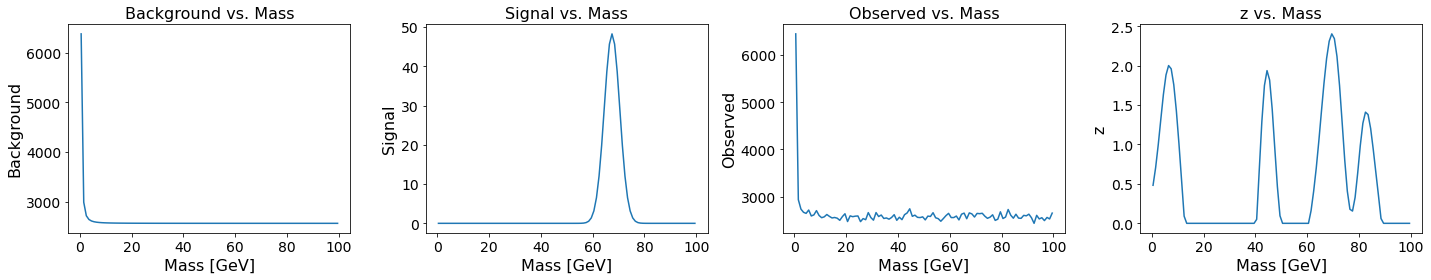

In [ ]:
# Plotting an example training sample - horizontal plot

# try:
if plot_data_train_example_flag:
  i_sample = np.random.randint(0, data_train_num_samples)
  mass_bins_edges = M_train[i_sample,:]
  mass_bins_centers = 0.5*(mass_bins_edges[1:]+mass_bins_edges[:-1]) # For 100 bins: 0.5, 1.5, ... 99.5. The length is 100. This changes by set_mass_bins

  print('Presenting sample number', i_sample, 'as an example.')
  # print('Mass bins edges =', mass_bins_edges)  
  # print('Mass bins centers =', mass_bins_centers)
  try:
    print('Background parameters:', BP_train[i_sample,:])
  except:
    print('Couldn\'t print BG parameters!')
  try:
    print('Signal parameters:', SP_train[i_sample,:])
  except:
    print('Couldn\'t print signal parameters!')
  try:
    print('mu for correct z:', Smu_train[i_sample])
  except:
    print('Couldn\'t print mu for correct z!')
  # print('z =', Y_train[i_sample,:])
  print('Maximal z:', np.max(Y_train[i_sample,:]))

  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))

  axes[0].plot(mass_bins_centers, B_train[i_sample,:]) # BG only
  axes[0].set_title('Background vs. Mass', fontsize=font_size)
  axes[0].set_ylabel('Background', fontsize=font_size)
  axes[0].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[0].tick_params(labelsize=tick_size)

  axes[1].plot(mass_bins_centers, S_train[i_sample,:]) # Signal only
  axes[1].set_title('Signal vs. Mass', fontsize=font_size)
  axes[1].set_ylabel('Signal', fontsize=font_size)
  axes[1].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[1].tick_params(labelsize=tick_size)

  # axes[1].plot(mass_bins_centers, bg_fluctuated) # Fluctuated BG
  # axes[1].set_title('Fluctuated Background vs. Mass', fontsize=font_size)
  # axes[1].set_ylabel('Fluctuated Background', fontsize=font_size)
  # axes[1].set_xlabel('Mass [GeV]', fontsize=font_size)
  # axes[1].tick_params(labelsize=tick_size)

  axes[2].plot(mass_bins_centers, X_train[i_sample,:]) # Observed data
  axes[2].set_title('Observed vs. Mass', fontsize=font_size)
  axes[2].set_ylabel('Observed', fontsize=font_size)
  axes[2].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[2].tick_params(labelsize=tick_size)

  axes[3].plot(mass_bins_centers, Y_train[i_sample,:])
  axes[3].set_title('z vs. Mass', fontsize=font_size)
  axes[3].set_ylabel('z', fontsize=font_size)
  axes[3].set_xlabel('Mass [GeV]', fontsize=font_size)
  axes[3].tick_params(labelsize=tick_size)

  plt.tight_layout()
  plt.show()

# except:
#   print('This cell failed to execute!')

## (*) Preprocessing Data

In [ ]:
# Randomly shuffling the data

# Shuffling training data
if data_train_shuffle_order:
  X_train_shuffled = []
  Y_train_shuffled = []
  B_train_shuffled = []
  S_train_shuffled = []
  BT_train_shuffled = []
  BP_train_shuffled = []
  SP_train_shuffled = []
  Smu_train_shuffled = []
  M_train_shuffled = []

  i_shuffled = np.linspace(0, data_train_num_samples-1, num=data_train_num_samples, dtype=int)
  # print('i_shuffled=', i_shuffled) # FOR DEBUGGING
  np.random.shuffle(i_shuffled)
  # print('i_shuffled=', i_shuffled,'\n') # FOR DEBUGGING
  # print(np.mean(X_train)) # FOR DEBUGGING
  # print(X_train) # FOR DEBUGGING
  for i_sample in np.arange(0,data_train_num_samples): # arange(a,b) returns [a,b)
    X_train_shuffled.append(X_train[i_shuffled[i_sample]])
    Y_train_shuffled.append(Y_train[i_shuffled[i_sample]])
    B_train_shuffled.append(B_train[i_shuffled[i_sample]])
    S_train_shuffled.append(S_train[i_shuffled[i_sample]])
    BT_train_shuffled.append(BT_train[i_shuffled[i_sample]])
    BP_train_shuffled.append(BP_train[i_shuffled[i_sample]])
    SP_train_shuffled.append(SP_train[i_shuffled[i_sample]])
    Smu_train_shuffled.append(Smu_train[i_shuffled[i_sample]])
    M_train_shuffled.append(M_train[i_shuffled[i_sample]])
    
  X_train = np.array(X_train_shuffled)
  Y_train = np.array(Y_train_shuffled)
  B_train = np.array(B_train_shuffled)
  S_train = np.array(S_train_shuffled)
  BT_train = np.array(BT_train_shuffled)
  BP_train = np.array(BP_train_shuffled)
  SP_train = np.array(SP_train_shuffled)
  Smu_train = np.array(Smu_train_shuffled)
  M_train = np.array(M_train_shuffled)
  
  print('Training data was shuffled.')

  # print(np.mean(X_train)) # FOR DEBUGGING
  # print(X_train) # FOR DEBUGGING

else:
  print('Training data wasn\'t shuffled.')

# Shuffling testing data
if data_test_shuffle_order:
  X_test_shuffled = []
  Y_test_shuffled = []
  B_test_shuffled = []
  S_test_shuffled = []
  BT_test_shuffled = []
  BP_test_shuffled = []
  SP_test_shuffled = []
  M_test_shuffled = []

  i_shuffled = np.linspace(0, data_test_num_samples-1, num=data_test_num_samples, dtype=int)
  # print('i_shuffled=', i_shuffled) # FOR DEBUGGING
  np.random.shuffle(i_shuffled)
  # print('i_shuffled=', i_shuffled,'\n') # FOR DEBUGGING
  # print(np.mean(X_test)) # FOR DEBUGGING
  # print(X_test) # FOR DEBUGGING
  for i_sample in np.arange(0,data_test_num_samples): # arange(a,b) returns [a,b)
    X_test_shuffled.append(X_test[i_shuffled[i_sample]])
    Y_test_shuffled.append(Y_test[i_shuffled[i_sample]])
    B_test_shuffled.append(B_test[i_shuffled[i_sample]])
    S_test_shuffled.append(S_test[i_shuffled[i_sample]])
    BT_test_shuffled.append(BT_test[i_shuffled[i_sample]])
    BP_test_shuffled.append(BP_test[i_shuffled[i_sample]])
    SP_test_shuffled.append(SP_test[i_shuffled[i_sample]])
    M_test_shuffled.append(M_test[i_shuffled[i_sample]])
    
  X_test = np.array(X_test_shuffled)
  Y_test = np.array(Y_test_shuffled)
  B_test = np.array(B_test_shuffled)
  S_test = np.array(S_test_shuffled)
  BT_test = np.array(BT_test_shuffled)
  BP_test = np.array(BP_test_shuffled)
  SP_test = np.array(SP_test_shuffled)
  M_test = np.array(M_test_shuffled)
  
  print('Testing data was shuffled.')

  # print(np.mean(X_test)) # FOR DEBUGGING
  # print(X_test) # FOR DEBUGGING

else:
  print('Testing data wasn\'t shuffled.')

Training data wasn't shuffled.
Testing data wasn't shuffled.


In [ ]:
# Finding the training samples in which true z is inside a given range

if data_train_filter_by_z:
  print('Finding the training samples in which: %.2f <= true z <= %.2f.' %(data_train_filter_by_z_min, data_train_filter_by_z_max))
  
  train_indices_filter_by_z = []
  for i_sample in range(0, len(X_train[:,0])):
    if (data_train_filter_by_z_min <= np.max(Y_train[i_sample,:])) and (np.max(Y_train[i_sample,:]) <= data_train_filter_by_z_max):
      train_indices_filter_by_z.append(i_sample)
  
  print('Number of training samples to keep: %i/%i = %.2f.' %(len(train_indices_filter_by_z), len(X_train[:,0]), len(train_indices_filter_by_z)/len(X_train[:,0]) ))
  
else:
  print('Keeping all of the training samples.')

Keeping all of the training samples.


In [ ]:
# Finding the testing samples in which true z is inside a given range

if data_test_filter_by_z:
  print('Finding the testing samples in which: %.2f <= true z <= %.2f.' %(data_test_filter_by_z_min, data_test_filter_by_z_max))
  
  test_indices_filter_by_z = []
  for i_sample in range(0, len(X_test[:,0])):
    if (data_test_filter_by_z_min <= np.max(Y_test[i_sample,:])) and (np.max(Y_test[i_sample,:]) <= data_test_filter_by_z_max):
      test_indices_filter_by_z.append(i_sample)
  
  print('Number of testing samples to keep: %i/%i = %.2f.' %(len(test_indices_filter_by_z), len(X_test[:,0]), len(test_indices_filter_by_z)/len(X_test[:,0]) ))
  
else:
  print('Keeping all of the testing samples.')

Keeping all of the testing samples.


In [ ]:
# Normalizing the samples
# X = Input (obs = sig + bg), Y = Output (z = sqrt(q0)), B = Background, S = True signal

# Normalizing the training samples
if data_train_bg_knowledge == 1: # Known background
  X_train_norm = (X_train - B_train)/np.sqrt(B_train)

elif data_train_bg_knowledge == 2: # Partially known background
  X_train_norm = (X_train - B_train_unc)/np.sqrt(B_train_unc)
  # X_train_norm = (X_train - B_train_rough)/np.sqrt(B_train_rough)
  # X_train_norm = (X_train - B_train_sbfits)/np.sqrt(B_train_sbfits)
  
elif data_train_bg_knowledge == 3: # Unknown background
  X_train_norm = X_train

Y_train_norm = np.nan_to_num(Y_train)

# S_train_norm = S_train
S_train_norm = S_train/np.sqrt(B_train) # ~ the significance, instead of just inputting the signal

# Normalizing the testing samples
if data_test_bg_knowledge == 1: # Known background
  X_test_norm = (X_test - B_test)/np.sqrt(B_test)
elif data_test_bg_knowledge == 2: # Partially known background
  X_test_norm = (X_test - B_test_unc)/np.sqrt(B_test_unc)
  # X_test_norm = (X_test- B_test_rough)/np.sqrt(B_test_rough)
  # X_test_norm = (X_test - B_test_sbfits)/np.sqrt(B_test_sbfits)
elif data_test_bg_knowledge == 3: # Unknown background
  X_test_norm = X_test

Y_test_norm = np.nan_to_num(Y_test)

S_test_norm = S_test/np.sqrt(B_test)

In [ ]:
# Scaling the inputs and the targets to [0,1]

if data_train_test_scale_together:
  # Scaling the training & testing inputs and targets to [0,1] together
  X_train_and_test_norm = np.concatenate((X_train_norm, X_test_norm), axis=0)
  Y_train_and_test_norm = np.concatenate((Y_train_norm, Y_test_norm), axis=0)

  X_train_and_test_norm_scaled, xm, xc = scale(X_train_and_test_norm)
  Y_train_and_test_norm_scaled, ym, yc = scale(Y_train_and_test_norm)

  X_train_norm_scaled, xm_train, xc_train = X_train_and_test_norm_scaled[:data_train_num_samples], xm, xc
  Y_train_norm_scaled, ym_train, yc_train = Y_train_and_test_norm_scaled[:data_train_num_samples], ym, yc

  X_test_norm_scaled, xm_test, xc_test = X_train_and_test_norm_scaled[data_train_num_samples:], xm, xc
  Y_test_norm_scaled, ym_test, yc_test = Y_train_and_test_norm_scaled[data_train_num_samples:], ym, yc
  
  # Printing and saving the scaling parameters
  print('Presenting the scaling parameters. Notice that the training and testing data were scaled together:\n')
  print('xm_train = {},\nxc_train = {},\nym_train = {},\nyc_train = {}'
        .format(xm_train, xc_train, ym_train, yc_train),'\n')
  print('xm_test = {},\nxc_test = {},\nym_test = {},\nyc_test = {}'
        .format(xm_test, xc_test, ym_test, yc_test), '\n')

  scaling_parameters_train_and_test = np.array([xm_train, xc_train, ym_train, yc_train])

  np.save(data_train_directory + 'data_train_&_test_' + data_train_session_id + '_&_' + data_test_session_id + '_scaling_parameters.npy', scaling_parameters_train_and_test)
  np.save(data_test_directory + 'data_train_&_test_' + data_train_session_id + '_&_' + data_test_session_id + '_scaling_parameters.npy', scaling_parameters_train_and_test)
  print('Training and testing data scaling parameters were saved successfully.')

  # Debugging
  if 0:
    print('X_train_norm.shape =', X_train_norm.shape)
    print('X_test_norm.shape =', X_test_norm.shape)
    print('X_train_and_test_norm.shape =', X_train_and_test_norm.shape)
    print('X_train_norm_scaled.shape =', X_train_norm_scaled.shape)
    print('X_test_norm_scaled.shape =', X_test_norm_scaled.shape)

else:
  # Scaling the training inputs and targets to [0,1] together
  X_train_norm_scaled, xm_train, xc_train = scale(X_train_norm)
  Y_train_norm_scaled, ym_train, yc_train = scale(Y_train_norm)

  # Scaling the testing inputs and targets to [0,1] together
  X_test_norm_scaled, xm_test, xc_test = scale(X_test_norm)
  Y_test_norm_scaled, ym_test, yc_test = scale(Y_test_norm)

  # Printing and saving the scaling parameters
  print('Presenting the scaling parameters:\n')
  print('xm_train = {},\nxc_train = {},\nym_train = {},\nyc_train = {}'
        .format(xm_train, xc_train, ym_train, yc_train),'\n')
  print('xm_test = {},\nxc_test = {},\nym_test = {},\nyc_test = {}'
        .format(xm_test, xc_test, ym_test, yc_test), '\n')

  scaling_parameters_train = np.array([xm_train, xc_train, ym_train, yc_train])
  scaling_parameters_test = np.array([xm_test, xc_test, ym_test, yc_test])

  np.save(data_train_directory + 'data_train_' + data_train_session_id + '_scaling_parameters.npy', scaling_parameters_train)
  print('Training data scaling parameters were saved successfully.')
  np.save(data_test_directory + 'data_test_' + data_test_session_id + '_scaling_parameters.npy', scaling_parameters_test)
  print('Testing data scaling parameters were saved successfully.')

Presenting the scaling parameters. Notice that the training and testing data were scaled together:

xm_train = 9.206046065218507e-05,
xc_train = -0.005955985349479567,
ym_train = 0.04182305991976248,
yc_train = -0.0 

xm_test = 9.206046065218507e-05,
xc_test = -0.005955985349479567,
ym_test = 0.04182305991976248,
yc_test = -0.0 

Training and testing data scaling parameters were saved successfully.


In [ ]:
# Keeping only the training samples in which true z is inside a given range

if data_train_filter_by_z:
  print('Keeping training samples in which: %.2f <= true z <= %.2f.' %(data_train_filter_by_z_min, data_train_filter_by_z_max))

  X_train_filter_by_z = [] # X = NN input (obs = sig + bg)
  Y_train_filter_by_z = [] # Y = NN output (z = sqrt(q0))
  B_train_filter_by_z = [] # B = Background
  S_train_filter_by_z = [] # S = True signal
  BT_train_filter_by_z = [] # BT = Background type
  BP_train_filter_by_z = [] # BP = Background parameters
  SP_train_filter_by_z = [] # SP = Signal parameters = (sig_mean=m, sig_width=w, sig_height=h)
  M_train_filter_by_z = [] # M = Mass bins edges
  
  X_train_norm_scaled_filter_by_z = []
  Y_train_norm_scaled_filter_by_z = []

  for i_sample in train_indices_filter_by_z:
    train_except_counter = 0
    X_train_filter_by_z.append(X_train[i_sample,:])
    Y_train_filter_by_z.append(Y_train[i_sample,:])
    B_train_filter_by_z.append(B_train[i_sample,:])
    S_train_filter_by_z.append(S_train[i_sample,:])
      
    X_train_norm_scaled_filter_by_z.append(X_train_norm_scaled[i_sample,:])
    Y_train_norm_scaled_filter_by_z.append(Y_train_norm_scaled[i_sample,:])
    try:
      BT_train_filter_by_z.append(BT_train[i_sample]) # BT has only 1 dimension
      BP_train_filter_by_z.append(BP_train[i_sample,:])
      SP_train_filter_by_z.append(SP_train[i_sample,:])
      M_train_filter_by_z.append(M_train[i_sample,:])
    except:
      train_except_counter += 1
      pass
  if train_except_counter > 0:
    print('Training data was partially restored.')

  X_train = np.array(X_train_filter_by_z)
  Y_train = np.array(Y_train_filter_by_z)
  B_train = np.array(B_train_filter_by_z)
  S_train = np.array(S_train_filter_by_z)
  BT_train = np.array(BT_train_filter_by_z)
  BP_train = np.array(BP_train_filter_by_z)
  SP_train = np.array(SP_train_filter_by_z)
  M_train = np.array(M_train_filter_by_z)
  
  X_train_norm_scaled = np.array(X_train_norm_scaled_filter_by_z)
  Y_train_norm_scaled = np.array(Y_train_norm_scaled_filter_by_z)

  data_train_num_samples = len(X_train[:,0])

else:
  print('Keeping all of the training samples.')

Keeping all of the training samples.


In [ ]:
# Keeping only the testing samples in which true z is inside a given range

if data_test_filter_by_z:
  print('Keeping testing samples in which: %.2f <= true z <= %.2f.' %(data_test_filter_by_z_min, data_test_filter_by_z_max))

  X_test_filter_by_z = [] # X = NN input (obs = sig + bg)
  Y_test_filter_by_z = [] # Y = NN output (z = sqrt(q0))
  B_test_filter_by_z = [] # B = Background
  S_test_filter_by_z = [] # S = True signal
  BT_test_filter_by_z = [] # BT = Background type
  BP_test_filter_by_z = [] # BP = Background parameters
  SP_test_filter_by_z = [] # SP = Signal parameters = (sig_mean=m, sig_width=w, sig_height=h)
  M_test_filter_by_z = [] # M = Mass bins edges
  
  X_test_norm_scaled_filter_by_z = []
  Y_test_norm_scaled_filter_by_z = []

  for i_sample in test_indices_filter_by_z:
    test_except_counter = 0
    # print('True max z =', np.max(Y_test[i_sample,:])) # FOR DEBUGGING
    # print('Is true max z inside filter_by_z?', (test_filter_by_z_min <= np.max(Y_test[i_sample,:])) and (np.max(Y_test[i_sample,:]) <= test_filter_by_z_max)) # FOR DEBUGGING
    X_test_filter_by_z.append(X_test[i_sample,:])
    Y_test_filter_by_z.append(Y_test[i_sample,:])
    B_test_filter_by_z.append(B_test[i_sample,:])
    S_test_filter_by_z.append(S_test[i_sample,:])
    # print(X_test_filter_by_z, '\n') # FOR DEBUGGING
    # print(Y_test_filter_by_z, '\n') # FOR DEBUGGING
          
    X_test_norm_scaled_filter_by_z.append(X_test_norm_scaled[i_sample,:])
    Y_test_norm_scaled_filter_by_z.append(Y_test_norm_scaled[i_sample,:])
    try:
      BT_test_filter_by_z.append(BT_test[i_sample]) # BT has only 1 dimension
      BP_test_filter_by_z.append(BP_test[i_sample,:])
      SP_test_filter_by_z.append(SP_test[i_sample,:])
      M_test_filter_by_z.append(M_test[i_sample,:])
      # print(BT_test[i_sample,:], '\n') # FOR DEBUGGING
    except:
      test_except_counter += 1
      pass
  if test_except_counter > 0:
    print('Testing data was partially restored.')
  
  X_test = np.array(X_test_filter_by_z)
  Y_test = np.array(Y_test_filter_by_z)
  B_test = np.array(B_test_filter_by_z)
  S_test = np.array(S_test_filter_by_z)
  BT_test = np.array(BT_test_filter_by_z)
  BP_test = np.array(BP_test_filter_by_z)
  SP_test = np.array(SP_test_filter_by_z)
  M_test = np.array(M_test_filter_by_z)
  
  X_test_norm_scaled = np.array(X_test_norm_scaled_filter_by_z)
  Y_test_norm_scaled = np.array(Y_test_norm_scaled_filter_by_z)

  data_test_num_samples = len(X_test[:,0])

else:
  print('Keeping all of the testing samples.')

Keeping all of the testing samples.


## (P) Plotting Preprocessed Data

In [ ]:
# Verifying the preprocessed data - z test statistic histograms

if plot_data_preprocessed_max_z_histogram_flag:
  try:
    # Calculating variables
    train_sig_h_max = np.max(S_train, axis=1)
    train_z_h_max = np.max(Y_train, axis=1)
    train_q0_h_max = np.max(Y_train**2, axis=1) # q0 = z**2
    train_hist_bins = 50
    # train_hist_bins = data_train_sig_height_max - data_train_sig_height_min + 1

    test_sig_h_max = np.max(S_test, axis=1)
    test_z_h_max = np.max(Y_test, axis=1)
    test_q0_h_max = np.max(Y_test**2, axis=1) # q0 = z**2
    test_hist_bins = 50
    # test_hist_bins = data_train_sig_height_max - data_train_sig_height_min + 1

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    axes[0].hist(train_z_h_max, bins=train_hist_bins)
    axes[0].set_title('True maximal z histogram - Preprocessed training data\nNumber of training samples: %d' %(len(X_train[:,0])), fontsize=font_size)
    axes[0].tick_params(labelsize=tick_size)

    axes[1].hist(test_z_h_max, bins=test_hist_bins)
    axes[1].set_title('True maximal z histogram - Preprocessed testing data\nNumber of testing samples: %d' %(len(X_test[:,0])), fontsize=font_size)
    axes[1].tick_params(labelsize=tick_size)

    plt.tight_layout()
    if plot_data_preprocessed_save_flag:
      plt.savefig(plot_directory + 'data_pre_max_z_hist_' + plot_session_id + '.png')
    plt.show() # A new figure is created after plt.show() is called

  except:
    print('No data parameters found!')
  
else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.


Presenting preprocessed training sample number 371403/600000:
Could not print observed data parameters.


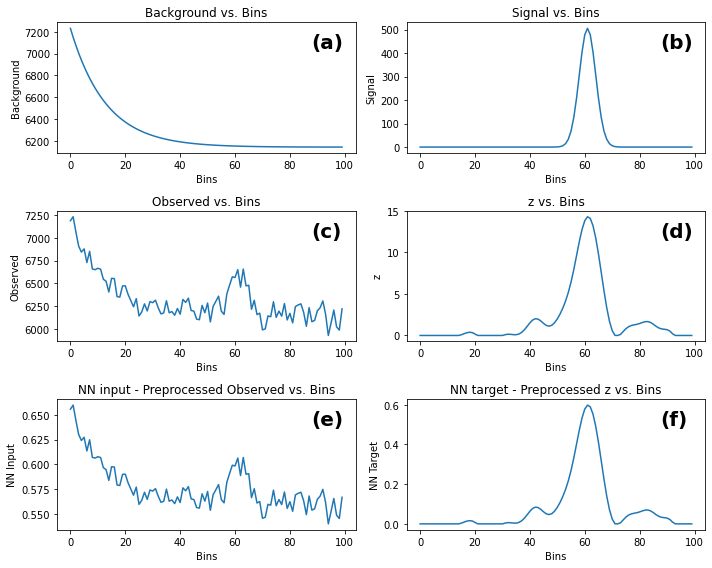

In [ ]:
# Plotting example preprocessed training data

if plot_data_preprocessed_train_example_flag:
  figure, axes = plt.subplots(3, 2, figsize=(10,8))

  rand_index = np.random.randint(0, data_train_num_samples)
  print('Presenting preprocessed training sample number %d/%d:' %(rand_index, data_train_num_samples))

  axes[0,0].plot(B_train[rand_index])
  axes[0,0].set(title='Background vs. Bins', xlabel='Bins', ylabel='Background')

  axes[0,1].plot(S_train[rand_index])
  axes[0,1].set(title='Signal vs. Bins', xlabel='Bins', ylabel='Signal')

  axes[1,0].plot(X_train[rand_index])
  axes[1,0].set(title='Observed vs. Bins', xlabel='Bins', ylabel='Observed')

  axes[1,1].plot(Y_train[rand_index])
  axes[1,1].set(title='z vs. Bins', xlabel='Bins', ylabel='z')

  axes[2,0].plot(X_train_norm_scaled[rand_index])
  axes[2,0].set(title='NN input - Preprocessed Observed vs. Bins', xlabel='Bins', ylabel='NN Input')

  axes[2,1].plot(Y_train_norm_scaled[rand_index])
  axes[2,1].set(title='NN target - Preprocessed z vs. Bins', xlabel='Bins', ylabel='NN Target')

  axes[0,0].text(0.85, 0.8, '(a)', transform=axes[0,0].transAxes, fontweight='bold', fontsize=font_size+4)
  axes[0,1].text(0.85, 0.8, '(b)', transform=axes[0,1].transAxes, fontweight='bold', fontsize=font_size+4)
  axes[1,0].text(0.85, 0.8, '(c)', transform=axes[1,0].transAxes, fontweight='bold', fontsize=font_size+4)
  axes[1,1].text(0.85, 0.8, '(d)', transform=axes[1,1].transAxes, fontweight='bold', fontsize=font_size+4)
  axes[2,0].text(0.85, 0.8, '(e)', transform=axes[2,0].transAxes, fontweight='bold', fontsize=font_size+4)
  axes[2,1].text(0.85, 0.8, '(f)', transform=axes[2,1].transAxes, fontweight='bold', fontsize=font_size+4)

  try:
    print('Background type:', BT_train[rand_index], ', background parameters:', BP_train[rand_index], ', signal height:', SP_train[rand_index,2], '\n')
  except:
    print('Could not print observed data parameters.')

  plt.tight_layout()

  if plot_data_preprocessed_save_flag:
    plt.savefig(plot_directory + 'data_pre_train_example_' + plot_session_id + '.png')

  plt.show() # A new figure is created after plt.show() is called
  
else:
  print('This cell wasn\'t executed.')

Presenting preprocessed testing sample number 73349/150000:
Could not print observed data parameters.


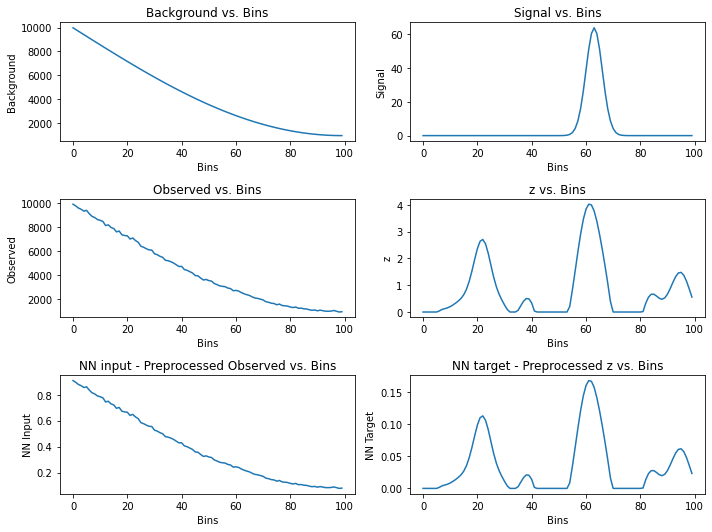

In [ ]:
# Plotting example preprocessed testing data

if plot_data_preprocessed_test_example_flag:
  figure, axes = plt.subplots(3, 2, figsize=(10,7.5))

  rand_index = np.random.randint(0, data_test_num_samples)
  print('Presenting preprocessed testing sample number %d/%d:' %(rand_index, data_test_num_samples))

  axes[0,0].plot(B_test[rand_index])
  axes[0,0].set(title='Background vs. Bins', xlabel='Bins', ylabel='Background')

  axes[0,1].plot(S_test[rand_index])
  axes[0,1].set(title='Signal vs. Bins', xlabel='Bins', ylabel='Signal')

  axes[1,0].plot(X_test[rand_index])
  axes[1,0].set(title='Observed vs. Bins', xlabel='Bins', ylabel='Observed')

  axes[1,1].plot(Y_test[rand_index])
  axes[1,1].set(title='z vs. Bins', xlabel='Bins', ylabel='z')

  axes[2,0].plot(X_test_norm_scaled[rand_index])
  axes[2,0].set(title='NN input - Preprocessed Observed vs. Bins', xlabel='Bins', ylabel='NN Input')

  axes[2,1].plot(Y_test_norm_scaled[rand_index])
  axes[2,1].set(title='NN target - Preprocessed z vs. Bins', xlabel='Bins', ylabel='NN Target')

  try:
    print('Background type:', BT_test[rand_index], ', background parameters:', BP_test[rand_index], ', signal height:', SP_test[rand_index,2], '\n')
  except:
    print('Could not print observed data parameters.')

  plt.tight_layout()

  if plot_data_preprocessed_save_flag:
    plt.savefig(plot_directory + 'data_pre_test_example_' + plot_session_id + '.png')

  plt.show() # A new figure is created after plt.show() is called
  
else:
  print('This cell wasn\'t executed.')

## (T) Timing Section

In [ ]:
time_data_gen_end = datetime.datetime.now()
time_data_gen_total = time_data_gen_end - time_data_gen_start
print('This section finished running at:', time_data_gen_end, '\nIt was running for:', time_data_gen_total)

This section finished running at: 2021-11-09 20:55:04.083294 
It was running for: 0:00:08.617295


# ML BUMP HUNTING

## (T) Timing Section

In [ ]:
time_bump_hunting_start = datetime.datetime.now()
print(time_bump_hunting_start)

2021-11-09 20:55:04.099252


## (*) Adjusting Randomization

In [ ]:
# Adjusting randomization
# Based on: https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

random_seed_value = ml_random_seed_value

if ml_use_fixed_random_seed:
    # You can use different seed values at each stage

    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(random_seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(random_seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(random_seed_value)

    # 4. Set the `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    # tf.random.set_seed(random_seed_value)

    # for later versions: 
    tf.compat.v1.set_random_seed(random_seed_value)

    # 5. Configure a new global `tensorflow` session
    from keras import backend as K
    # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    # K.set_session(sess)

    # for later versions:
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

else:
  print('This section wasn\'t executed.')

## (D) Defining NN Model

In [ ]:
# Defining neural net model (Dense + CNN)
if ml_model_define_flag:
  # filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
  # kernel_size: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.
  # "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
  
  model = Sequential([
    Dense(data_train_num_bins, input_shape=(data_train_num_bins,), activation='relu'),
    Reshape((data_train_num_bins,1)),
    Conv1D(kernel_size=25, filters=64, padding='same', activation='relu'),
    Conv1D(kernel_size=20, filters=32, padding='same', activation='relu'),
    Conv1D(kernel_size=15, filters=32, padding='same', activation='relu'),
    Conv1D(kernel_size=10, filters=16, padding='same', activation='relu'),
    Conv1D(kernel_size=5, filters=8, padding='same', activation='relu'),
    Conv1D(kernel_size=1, filters=1, padding='same', activation='relu')
  ])

  print('Presenting model summary:\n')
  print('The input shape is:', model.input_shape) # model.input_shape returns "(None, x, y)", where `None` is the batch size
  print('The output shape is:', model.output_shape)
  print('\n')
  model.summary()
  model.compile(loss=ml_loss_function, optimizer=ml_optimizer) # Loss function = Object the ML algorithm minimizes. Optimizer = Algorithm for how to minimize.
  # opt = keras.optimizers.Adam(lr=0.0003) # Was Adam(lr=0.0003)
  # model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

else:
  print('This section wasn\'t executed.')

This section wasn't executed.


## (*) Training NN

In [ ]:
if ml_model_train_flag:
  train_history = model.fit(X_train_norm_scaled, Y_train_norm_scaled, epochs = ml_training_epochs, batch_size = ml_training_batch_size, validation_split = ml_training_validation_split)
  # train_history = model.fit(X_train_norm_scaled, Y_train_norm_scaled, epochs = ml_training_epochs, batch_size = ml_training_batch_size, validation_split = ml_training_validation_split, callbacks=[ModelCheckpoint(ml_model_dir+model_name+'(400epochs).h5', save_best_only=True)]

  train_history_dic = train_history.history # Converting to a dictionary
  
else:
  print('This section wasn\'t executed.')

This section wasn't executed.


In [ ]:
# type(train_history) # => keras.callbacks.History
# type(train_history.history) # => The type is a dictionary
# train_history.history.keys() # => dict_keys(['val_loss', 'loss'])
# print(train_history.history.keys()) # => dict_keys(['val_loss', 'loss'])
# print(train_history.history['acc'])
# print(train_history.history['val_loss'])
# print(train_history.history)

## (S) Saving & Loading NN Model

In [ ]:
# Saving NN model
if ml_model_save_flag:
  model.save(ml_model_directory + 'model_' + ml_model_session_id)
  print('Neural network model saved.')

# Loading NN model
elif ml_model_load_flag:
  model = load_model(ml_model_directory + 'model_' + ml_model_session_id)
  print('Neural network model loaded.')

  print('\n')
  model.summary()

else:
  print('This section wasn\'t executed.')

Neural network model loaded.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
reshape (Reshape)            (None, 100, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 64)           1664      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           40992     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 32)           15392     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 16)           5136      
_________________________________________________________________
conv1d_4 (Conv1D)        

## (S) Saving & Loading Training History

In [ ]:
# Saving training history
if ml_history_save_flag:
  loss = train_history.history['loss']
  val_loss = train_history.history['val_loss']
  np.save(ml_model_directory + 'training_history_' + ml_model_session_id + '_loss.npy', loss)
  np.save(ml_model_directory + 'training_history_' + ml_model_session_id + '_val_loss.npy', val_loss)
  print('Training history saved.')

  try:
    acc = train_history.history['acc']
    val_acc = train_history.history['val_acc']
    np.save(ml_model_directory + 'training_history_' + ml_model_session_id + '_acc.npy', acc)
    np.save(ml_model_directory + 'training_history_' + ml_model_session_id + '_val_acc.npy', val_acc)
  except:
    print('No accuracy history found!')

# Loading training history
elif ml_history_load_flag:
  loss = np.load(ml_model_directory + 'training_history_' + ml_model_session_id + '_loss.npy')
  val_loss = np.load(ml_model_directory + 'training_history_' + ml_model_session_id + '_val_loss.npy')
  train_history_dic = {'loss': loss, 'val_loss': val_loss}
  print('Training history loaded.')
  
  try:
    acc = np.load(ml_model_directory + 'training_history_' + ml_model_session_id + '_acc.npy')
    val_acc = np.load(ml_model_directory + 'training_history_' + ml_model_session_id + '_val_acc.npy')
    train_history_dic = {'loss': loss, 'val_loss': val_loss, 'acc': acc, 'val_acc': val_acc}
  except:
    print('No accuracy history found!')

else:
  print('This section wasn\'t executed.')

# ## How to save a dictionary?

# # Saving training history
# if ml_history_save_flag:
#   train_history_dic = train_history.history
#   np.save(ml_model_directory + 'training_history_' + ml_seesion_id + '.npy', train_history_dic)

# # Loading training history
# if ml_history_load_flag:
#   train_history_dic = np.load(ml_model_directory + 'training_history_' + ml_seesion_id + '.npy', allow_pickle=True)

Training history loaded.
No accuracy history found!


In [ ]:
# # FOR DEBUGGING
# type(train_history.history)
# type(train_history_dic)
# type(np.array([1,1]))
# train_history_dic.keys()
# train_history_dic['loss']

## (P) Plotting Training History

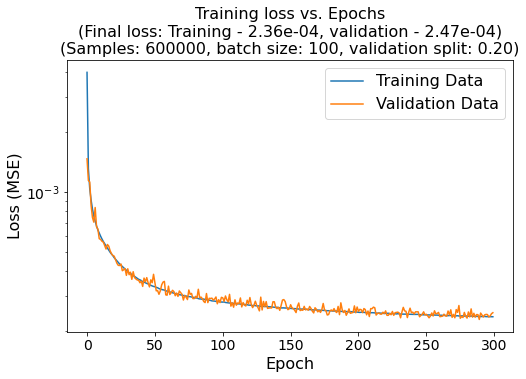

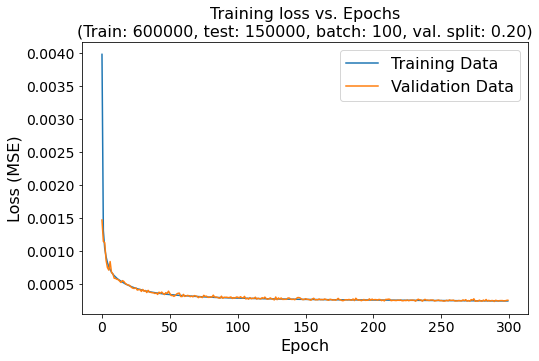

In [ ]:
# Plotting loss history
if plot_loss_flag:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

  axes.plot(train_history_dic['loss']) # Training loss
  axes.plot(train_history_dic['val_loss']) # Validation loss
  # axes.set_title('Training loss vs. Epochs\n(Samples: %i, batch size: %i, validation split: %.2f)' %(data_train_num_samples, ml_training_batch_size, ml_training_validation_split), fontsize=font_size)
  axes.set_title('Training loss vs. Epochs\n(Final loss: Training - %.2e, validation - %.2e)\n(Samples: %i, batch size: %i, validation split: %.2f)' %(train_history_dic['loss'][-1], train_history_dic['val_loss'][-1], data_train_num_samples, ml_training_batch_size, ml_training_validation_split), fontsize=font_size)
  axes.set_ylabel('Loss (MSE)', fontsize=font_size)
  axes.set_xlabel('Epoch', fontsize=font_size)
  axes.legend(['Training Data', 'Validation Data'], loc='upper right', fontsize=font_size)
  axes.tick_params(labelsize=tick_size)
  axes.semilogy()

  if plot_ml_save_flag:
    plt.savefig(plot_directory + 'loss_history_' + plot_session_id + '.png')

  plt.show() # A new figure is created after plt.show() is called
  
  # Plotting without logarithmic scale
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

  axes.plot(train_history_dic['loss']) # Training loss
  axes.plot(train_history_dic['val_loss']) # Validation loss
  axes.set_title('Training loss vs. Epochs\n(Train: %i, test: %i, batch: %i, val. split: %.2f)' %(data_train_num_samples, data_test_num_samples, ml_training_batch_size, ml_training_validation_split), fontsize=font_size)
  axes.set_ylabel('Loss (MSE)', fontsize=font_size)
  axes.set_xlabel('Epoch', fontsize=font_size)
  axes.legend(['Training Data', 'Validation Data'], loc='upper right', fontsize=font_size)
  axes.tick_params(labelsize=tick_size)

  plt.show() # A new figure is created after plt.show() is called

else:
  print('This section wasn\'t executed.')

In [ ]:
# Plotting accuracy history
if plot_accuracy_flag:
  plt.plot(train_history_dic['acc'])
  plt.plot(train_history_dic['val_acc'])
  plt.title('Training Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training Data', 'Validation Data'], loc='upper right')

  if plot_ml_save_flag:
    plt.savefig(plot_directory + 'acc_history_' + plot_session_id + '.png') 

  plt.show() # A new figure is created after plt.show() is called

else:
  print('This section wasn\'t executed.')

This section wasn't executed.


## (*) Predicting via NN

In [ ]:
if ml_predict_flag:
  verbose_step = math.ceil(data_test_num_samples * verbose_percentage / 100)

  # predictions = model.predict(X_test, batch_size=10, verbose=0)

  predictions = []
  print('Predicting for testing sample number 1/%i' %data_test_num_samples)
  for i in range(0, data_test_num_samples):
    pred = model.predict(X_test_norm_scaled[i].reshape(1,data_test_num_bins))[0]
    pred = pred.flatten()
    predictions.append(pred)

    if (i+1)%verbose_step == 0:
     print('Predicting for testing sample number %i/%i' %(i+1, data_test_num_samples))
    
  predictions = np.array(predictions)  
  
  # Scaling back
  predictions_scaled_back = inv_scale(predictions, ym_test, yc_test)

else:
  print('This section wasn\'t executed.')

This section wasn't executed.


## (S) Saving & Loading Predictions

In [ ]:
# Saving & loading NN predcitions

if ml_predict_save_flag:
  np.save(ml_predict_directory + 'predictions_' + ml_predict_session_id + '.npy', predictions)
  np.save(ml_predict_directory + 'predictions_scaled_back_' + ml_predict_session_id + '.npy', predictions_scaled_back)
  print('Predictions saved.')
  pass

elif ml_predict_load_flag:
  predictions = np.load(ml_predict_directory + 'predictions_' + ml_predict_session_id + '.npy')
  predictions_scaled_back = np.load(ml_predict_directory + 'predictions_scaled_back_' + ml_predict_session_id + '.npy')
  print('Predictions loaded.')
  pass

else:
  print('This section wasn\'t executed.')

Predictions loaded.


## (*) Calculating Evaluation Variables

In [ ]:
# Finding the values of the maximal z per sample

max_z_true = Y_test.max(axis=1)
max_z_pred = predictions_scaled_back.max(axis=1)

max_z_true_num = len(max_z_true)
max_z_pred_num = len(max_z_pred)

# You might want to look only at nonzero values, in case you'll divide by them:
# max_z_true = max_z_true[max_z_true>0]

In [ ]:
# Finding the masses of the maximum z per sample

max_z_pos_true = np.zeros(Y_test.shape[0])
max_z_pos_pred = np.zeros(predictions_scaled_back.shape[0])
for i in range(predictions_scaled_back.shape[0]): # Finding the position of the *first* *global* maximum
  max_z_pos_true[i] = np.where(Y_test[i] == max_z_true[i])[0][0] # Federico used np.where but it works here like np.nonzero
  max_z_pos_pred[i] = np.where(predictions_scaled_back[i] == max_z_pred[i])[0][0]

In [ ]:
# Finding the samples in which the mass of the predicted maximal z is EQUAL to the mass of the true maximal z

correct_mass_pred_samples = []
for i in range(0,Y_test.shape[0]):
  if abs(max_z_pos_true[i] - max_z_pos_pred[i]) == 0:
    correct_mass_pred_samples.append(i)

correct_mass_pred_samples_percent = 100*len(correct_mass_pred_samples)/len(Y_test)
print('Percentage of samples in which the mass of the predicted maximal z is equal to that of the true maximal z: %.2f%%' %(correct_mass_pred_samples_percent))

Percentage of samples in which the mass of the predicted maximal z is equal to that of the true maximal z: 61.79%


In [ ]:
# Finding the samples in which the mass of the predicted maximal z is CLOSE ENOUGH to the mass of the true maximal z

close_mass_pred_samples = []
for i in range(0,Y_test.shape[0]):
  if abs(max_z_pos_true[i] - max_z_pos_pred[i]) <= ml_filter_by_mass_diff:
    close_mass_pred_samples.append(i)

close_mass_pred_samples_percent = 100*len(close_mass_pred_samples)/len(Y_test)
print('Percentage of samples in which the mass of the predicted maximal z is close to that of the true maximal z by \u00B1%i bins: %.2f%%' %(ml_filter_by_mass_diff, close_mass_pred_samples_percent))

Percentage of samples in which the mass of the predicted maximal z is close to that of the true maximal z by ±1 bins: 90.14%


In [ ]:
# Finding the samples in which the mass of the predicted maximal z is FAR ENOUGH from the mass of the true maximal z

far_mass_pred_samples = []
for i in range(0,Y_test.shape[0]):
  if abs(max_z_pos_true[i] - max_z_pos_pred[i]) > ml_filter_by_mass_diff:
    far_mass_pred_samples.append(i)

far_mass_pred_samples_percent = 100*len(far_mass_pred_samples)/len(Y_test)
print('Percentage of samples in which the difference between the mass of the predicted max z and of the true max z is greater than %i bins: %.2f%%' %(ml_filter_by_mass_diff, far_mass_pred_samples_percent))

Percentage of samples in which the difference between the mass of the predicted max z and of the true max z is greater than 1 bins: 9.86%


## (*) Filtering by Mass of Max z

In [ ]:
# Keeping only the samples in which the predicted mass of max z is at a certain 
# distance from the mass of the true max z

if ml_filter_by_mass == 0:
  # Keeping all of the samples, regardless of their predicted mass of max z
  print('Using all of the samples, instead of the samples in which the predicted mass of max z is at a certain distance from the true mass of max z.')

  samples_filtered_by_mass = list(range(0,data_test_num_samples)) # The indices of the samples that remained after the filtering
  print('Number of remaining samples after the filtering: {}'.format(len(max_z_pos_true)))

elif ml_filter_by_mass == 1:
  # Keeping only the samples in which the predicted mass of max z
  # is close to the mass of the true max z by a certain amount of bins
  print('Keeping only the samples in which |Predicted mass of max z - true mass of max z| <= %i bins.' %(ml_filter_by_mass_diff))
  
  max_z_true_close = []
  max_z_pred_close = []
  max_z_pos_true_close = []
  max_z_pos_pred_close = []
  for i in close_mass_pred_samples:
    max_z_true_close.append(max_z_true[i])
    max_z_pred_close.append(max_z_pred[i])
    max_z_pos_true_close.append(max_z_pos_true[i])
    max_z_pos_pred_close.append(max_z_pos_pred[i])
  max_z_true = np.array(max_z_true_close)
  max_z_pred = np.array(max_z_pred_close)
  max_z_pos_true = np.array(max_z_pos_true_close)
  max_z_pos_pred = np.array(max_z_pos_pred_close)

  samples_filtered_by_mass = close_mass_pred_samples # The indices of the samples that remained after the filtering
  print('Number of remaining samples after the filtering: {}'.format(len(max_z_pos_true)))

elif ml_filter_by_mass == 2:
  # Keeping only the samples in which the difference between the mass of the predicted max z
  # and of the true max z is greater than a certain amount of bins
  print('Keeping only the samples in which |Predicted mass of max z - true mass of max z| > %i bins.' %(ml_filter_by_mass_diff))
  
  max_z_true_far = []
  max_z_pred_far = []
  max_z_pos_true_far = []
  max_z_pos_pred_far = []
  for i in far_mass_pred_samples:
    max_z_true_far.append(max_z_true[i])
    max_z_pred_far.append(max_z_pred[i])
    max_z_pos_true_far.append(max_z_pos_true[i])
    max_z_pos_pred_far.append(max_z_pos_pred[i])
  max_z_true = np.array(max_z_true_far)
  max_z_pred = np.array(max_z_pred_far)
  max_z_pos_true = np.array(max_z_pos_true_far)
  max_z_pos_pred = np.array(max_z_pos_pred_far)
  
  samples_filtered_by_mass = far_mass_pred_samples # The indices of the samples that remained after the filtering
  print('Number of remaining samples after the filtering: {}'.format(len(max_z_pos_true)))

Using all of the samples, instead of the samples in which the predicted mass of max z is at a certain distance from the true mass of max z.
Number of remaining samples after the filtering: 150000


## (P) Plotting Predictions

Number of remaining samples after filtering by the predicted mass of max z: 150000/150000 (100.00%).
Presenting sample 89256 from the original (unfiltered) samples.

Could not print observed data parameters.
Could not print signal height in plot [0,1].


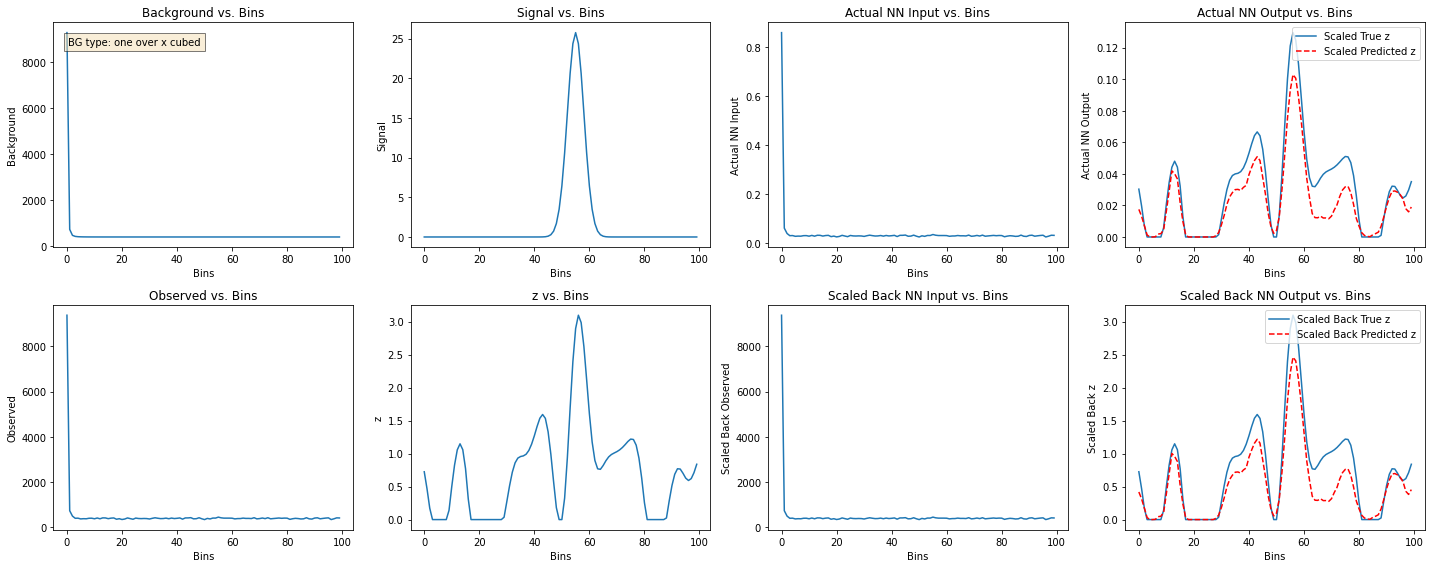

In [ ]:
# Plotting example inputs and their corresponding true z and predicted z vs. mass
if plot_predict_flag:
  num_pred_examples = 1

  for i in range(1, num_pred_examples+1): # Range gives [0, num) for a single num argument
    figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
    rand_index = np.random.choice(samples_filtered_by_mass, None) # When the output shape is None, a single value is returned
    # rand_index = np.random.randint(0, data_test_num_samples) # Returns [num1, num2)
    print('Number of remaining samples after filtering by the predicted mass of max z: {}/{} ({:.2f}%).'
          .format(len(samples_filtered_by_mass), data_test_num_samples, 100*len(samples_filtered_by_mass)/data_test_num_samples))
    print('Presenting sample {} from the original (unfiltered) samples.\n'.format(rand_index))

    try:
      print('Background type:', BT_test[rand_index], ', background parameters:', BP_test[rand_index], ', signal height:', SP_test[rand_index,2], '\n')
    except:
      print('Could not print observed data parameters.')

    axes[0,0].plot(B_test[rand_index])
    axes[0,0].set(title='Background vs. Bins', xlabel='Bins', ylabel='Background')
    try:
      text = 'BG type: ' + BT_test[rand_index]
      axes[0,0].text(0.05, 0.9, text, transform=axes[0,0].transAxes, fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))
    except:
      print('Could not print background type in plot [0,0].')
    
    axes[0,1].plot(S_test[rand_index])
    axes[0,1].set(title='Signal vs. Bins', xlabel='Bins', ylabel='Signal')
    try:
      text = 'Sig height: ' + str(round(SP_test[rand_index,2], 3))
      axes[0,1].text(0.05, 0.9, text, transform=axes[0,1].transAxes, fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))
    except:
      print('Could not print signal height in plot [0,1].')

    axes[0,2].plot(X_test_norm_scaled[rand_index], label='NN Input') # Notice that this is the preprocessed NN input!
    axes[0,2].set(title='Actual NN Input vs. Bins', xlabel='Bins', ylabel='Actual NN Input')
    # axes[0,2].legend(loc='upper right')

    axes[0,3].plot(Y_test_norm_scaled[rand_index], label='Scaled True z') # Notice that this is the preprocessed NN output!
    axes[0,3].plot(predictions[rand_index], linestyle='--', c='r', label='Scaled Predicted z') 
    axes[0,3].set(title='Actual NN Output vs. Bins', xlabel='Bins', ylabel='Actual NN Output')
    axes[0,3].legend(loc='upper right')

    axes[1,0].plot(X_test[rand_index])
    axes[1,0].set(title='Observed vs. Bins', xlabel='Bins', ylabel='Observed')

    axes[1,1].plot(Y_test[rand_index])
    axes[1,1].set(title='z vs. Bins', xlabel='Bins', ylabel='z')
    
    axes[1,2].plot(X_test[rand_index], label='Input') # Notice that this is the non-preprocessed input!
    axes[1,2].set(title='Scaled Back NN Input vs. Bins', xlabel='Bins', ylabel='Scaled Back Observed')
    # axes[1,2].legend(loc='upper right')

    axes[1,3].plot(Y_test[rand_index], label='Scaled Back True z') # Notice that this is the the non-preprocessed output!
    axes[1,3].plot(predictions_scaled_back[rand_index], linestyle='--', c='r', label='Scaled Back Predicted z')   
    axes[1,3].set(title='Scaled Back NN Output vs. Bins', xlabel='Bins', ylabel='Scaled Back z')
    axes[1,3].legend(loc='upper right')

    plt.tight_layout()
    
    if plot_ml_save_flag:
      plt.savefig(plot_directory + 'prediction_example_' + str(i) + '_' + plot_session_id + '.png')
      # plt.savefig(plot_directory + 'p' + str(i) + '.png')

    plt.show() # A new figure is created after plt.show() is called

else:
  print('This section wasn\'t executed.')

In [ ]:
# # Plotting example inputs and their corresponding true z and predicted z vs. mass - different subplots configuration
# if plot_predict_flag:
#   num_pred_examples = 1

#   for i in range(1, num_pred_examples+1): # Range gives [0, num) for a single num argument
#     figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
#     rand_index = np.random.randint(0, data_test_num_samples) # Returns [num1, num2)

#     try:
#       print('Background type:', BT_test[rand_index], ', background parameters:', BP_test[rand_index], ', signal height:', SP_test[rand_index,2], '\n')
#     except:
#       print('Could not print observed data parameters.')
    
#     axes[0,0].plot(B_test[rand_index])
#     axes[0,0].set(title='Background vs. Bins', xlabel='Bins', ylabel='Background')
#     try:
#       text = 'BG type: ' + str(BT_test[rand_index])
#       axes[0,0].text(0.05, 0.85, text, transform=axes[0,0].transAxes, fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))
#     except:
#       print('Could not print background type in plot [0,0].')

#     axes[0,1].plot(S_test[rand_index])
#     axes[0,1].set(title='Signal vs. Bins', xlabel='Bins', ylabel='Signal')
#     try:
#       text = 'Sig height: ' + str(round(SP_test[rand_index,2], 3))
#       axes[0,1].text(0.05, 0.85, text, transform=axes[0,1].transAxes, fontsize=10, bbox=dict(facecolor='wheat', alpha=0.5))
#     except:
#       print('Could not print signal height in plot [0,1].')

#     axes[1,0].plot(X_test[rand_index])
#     axes[1,0].set(title='Observed vs. Bins', xlabel='Bins', ylabel='Observed')

#     axes[1,1].plot(Y_test[rand_index])
#     axes[1,1].set(title='z vs. Bins', xlabel='Bins', ylabel='z')

#     axes[2,0].plot(X_test_norm_scaled[rand_index], label='NN Input') # Notice that this is the preprocessed NN input!
#     axes[2,0].set(title='Actual NN Input vs. Bins', xlabel='Bins', ylabel='Actual NN Input')
#     # axes[2,0].legend(loc='upper right')

#     axes[2,1].plot(Y_test_norm_scaled[rand_index], label='Scaled True z') # Notice that this is the preprocessed NN output!
#     axes[2,1].plot(predictions[rand_index], linestyle='--', c='r', label='Scaled Predicted z') 
#     axes[2,1].set(title='Actual NN Output vs. Bins', xlabel='Bins', ylabel='Actual NN Output')
#     axes[2,1].legend(loc='upper right')
    
#     axes[3,0].plot(X_test[rand_index], label='Input') # Notice that this is the non-preprocessed input!
#     axes[3,0].set(title='Scaled Back NN Input vs. Bins', xlabel='Bins', ylabel='Scaled Back Observed')
#     # axes[3,0].legend(loc='upper right')

#     axes[3,1].plot(Y_test[rand_index], label='Scaled Back True z') # Notice that this is the the non-preprocessed output!
#     axes[3,1].plot(predictions_scaled_back[rand_index], linestyle='--', c='r', label='Scaled Back Predicted z')   
#     axes[3,1].set(title='Scaled Back NN Output vs. Bins', xlabel='Bins', ylabel='Scaled Back z')
#     axes[3,1].legend(loc='upper right')

#     plt.tight_layout()
    
#     if plot_ml_save_flag:
#       plt.savefig(plot_directory + 'prediction_example_' + str(i) + '_' + plot_session_id + '.png')
#       # plt.savefig(plot_directory + 'p' + str(i) + '.png')

#     plt.show() # A new figure is created after plt.show() is called     

## (*) (P) Evaluating Predictions

### General Statistics

In [ ]:
# Percentage of samples in which the mass of the predicted max z is at a certain distance from the mass of the true max z

print('Predicted mass of max z = true mass of max z in %.2f%% of the samples.' %(correct_mass_pred_samples_percent))
# print('Percentage of samples in which the mass of the predicted max z is equal to that of the true max z: %.2f%%' %(correct_mass_pred_samples_percent))

print('|Predicted mass of max z - true mass of max z| <= %i bins in %.2f%% of the samples.' %(ml_filter_by_mass_diff, close_mass_pred_samples_percent))
# print('Percentage of samples in which the mass of the predicted max z is close to that of the true max z by \u00B1%i bins: %.2f%%' %(ml_filter_by_mass_diff, close_mass_pred_samples_percent))

print('|Predicted mass of max z - true mass of max z| > %i bins in %.2f%% of the samples.' %(ml_filter_by_mass_diff, far_mass_pred_samples_percent))

Predicted mass of max z = true mass of max z in 61.79% of the samples.
|Predicted mass of max z - true mass of max z| <= 1 bins in 90.14% of the samples.
|Predicted mass of max z - true mass of max z| > 1 bins in 9.86% of the samples.


In [ ]:
# Mean of the height of maximal z
mean_max_z_true = np.mean(max_z_true)
mean_max_z_pred = np.mean(max_z_pred)
print('Mean of true maximal z: %.3f'%(mean_max_z_true), '\nMean of predicted maximal z: %.3f'%(mean_max_z_pred))

# Ratio of means of predicted and true heights of maximal z
print('Mean of predicted maximal z / mean of true maximal z: %.3f\n'%(mean_max_z_pred/mean_max_z_true))

# Standard deviation of the height of maximal z
std_max_z_true = (np.var(max_z_true))**0.5
std_max_z_pred = (np.var(max_z_pred))**0.5
print('Standard deviation of true maximal z: %.3f'%(std_max_z_true), '\nStandard deviation of predicted maximal z: %.3f'%(std_max_z_pred))

# Ratio of standard deviations of predicted and true heights of maximal z
print('Standard deviation of predicted maximal z / standard deviation of true maximal z: %.3f'%(std_max_z_pred/std_max_z_true))

# u00B1 = unicode of "+-" symbol

# mean, std = np.mean(y), (np.var(y))**0.5
# print('Mean fractional error in predicted height of maximal z: %.4f \u00B1 %.4f'%(mean,std)) # u00B1 = unicode of "+-" symbol

Mean of true maximal z: 3.239 
Mean of predicted maximal z: 3.259
Mean of predicted maximal z / mean of true maximal z: 1.006

Standard deviation of true maximal z: 0.879 
Standard deviation of predicted maximal z: 0.962
Standard deviation of predicted maximal z / standard deviation of true maximal z: 1.094


In [ ]:
# Calculating false / true negatives / positives percentages

significance_threshold = 3 # Significance threshold

fn = np.array([])
fp = np.array([])
tn = np.array([])
tp = np.array([])
for i in range(len(max_z_true)):
  if (max_z_true[i] > significance_threshold) and (max_z_pred[i] < significance_threshold):
    fn = np.append(fn, max_z_true[i])
  elif (max_z_true[i] < significance_threshold) and (max_z_pred[i] > significance_threshold):
    fp = np.append(fp, max_z_true[i])
  elif (max_z_true[i] < significance_threshold) and (max_z_pred[i] < significance_threshold):
    tn = np.append(tn, max_z_true[i])
  elif (max_z_true[i] > significance_threshold) and (max_z_pred[i] > significance_threshold):
    tp = np.append(tp, max_z_true[i])

fn_num = len(fn)
fp_num = len(fp)
tn_num = len(tn)
tp_num = len(tp)

print('FN = %.2f%%, FP = %.2f%%, TN = %.2f%%, TP = %.2f%%' % (100*fn_num/max_z_true_num, 100*fp_num/max_z_true_num, 100*tn_num/max_z_true_num, 100*tp_num/max_z_true_num))
print('Percent of correct predictions from samples with a true significant bump = %.2f%%' % (100*tp_num/(tp_num+fn_num))) # Use "%%"" to print a single "%"
print('Percent of correct predictions from samples without a true significant bump = %.2f%%' % (100*tn_num/(tn_num+fp_num)))

print('\nNumber of samples =', max_z_true_num, '. Number of FN + FP + TN + TP samples =', fn_num + fp_num + tn_num + tp_num)

FN = 7.94%, FP = 7.15%, TN = 34.52%, TP = 50.40%
Percent of correct predictions from samples with a true significant bump = 86.40%
Percent of correct predictions from samples without a true significant bump = 82.85%

Number of samples = 150000 . Number of FN + FP + TN + TP samples = 150000


### Mass of Maximal z

Mass prediction difference of ±0 bins: 61.79% of samples.
Mass prediction difference of ±1 bins: 90.14% of samples.
Mass prediction difference of ±2 bins: 91.96% of samples.
Mass prediction difference of ±3 bins: 92.32% of samples.
Mass prediction difference of ±4 bins: 92.48% of samples.
Mass prediction difference of ±5 bins: 92.57% of samples.



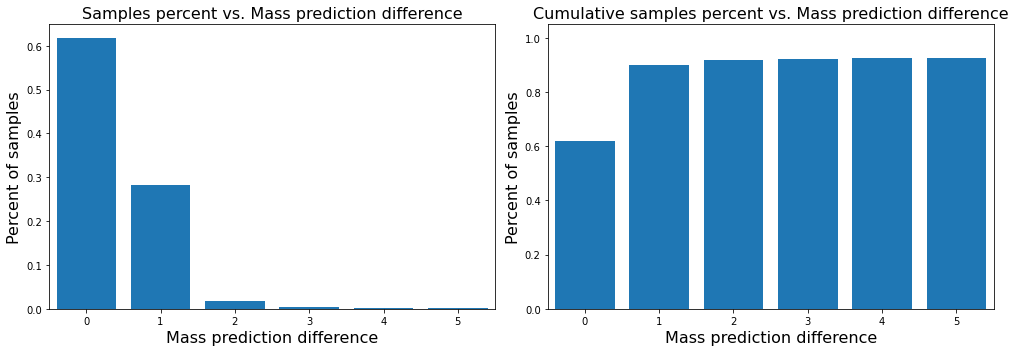

In [ ]:
# Percentage of samples in which the mass of the predicted maximal z is equal or close to the mass of the true maximal z

# Finding the masses of the maximum z per sample WITHOUT FILTERING BY CLOSENESS
height_max_z_true = Y_test.max(axis=1)
height_max_z_pred = predictions_scaled_back.max(axis=1)

mass_max_z_true = np.zeros(Y_test.shape[0])
mass_max_z_pred = np.zeros(predictions_scaled_back.shape[0])
for i in range(predictions_scaled_back.shape[0]): # Finding the position of the *first* *global* maximum
  mass_max_z_true[i] = np.where(Y_test[i] == height_max_z_true[i])[0][0] # Federico used np.where but it works here like np.nonzero
  mass_max_z_pred[i] = np.where(predictions_scaled_back[i] == height_max_z_pred[i])[0][0]

# Calculating variables
max_z_pos_diff = abs(mass_max_z_pred - mass_max_z_true)
diff_max = max(max_z_pos_diff)
diff_unique, diff_counts = np.unique(max_z_pos_diff, return_counts=True)

diff_counts_percent = diff_counts/len(Y_test)
diff_counts_percent_cumsum = np.cumsum(diff_counts_percent) # Cumulative sum. E.g. cumsum([1,2,3]) = [1,3,6]

# Presenting results
results_num_max = 6

# Printing
for i in range(0, min([results_num_max, len(diff_unique)])):
  print('Mass prediction difference of \u00B1{:.0f} bins: {:.2f}% of samples.'\
        .format(diff_unique[i], 100*diff_counts_percent_cumsum[i]))
print()

# Plotting
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# axes[0].bar(diff_unique, diff_counts)
# axes[0].set(title='Number of samples vs. Mass prediction difference')
# axes[0].set(ylabel='Number of samples', xlabel='Mass prediction difference')

axes[0].bar(diff_unique, diff_counts_percent)
axes[0].set_title('Samples percent vs. Mass prediction difference', fontsize=font_size)
axes[0].set_ylabel('Percent of samples', fontsize=font_size)
axes[0].set_xlabel('Mass prediction difference', fontsize=font_size)
axes[0].set_xlim(-0.5, results_num_max-0.5)

axes[1].bar(diff_unique, diff_counts_percent_cumsum)
axes[1].set_title('Cumulative samples percent vs. Mass prediction difference', fontsize=font_size)
axes[1].set_ylabel('Percent of samples', fontsize=font_size)
axes[1].set_xlabel('Mass prediction difference', fontsize=font_size)
axes[1].set_xlim(-0.5, results_num_max-0.5)

plt.tight_layout()

if plot_ml_save_flag: # Saving plots
  plt.savefig(plot_directory + 'evaluation_m_correct' + plot_session_id + '.png')

plt.show() # A new figure is created after plt.show() is called

Mean difference error in predicted mass bin of maximal z: -0.3500 ± 11.3069



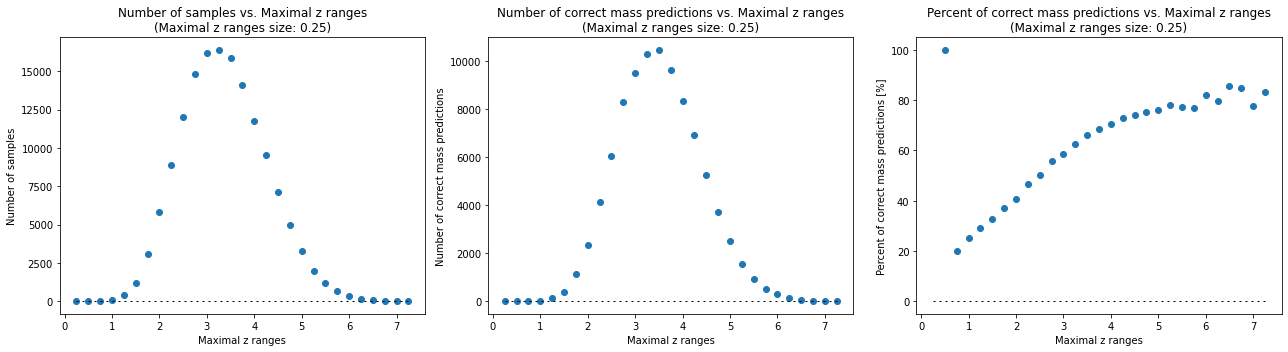

In [ ]:
# (R) Percent of samples with correct prediction of MASS OF MAXIMUM Z vs. Z ranges

# Activating debug mode
debug_mode = 0

# Calculating predictions evaluation
x = max_z_true # True maximal z
y = max_z_pos_true - max_z_pos_pred # Difference in bins between positions of true and predicted maximal z

# Debugging
if debug_mode:
  x = np.array([0.5,3,2,1,1])
  y = np.array([0,1,1,0,1])

  x = np.array([0.2,0.4])
  y = np.array([1,0])

  x = np.array([0.3])
  y = np.array([1])

  x = np.array([0.2])
  y = np.array([1])

# Sorting data
sort_order = np.argsort(x)
x = x[sort_order]
y = y[sort_order]

# Mean difference error in predicted mass bin of maximal z
mean_total, sd_total = np.mean(y), (np.var(y))**0.5
print('Mean difference error in predicted mass bin of maximal z: %.4f \u00B1 %.4f\n'%(mean_total,sd_total)) # u00B1 = unicode of "+-" symbol

# Calculating z ranges
z_range_amount = math.ceil(max(x)/ml_z_range_size)
z_range_upper_values = list(range(1, z_range_amount+1))
z_range_upper_values = np.array([float(i)*ml_z_range_size for i in z_range_upper_values])

# Debugging
if debug_mode:
  print('x',x)
  print('y',y)
  print('ml_z_range_size',ml_z_range_size)
  print('z_range_amount',z_range_amount)
  print('z_range_upper_values',z_range_upper_values)
  print('\n')

# Counting the numebr of samples per z range,
# and counting the number of samples in which the prediction of the mass of max z is equal to the true mass, for each z range
num_samples_per_z_range = np.array([])
num_correct_pred_samples_per_z_range = np.array([])
i_sample = 0
i_z_range = 0 # First range is denoted by "0"
samples_counter = 0
correct_samples_counter = 0

while i_sample < len(x): # Notice that the last sample will always belong to the last range
  # If the sample belongs to the current range
  if (z_range_upper_values[i_z_range]-ml_z_range_size < x[i_sample]) and (x[i_sample] <= z_range_upper_values[i_z_range]):
    if debug_mode:
      print('Inside range: i_sample =',i_sample,'i_z_range =',i_z_range)
    samples_counter += 1
    if y[i_sample] == 0:
      correct_samples_counter += 1
    i_sample += 1
     
    # If the range of the last sample was found, it is saved now, since this is the last loop iteration
    if i_sample == len(x):
      num_samples_per_z_range = np.append(num_samples_per_z_range, samples_counter)
      num_correct_pred_samples_per_z_range = np.append(num_correct_pred_samples_per_z_range, correct_samples_counter)

  # If the sample doesn't belong to the current range
  else:
    if debug_mode:
      print('Outside range: i_sample =',i_sample,'i_z_range =',i_z_range)
    # Save the counters
    num_samples_per_z_range = np.append(num_samples_per_z_range, samples_counter)
    num_correct_pred_samples_per_z_range = np.append(num_correct_pred_samples_per_z_range, correct_samples_counter)
    # Search the same sample again in the next range
    i_z_range += 1
    samples_counter = 0
    correct_samples_counter = 0

# Debugging
if debug_mode:
  print('\n')
  print('len(x):',len(x))
  print('i_sample:',i_sample)
  print('num_samples_per_z_range:',num_samples_per_z_range)
  print('num_correct_pred_samples_per_z_range:',num_correct_pred_samples_per_z_range)
  print('len(z_range_upper_values)',len(z_range_upper_values))
  print('len(num_correct_pred_samples_per_z_range)',len(num_correct_pred_samples_per_z_range))
  print('\n')

# Removing the ranges that don't contain samples
nonzero_indices = np.nonzero(num_samples_per_z_range)
num_samples_per_z_range_removed = num_samples_per_z_range[nonzero_indices]
num_correct_pred_samples_per_z_range_removed = num_correct_pred_samples_per_z_range[nonzero_indices]
z_range_upper_values_removed = z_range_upper_values[nonzero_indices]

# Calculating correct predictions percentage
correct_m_pred_percent_removed = 100 * num_correct_pred_samples_per_z_range_removed / num_samples_per_z_range_removed # Element-wise division doesn't work with lists

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].scatter(z_range_upper_values, num_samples_per_z_range)
axes[0].plot(z_range_upper_values, np.zeros(len(z_range_upper_values)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
axes[0].set(title='Number of samples vs. Maximal z ranges\n(Maximal z ranges size: ' + str(ml_z_range_size) + ')')
axes[0].set(ylabel='Number of samples', xlabel='Maximal z ranges')

axes[1].scatter(z_range_upper_values, num_correct_pred_samples_per_z_range)
axes[1].plot(z_range_upper_values, np.zeros(len(z_range_upper_values)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
axes[1].set(title='Number of correct mass predictions vs. Maximal z ranges\n(Maximal z ranges size: ' + str(ml_z_range_size) + ')')
axes[1].set(ylabel='Number of correct mass predictions', xlabel='Maximal z ranges')

axes[2].scatter(z_range_upper_values_removed, correct_m_pred_percent_removed)
axes[2].plot(z_range_upper_values, np.zeros(len(z_range_upper_values)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
axes[2].set(title='Percent of correct mass predictions vs. Maximal z ranges\n(Maximal z ranges size: ' + str(ml_z_range_size) + ')')
axes[2].set(ylabel='Percent of correct mass predictions [%]', xlabel='Maximal z ranges')

plt.tight_layout()

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_m_correct_vs_z_range_' + plot_session_id + '.png')

plt.show() # A new figure is created after plt.show() is called

Mean difference in predicted mass of maximal z: -0.350 ± 11.307


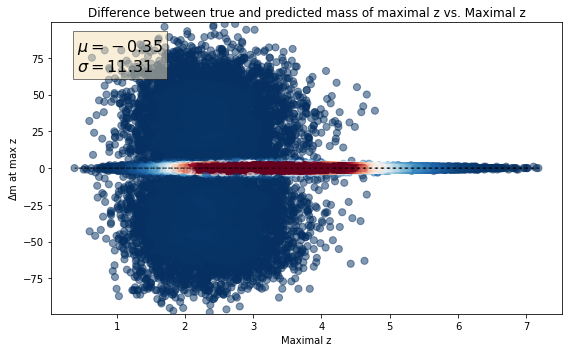

In [ ]:
# (M1) Difference between true and predicted MASS OF MAXIMUM Z vs. Maximal z

x = max_z_true # True maximal z
y = max_z_pos_true - max_z_pos_pred # Difference in bins
# y = np.nan_to_num(y)

# Mean difference in predicted mass of maximal z
mean, std = np.mean(y), (np.var(y))**0.5
print('Mean difference in predicted mass of maximal z: %.3f \u00B1 %.3f' %(mean,std)) # u00B1 = unicode of "+-" symbol

fig, ax = plt.subplots(figsize=(8,5))

if 1:
  xy = np.vstack([x,y])/5
  z = gaussian_kde(xy)(xy)
  cmap = matplotlib.cm.get_cmap('RdBu_r')
  ax.scatter(x, y, s=50, c=cmap(z), alpha=0.5)
else:
  ax.scatter(x, y)
  
# ax.hist2d(x, y, bins=50, norm=mcolors.PowerNorm(0.5), cmap='Blues')
ax.plot(x, np.zeros(len(x)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
# ax.plot(x, np.ones(len(x))*mean, 'b--', linewidth=1, dashes=(2, 4))

ax.set_xlabel('Maximal z')
ax.set_ylabel(r'${\Delta}$' + 'm at max z')
ax.set(title='Difference between true and predicted mass of maximal z vs. Maximal z')

ylim = max(abs(y.max()),abs(y.min())) + 1
ax.set_ylim(-ylim,ylim)

textstr = '\n'.join(((
    r'$\mu = {0:.2f}$'.format(mean)),
    r'$\sigma = {0:.2f}$'.format(std)))
props = dict(facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=font_size,
        verticalalignment='top', bbox=props)

plt.tight_layout()

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_m_vs_z_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'M1.png') 

plt.show() # A new figure is created after plt.show() is called

In [ ]:
# # (M2) Difference between true and predicted MASS OF MAXIMUM Z vs. Signal height [standard deviations over background]

# try:
#   x = SP_test[:,2] # Signal heights of the test set, in units of standard deviations over the background
#   y = max_z_pos_true - max_z_pos_pred # Difference in bins
#   # y = np.nan_to_num(y)

#   # Mean difference in predicted mass of maximal z
#   mean, std = np.mean(y), (np.var(y))**0.5
#   print('Mean difference in predicted mass of maximal z: %.3f \u00B1 %.3f' %(mean,std)) # u00B1 = unicode of "+-" symbol

#   xy = np.vstack([x,y])/5
#   z = gaussian_kde(xy)(xy)
#   cmap = matplotlib.cm.get_cmap('RdBu_r')

#   fig, ax = plt.subplots(figsize=(8,5))
#   ax.scatter(x, y, c=cmap(z), edgecolor='', alpha=0.5)
#   # ax.hist2d(x, y, bins=50, norm=mcolors.PowerNorm(0.5), cmap='Blues')
#   ax.plot(x, np.zeros(len(x)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
#   # ax.plot(x, np.ones(len(x))*mean, 'b--', linewidth=1, dashes=(2, 4))

#   ax.set_xlabel('Signal height [SDs over BG]')
#   ax.set_ylabel(r'${\Delta}$' + 'm at max z')
#   ax.set(title='Difference between true and predicted mass of maximal z vs. Signal height')

#   ylim = max(abs(y.max()),abs(y.min())) + 1
#   ax.set_ylim(-ylim,ylim)

#   textstr = '\n'.join(((
#       r'$\mu = {0:.2f}$'.format(mean)),
#       r'$\sigma = {0:.2f}$'.format(std)))
#   props = dict(facecolor='wheat', alpha=0.5)
#   ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=font_size,
#           verticalalignment='top', bbox=props)

#   plt.tight_layout()

#   if plot_ml_save_flag:
#     plt.savefig(plot_directory + 'evaluation_m_vs_sig_h_' + plot_session_id + '.png')
#     # plt.savefig(plot_directory + 'M2.png')

#   plt.show() # A new figure is created after plt.show() is called

# except:
#   print('Could not load signal parameters.')

### Height of Maximal z

Mean of true maximal z: 3.239 . Mean of predicted maximal z: 3.259
Mean of predicted maximal z / mean of true maximal z: 1.006
Mean difference between true and predicted height of maximal z: -0.02 ± 0.46


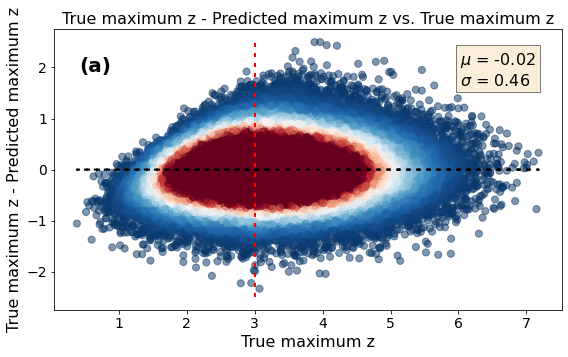

In [ ]:
# (DeltaZ) Difference between true and predicted height of maximal z vs. True height of maximal z

x = max_z_true[max_z_true>0] # True maximal z
y = (max_z_true[max_z_true>0] - max_z_pred[max_z_true>0])
# y = np.nan_to_num(y)

x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
y_lim = max(abs(y.max()),abs(y.min()))

# Mean fractional error in predicted height of maximal z
mean_max_z_true = np.mean(x)
mean_max_z_pred = np.mean(max_z_pred[max_z_true>0])
print('Mean of true maximal z: %.3f'%(mean_max_z_true), '. Mean of predicted maximal z: %.3f'%(mean_max_z_pred))
print('Mean of predicted maximal z / mean of true maximal z: %.3f'%(mean_max_z_pred/mean_max_z_true))
mean_max_z_diff, std_max_z_diff = np.mean(y), (np.var(y))**0.5
print('Mean difference between true and predicted height of maximal z: %.2f \u00B1 %.2f'%(mean_max_z_diff, std_max_z_diff)) # u00B1 = unicode of "+-" symbol

# Plotting
fig2a, axes = plt.subplots(figsize=(8,5))

if 1:
  xy = np.vstack([x,y])/3
  z = gaussian_kde(xy)(xy)
  cmap = matplotlib.cm.get_cmap('RdBu_r')
  axes.scatter(x, y, s=50, c=cmap(z), alpha=0.5)
  # axes.scatter(x, y, c=cmap(z), edgecolor='', alpha=0.5) # Causes an error when using a local runtime
else:
  axes.scatter(x, y)

axes.plot(x, np.zeros(len(x)), 'k--', linewidth=2, dashes=(2, 3)) # dashes(length, space)
axes.plot(np.full((100,1), fill_value=3), np.linspace(-y_lim,y_lim, num=100), 'r--', linewidth=2, dashes=(2, 3)) # dashes=(length, space)

axes.set_title('True maximum z - Predicted maximum z vs. True maximum z', fontsize=font_size)
axes.set_ylabel('True maximum z - Predicted maximum z', fontsize=font_size) # \u0394(Maximum z)
axes.set_xlabel('True maximum z', fontsize=font_size)
# axes.set_ylabel(r'${\Delta z_{max}}$'+' / '+r'${z_{true,max}}$')
# axes.set_ylim(-1.1*y_lim, 1.1*y_lim)
axes.tick_params(labelsize=tick_size)

textstr = '$\u03bc$ = {placeholder1:.2f}\n$\u03c3$ = {placeholder2:.2f}'.format(placeholder1 = mean_max_z_diff, placeholder2 = std_max_z_diff) # The \uxxxx is for unicode letters and $xxx$ is for italics
props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.8, 0.8, textstr, transform=axes.transAxes, fontsize=font_size, bbox=props)

textstr = '(a)'
axes.text(0.05, 0.85, textstr, transform=axes.transAxes, fontweight='bold', fontsize=font_size+4)

plt.tight_layout()

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_dz_vs_z_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'dz_vs_z.png')

plt.show() # A new figure is created after plt.show() is called

Mean of true maximal z: 3.239 
Mean of predicted maximal z: 3.259
Mean of (predicted maximal z / true maximal z): 1.012

Standard deviation of true maximal z: 0.879 
Standard deviation of predicted maximal z: 0.962
Standard deviation of (predicted maximal z / true maximal z): 0.160


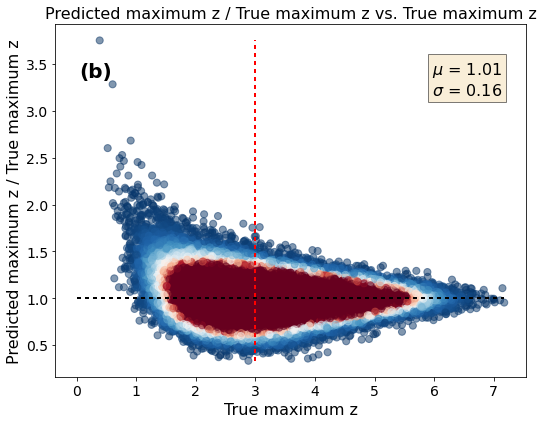

In [ ]:
# (RVZ) Ratio of means of predicted and true heights of maximal z vs. True max z

# Calculating variables
x = max_z_true[max_z_true>0] # max_z_true
y = (max_z_pred[max_z_true>0]/max_z_true[max_z_true>0])
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
axes_max = np.max(np.concatenate((x,y)))

# Mean of the height of maximal z
mean_max_z_true = np.mean(max_z_true)
mean_max_z_pred = np.mean(max_z_pred)
print('Mean of true maximal z: %.3f'%(mean_max_z_true), '\nMean of predicted maximal z: %.3f'%(mean_max_z_pred))
mean_max_z_ratio = np.mean(max_z_pred/max_z_true)
print('Mean of (predicted maximal z / true maximal z): %.3f\n'%(mean_max_z_ratio))
pred_bias = mean_max_z_ratio # For later usage

# Standard deviation of the height of maximal z
std_max_z_true = np.std(max_z_true)
std_max_z_pred = np.std(max_z_pred)
print('Standard deviation of true maximal z: %.3f'%(std_max_z_true), '\nStandard deviation of predicted maximal z: %.3f'%(std_max_z_pred))
std_max_z_ratio = np.std(max_z_pred/max_z_true)
print('Standard deviation of (predicted maximal z / true maximal z): %.3f'%(std_max_z_ratio))

# Plotting results
figure2b, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5,6))

if 1:
  xy = np.vstack([x,y])/3
  z = gaussian_kde(xy)(xy)
  cmap = matplotlib.cm.get_cmap('RdBu_r')
  axes.scatter(x, y, s=50, c=cmap(z), alpha=0.5)
else:
  axes.scatter(x, y)

axes.plot(np.linspace(0, x_max, num=100), np.full((100,1), fill_value=1), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.plot(np.full((100,1), fill_value=3), np.linspace(y_min, y_max, num=100), 'r--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.set_title('Predicted maximum z / True maximum z vs. True maximum z', fontsize=font_size)
axes.set_ylabel('Predicted maximum z / True maximum z', fontsize=font_size)
axes.set_xlabel('True maximum z', fontsize=font_size)
axes.tick_params(labelsize=tick_size)
# axes.set_xlim(1.5,4.5)
# axes.set_ylim(0.5,1.5)

textstr = '$\u03bc$ = {placeholder1:.2f}\n$\u03c3$ = {placeholder2:.2f}'.format(placeholder1 = mean_max_z_ratio, placeholder2 = std_max_z_ratio) # The \uxxxx is for unicode letters and $xxx$ is for italics
props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.8, 0.8, textstr, transform=axes.transAxes, fontsize=font_size, bbox=props) 

textstr = '(b)'
axes.text(0.05, 0.85, textstr, transform=axes.transAxes, fontweight='bold', fontsize=font_size+4)

plt.tight_layout()
if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_ratiovz_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'ratiovz.png')
plt.show()

FN = 7.94%, FP = 7.15%, TN = 34.52%, TP = 50.40%.
True positive rate = 86.40%. False positive rate = 17.15%.


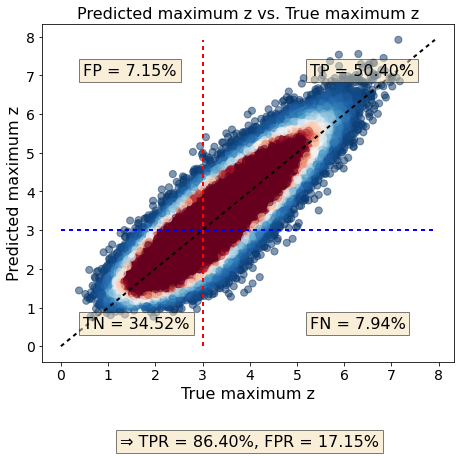

In [ ]:
# (ZVZ) Predicted maximal z vs. True maximal z

x = max_z_true[max_z_true>0] # max_z_true
y = max_z_pred[max_z_true>0]
x_len = len(x)
z_max = np.max(np.concatenate((x,y)))

# Calculating false / true negatives / positives precentages
fn = 0
fp = 0
tn = 0
tp = 0
for i in range(x_len):
  if (x[i] > 3) and (y[i] < 3):
    fn += 1
  elif (x[i] < 3) and (y[i] > 3):
    fp += 1
  elif (x[i] < 3) and (y[i] < 3):
    tn += 1
  elif (x[i] > 3) and (y[i] > 3):
    tp += 1

fn_percent = 100*fn/x_len
fp_percent = 100*fp/x_len
tn_percent = 100*tn/x_len
tp_percent = 100*tp/x_len
print('FN = %.2f%%, FP = %.2f%%, TN = %.2f%%, TP = %.2f%%.' %(fn_percent, fp_percent, tn_percent, tp_percent))

tpr = tp_percent/(tp_percent+fn_percent) # True positive rate = tp_num/(tp_num+fn_num)
fpr = fp_percent/(fp_percent+tn_percent) # False positive rate = fp_num/(fp_num+tn_num) = 1 - Specificity = 1 - tn_num/(tn_num+fp_num)
print('True positive rate = %.2f%%. False positive rate = %.2f%%.' %(100*tpr, 100*fpr)) # "%%"" prints a single '%'

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 6.5))

if 1:
  xy = np.vstack([x,y])/5
  z = gaussian_kde(xy)(xy)
  cmap = matplotlib.cm.get_cmap('RdBu_r')
  axes.scatter(x, y, s=50, c=cmap(z), alpha=0.5)
else:
  axes.scatter(x, y)

axes.plot(np.linspace(0, z_max, num=100), np.linspace(0, z_max, num=100), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.plot(np.full((100,1), fill_value=3), np.linspace(0, z_max, num=100), 'r--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.plot(np.linspace(0, z_max, num=100), np.full((100,1), fill_value=3), 'b--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.set_title('Predicted maximum z vs. True maximum z', fontsize=font_size)
axes.set_ylabel('Predicted maximum z', fontsize=font_size)
axes.set_xlabel('True maximum z', fontsize=font_size)
axes.tick_params(labelsize=tick_size)

props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.65, 0.85, 'TP = {placeholder:.2f}%'.format(placeholder = tp_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)
axes.text(0.1, 0.85, 'FP = {placeholder:.2f}%'.format(placeholder = fp_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)
axes.text(0.1, 0.1, 'TN = {placeholder:.2f}%'.format(placeholder = tn_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)
axes.text(0.65, 0.1, 'FN = {placeholder:.2f}%'.format(placeholder = fn_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)

text_rates = '\u21d2 TPR = {placeholder1:.2f}%, FPR = {placeholder2:.2f}%'.format(placeholder1 = 100*tpr, placeholder2 = 100*fpr)
props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.15+0.01*z_max/2, -0.25, text_rates, transform=axes.transAxes, fontsize=font_size, bbox=props)

plt.tight_layout()
if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_pred_z_true_z_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'pred_z_true_z.png')
plt.show() # A new figure is created after plt.show() is called

Area under the ROC curve: 0.925




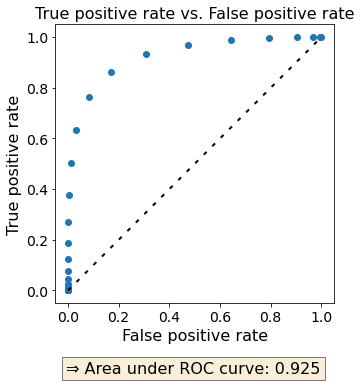

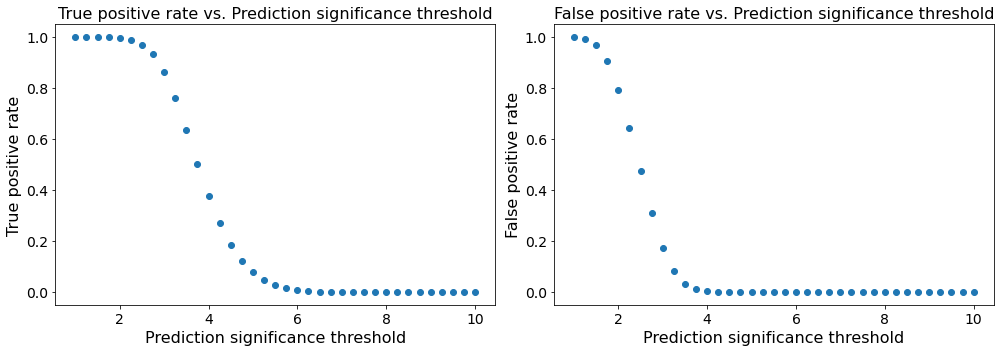

In [ ]:
# (ROC) ROC Curve

# Setting significance thresholds
significance_threshold_true = 3 # Significance threshold for the true max z
significance_threshold_min = 1 # Significance threshold for the predicted max z
significance_threshold_max = 10
significance_threshold_step = 0.25
significance_threshold_pred = np.arange(significance_threshold_min, significance_threshold_max + significance_threshold_step, significance_threshold_step) # arange(a,b) returns [a,b)

# Calculating false / true negatives / positives percentages
tpr_values = np.array([])
fpr_values = np.array([])

for i in range(0,len(significance_threshold_pred)): # For all of the predicted samples thresholds
  fn = np.array([])
  fp = np.array([])
  tn = np.array([])
  tp = np.array([])
  for j in range(0,len(max_z_true)): # For all of the samples
    if (max_z_true[j] > significance_threshold_true) and (max_z_pred[j] < significance_threshold_pred[i]):
      fn = np.append(fn, max_z_true[j])
    elif (max_z_true[j] < significance_threshold_true) and (max_z_pred[j] > significance_threshold_pred[i]):
      fp = np.append(fp, max_z_true[j])
    elif (max_z_true[j] < significance_threshold_true) and (max_z_pred[j] < significance_threshold_pred[i]):
      tn = np.append(tn, max_z_true[j])
    elif (max_z_true[j] > significance_threshold_true) and (max_z_pred[j] > significance_threshold_pred[i]):
      tp = np.append(tp, max_z_true[j])

  fn_num = len(fn)
  fp_num = len(fp)
  tn_num = len(tn)
  tp_num = len(tp)

  tpr = tp_num/(tp_num+fn_num) # True positive rate
  fpr = fp_num/(fp_num+tn_num) # False positive rate = 1 - Specificity = 1 - tn_num/(tn_num+fp_num)
  tpr_values = np.append(tpr_values, tpr) # Saving the values for later
  fpr_values = np.append(fpr_values, fpr)

max_value = np.max(np.concatenate((tpr_values,fpr_values)))

# Calculating the area under the ROC curves
area_roc = area_trapezoidal(fpr_values, tpr_values) # The arguments of area_trapezoidal() are coordinates (x,y)

# Printing results
print('Area under the ROC curve: %.3f' %(area_roc))
print('\n')

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 5.5))
axes.set_aspect(1)

axes.scatter(fpr_values, tpr_values)
axes.plot(np.linspace(0, max_value, num=100), np.linspace(0, max_value, num=100), 'k--', linewidth=2, dashes=(2, 4)) # dashes(length, space)
axes.set_title('True positive rate vs. False positive rate', fontsize=font_size)
axes.set_ylabel('True positive rate', fontsize=font_size)
axes.set_xlabel('False positive rate', fontsize=font_size)
axes.tick_params(labelsize=tick_size)

text_rates = '\u21d2 Area under ROC curve: {placeholder:.3f}'.format(placeholder = area_roc)
props = dict(facecolor='wheat', alpha=0.5)
axes.text(0+0.01*z_max/2, -0.25, text_rates, transform=axes.transAxes, fontsize=font_size, bbox=props)

plt.tight_layout()
if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_roc_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'roc.png')
plt.show() # A new figure is created after plt.show() is called

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].scatter(significance_threshold_pred, tpr_values)
axes[0].set_title('True positive rate vs. Prediction significance threshold', fontsize=font_size)
axes[0].set_ylabel('True positive rate', fontsize=font_size)
axes[0].set_xlabel('Prediction significance threshold', fontsize=font_size)
axes[0].tick_params(labelsize=tick_size)

axes[1].scatter(significance_threshold_pred, fpr_values)
axes[1].set_title('False positive rate vs. Prediction significance threshold', fontsize=font_size)
axes[1].set_ylabel('False positive rate', fontsize=font_size)
axes[1].set_xlabel('Prediction significance threshold', fontsize=font_size)
axes[1].tick_params(labelsize=tick_size)

plt.tight_layout()
if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_roc2_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'roc2.png')
plt.show() # A new figure is created after plt.show() is called

hist_bins = 50


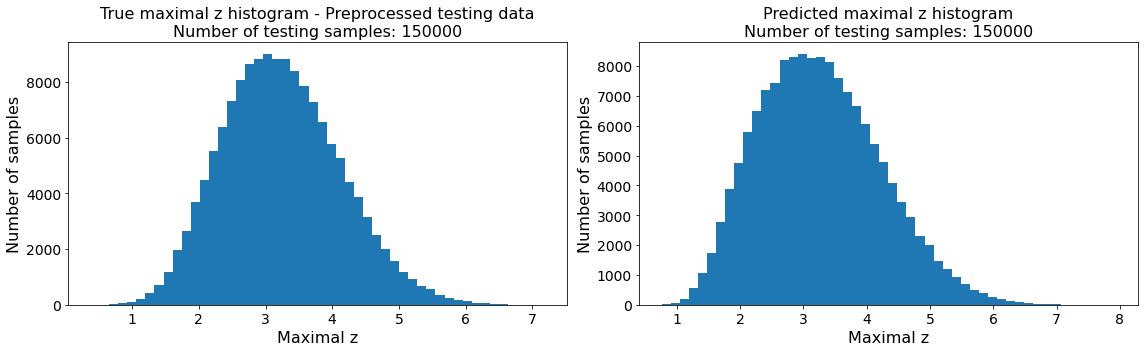

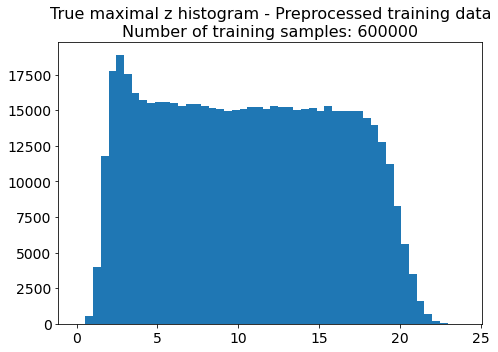

In [ ]:
# (ZHIST) Maximal z histograms

# NOTICE: The histograms of the unfiltered and filtered data won't be equal if the bin edges don't overlap with the filtering range!
# For axes.hist(data, bins=x), if bins is an int, it defines the number of equal-width bins in the given range (default is 10).
# If bins is a sequence, it defines a monotonically increasing array of bin edges, including the rightmost edge, allowing non-uniform bin widths.

# Calculating histograms
hist_bins = 50 # When using a single number, the bins edges are set automatiaclly
# hist_bins = np.linspace(data_test_sig_height_min, data_test_sig_height_max, data_test_sig_height_max - data_test_sig_height_min + 1) # np.linspace(start, stop, num) returns num evenly spaced samples, calculated over the interval [start, stop].
# hist_bins = data_test_sig_height_max - data_test_sig_height_min + 1
# hist_bins = np.linspace(data_test_sig_height_min, data_test_sig_height_max, 2*(data_test_sig_height_max - data_test_sig_height_min + 1)) # Will give a bad comparison since bins don't overlap
# hist_bins = np.linspace(test_filter_by_z_min, test_filter_by_z_max, int(test_filter_by_z_max - test_filter_by_z_min + 1))
# hist_bins = [0,0.25,0.5,0.75, 1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4,4.25,4.5,4.75, 5]
# hist_bins = [0,0.5, 1,1.5, 2,2.5, 3,3.5, 4,4.5, 5]
# hist_bins = [2.5,2.75,3,3.25,3.5]
print('hist_bins =', hist_bins) # FOR DEBUGGING

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

axes[0].hist(np.max(Y_test, axis=1), bins=hist_bins)
axes[0].set_title('True maximal z histogram - Preprocessed testing data\nNumber of testing samples: %d' %(len(X_test[:,0])), fontsize=font_size)
axes[0].set_ylabel('Number of samples', fontsize=font_size)
axes[0].set_xlabel('Maximal z', fontsize=font_size)
axes[0].tick_params(labelsize=tick_size)

axes[1].hist(np.max(predictions_scaled_back, axis=1), bins=hist_bins)
axes[1].set_title('Predicted maximal z histogram\nNumber of testing samples: %d' %(len(predictions_scaled_back[:,0])), fontsize=font_size)
axes[1].set_ylabel('Number of samples', fontsize=font_size)
axes[1].set_xlabel('Maximal z', fontsize=font_size)
axes[1].tick_params(labelsize=tick_size)

plt.tight_layout()
plt.show() # A new figure is created after plt.show() is called

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

axes.hist(np.max(Y_train, axis=1), bins=hist_bins)
axes.set_title('True maximal z histogram - Preprocessed training data\nNumber of training samples: %d' %(len(X_train[:,0])), fontsize=font_size)
axes.tick_params(labelsize=tick_size)

plt.tight_layout()
plt.show() # A new figure is created after plt.show() is called

Mean of true maximal z: 3.239 . Mean of predicted maximal z: 3.259
Mean of predicted maximal z / mean of true maximal z: 1.006
Mean fractional error in predicted height of maximal z: -0.0121 ± 0.1597


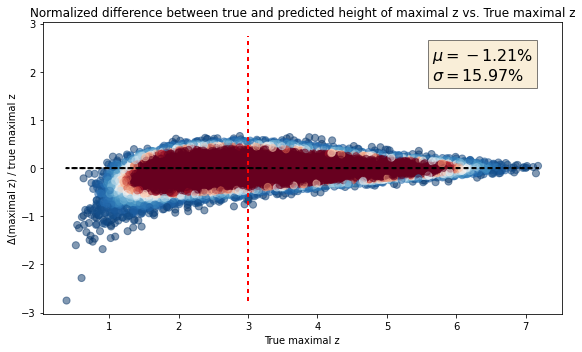

In [ ]:
# (H1) Normalized difference in predicted HEIGHT OF MAXIMAL Z vs. True maximal z

x = max_z_true[max_z_true>0] # True maximal z
y = ((max_z_true[max_z_true>0] - max_z_pred[max_z_true>0])/max_z_true[max_z_true>0])
# y = np.nan_to_num(y)

x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
y_lim = max(abs(y.max()),abs(y.min()))

# Mean fractional error in predicted height of maximal z
mean_max_z_true = np.mean(x)
mean_max_z_pred = np.mean(max_z_pred[max_z_true>0])
print('Mean of true maximal z: %.3f'%(mean_max_z_true), '. Mean of predicted maximal z: %.3f'%(mean_max_z_pred))
print('Mean of predicted maximal z / mean of true maximal z: %.3f'%(mean_max_z_pred/mean_max_z_true))
mean, std = np.mean(y), (np.var(y))**0.5
print('Mean fractional error in predicted height of maximal z: %.4f \u00B1 %.4f'%(mean,std)) # u00B1 = unicode of "+-" symbol

# Plotting
fig, ax = plt.subplots(figsize=(8,5))

if 1:
  xy = np.vstack([x,y])/5
  z = gaussian_kde(xy)(xy)
  cmap = matplotlib.cm.get_cmap('RdBu_r')
  ax.scatter(x, y, s=50, c=cmap(z), alpha=0.5)
else:
  ax.scatter(x, y)

ax.plot(x, np.zeros(len(x)), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
ax.plot(np.full((100,1), fill_value=3), np.linspace(-y_lim,y_lim, num=100), 'r--', linewidth=2, dashes=(2, 2)) # dashes(length, space)

ax.set_xlabel('True maximal z')
ax.set_ylabel('\u0394(maximal z) / true maximal z')
# ax.set_ylabel(r'${\Delta z_{max}}$'+' / '+r'${z_{true,max}}$')
ax.set(title='Normalized difference between true and predicted height of maximal z vs. True maximal z')
ax.set_ylim(-1.1*y_lim, 1.1*y_lim)

textstr = '\n'.join(((
    r'$\mu = {0:.2%}$'.format(mean)+'%'),
    r'$\sigma = {0:.2%}$'.format(std)+'%'))
props = dict(facecolor='wheat', alpha=0.5)
ax.text(0.75, 0.8, textstr, transform=ax.transAxes, fontsize=font_size, bbox=props)

plt.tight_layout()

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_h_vs_z_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'H1.png')

plt.show() # A new figure is created after plt.show() is called

In [ ]:
# # (H2) Normalized difference between true and predicted HEIGHT OF MAXIMAL Z vs. Signal height [standard deviations over background]

# try:
#   x = SP_test[:,2] # Signal heights of the test set, in units of standard deviations over the background
#   y = ((max_z_true[max_z_true>0] - max_z_pred[max_z_true>0])/max_z_true[max_z_true>0])
#   # y = np.nan_to_num(y)

#   # Mean fractional error in predicted height of maximal z
#   mean, std = np.mean(y), (np.var(y))**0.5
#   print('Mean fractional error in predicted height of maximal z: %.4f \u00B1 %.4f'%(mean,std)) # u00B1 = unicode of "+-" symbol

#   xy = np.vstack([x,y])/5
#   z = gaussian_kde(xy)(xy)
#   cmap = matplotlib.cm.get_cmap('RdBu_r')

#   fig, ax = plt.subplots(figsize=(8,5))
#   ax.scatter(x, y, c=cmap(z), edgecolor='', alpha=0.5)
#   # ax.hist2d(x, y, bins=50, norm=mcolors.PowerNorm(0.5), cmap='Blues')
#   ax.plot(x, np.zeros(len(x)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
#   # ax.plot(x, np.ones(len(x))*mean, 'b--', linewidth=1, dashes=(2, 4))

#   # ax.set_xlabel(r'$mass$')
#   ax.set_xlabel('Signal height [SDs over BG]')
#   ax.set_ylabel(r'${\Delta z_{max}}$'+' / '+r'${z_{max}}$')
#   ax.set(title='Normalized difference between true and predicted height of maximal z vs. Signal height')

#   ylim = max(abs(y.max()),abs(y.min()))
#   ax.set_ylim(-ylim,ylim)
#   # ax.set_ylim(-0.1,0.1)

#   textstr = '\n'.join(((
#       r'$\mu = {0:.2%}$'.format(mean)+'%'),
#       r'$\sigma = {0:.2%}$'.format(std)+'%'))
#   props = dict(facecolor='wheat', alpha=0.5)
#   ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=font_size,
#           verticalalignment='top', bbox=props)

#   plt.tight_layout()

#   if plot_ml_save_flag:
#     plt.savefig(plot_directory + 'evaluation_h_vs_sig_h_' + plot_session_id + '.png')
#     # plt.savefig(plot_directory + 'H2.png')

#   plt.show() # A new figure is created after plt.show() is called

# except:
#   print('Could not load signal parameters.')

Mean fractional error in predicted height of maximal z: -0.0121 ± 0.1597


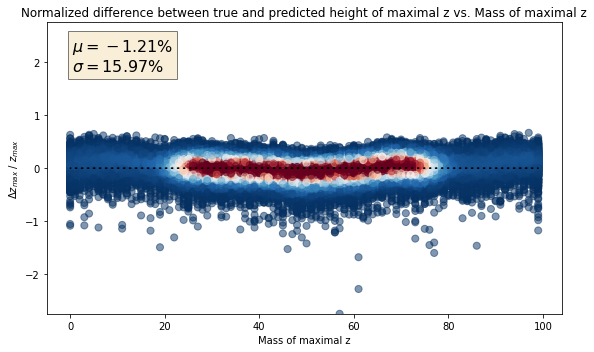

In [ ]:
# (H3) Normalized difference in predicted HEIGHT OF MAXIMAL Z vs. Mass of maximal z

x = max_z_pos_true[max_z_true>0] # True position of the maximal z
y = ((max_z_true[max_z_true>0] - max_z_pred[max_z_true>0])/max_z_true[max_z_true>0])
# y = np.nan_to_num(y)

# Mean fractional error in predicted height of maximal z
mean, std = np.mean(y), (np.var(y))**0.5
print('Mean fractional error in predicted height of maximal z: %.4f \u00B1 %.4f'%(mean,std)) # u00B1 = unicode of "+-" symbol

fig, ax = plt.subplots(figsize=(8,5))

if 1:
  xy = np.vstack([x,y])/5
  z = gaussian_kde(xy)(xy)
  cmap = matplotlib.cm.get_cmap('RdBu_r')
  ax.scatter(x, y, s=50, c=cmap(z), alpha=0.5)
else:
  ax.scatter(x, y)

# ax.hist2d(x, y, bins=50, norm=mcolors.PowerNorm(0.5), cmap='Blues')
ax.plot(x, np.zeros(len(x)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
# ax.plot(x, np.ones(len(x))*mean, 'b--', linewidth=1, dashes=(2, 4))

# ax.set_xlabel(r'$mass$')
ax.set_xlabel('Mass of maximal z')
ax.set_ylabel(r'${\Delta z_{max}}$'+' / '+r'${z_{max}}$')
ax.set(title='Normalized difference between true and predicted height of maximal z vs. Mass of maximal z')

ylim = max(abs(y.max()),abs(y.min()))
ax.set_ylim(-ylim,ylim)
# ax.set_ylim(-0.1,0.1)

textstr = '\n'.join(((
    r'$\mu = {0:.2%}$'.format(mean)+'%'),
    r'$\sigma = {0:.2%}$'.format(std)+'%'))
props = dict(facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=font_size,
        verticalalignment='top', bbox=props)

plt.tight_layout()

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_h_vs_m_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'H3.png')

plt.show() # A new figure is created after plt.show() is called

Mean fractional error in predicted height of maximal z: -0.0121 ± 0.1597



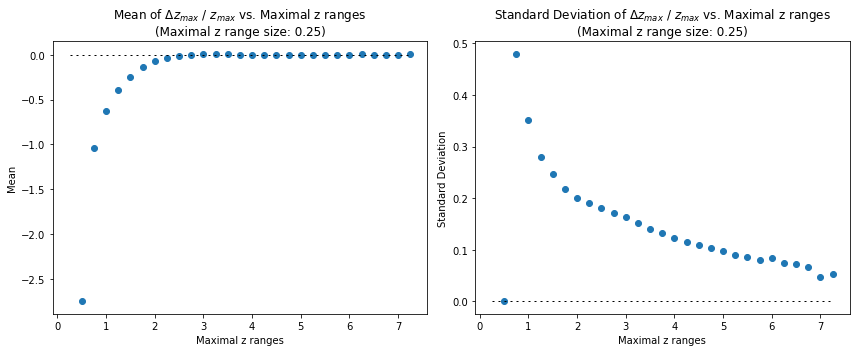

In [ ]:
# (R) Statistics of normalized difference in predicted HEIGHT OF MAXIMAL Z vs. Z ranges

# # Debugging - Choosing data
# x = np.array([0.5,3,2,1,1])
# y = np.array([0.5,3,2,-1,1])

# Calculating predictions evaluation
x = max_z_true[max_z_true>0] # True maximal z
y = ((max_z_true[max_z_true>0] - max_z_pred[max_z_true>0])/max_z_true[max_z_true>0])
# y = np.nan_to_num(y)

# Sorting data
sort_order = np.argsort(x)
x = x[sort_order]
y = y[sort_order]

# Mean fractional error in predicted height of maximal z
mean_total, sd_total = np.mean(y), (np.var(y))**0.5
print('Mean fractional error in predicted height of maximal z: %.4f \u00B1 %.4f\n'%(mean_total,sd_total)) # u00B1 = unicode of "+-" symbol

# Calculating z ranges
z_range_amount = math.ceil(max(x)/ml_z_range_size)
z_range_upper_values = list(range(1, z_range_amount+1))
z_range_upper_values = [float(i)*ml_z_range_size for i in z_range_upper_values]

# Debugging - Printing data
if 0:
  print('\nx',x)
  print('len(x)',len(x))
  print('z_range_upper_values',z_range_upper_values)
  print('len(z_range_upper_values)',len(z_range_upper_values),'\n')

# Calculating statistics per z range
mean = []
sd =[]
i_array = 0
i_z_range = 0 # First range is denoted by "0"
not_empty_range_upper_values = []
ys_in_range = []

while i_array < len(x):
  # # print('i_array',i_array,z_range_upper_values[i_z_range]-ml_z_range_size ,x[i_array] , z_range_upper_values[i_z_range])
  # print('z_range_upper_values[i_z_range]-ml_z_range_size',z_range_upper_values[i_z_range]-ml_z_range_size)
  # print('x[i_array]',x[i_array])
  # print('z_range_upper_values[i_z_range]',z_range_upper_values[i_z_range],'\n')

  # If the element belongs to the current range
  if (z_range_upper_values[i_z_range]-ml_z_range_size < x[i_array]) and (x[i_array] <= z_range_upper_values[i_z_range]):
    # print('Inside range: i_array =',i_array,'i_z_range =',i_z_range)
    ys_in_range.append(y[i_array])
    i_array += 1

  # If the element doesn't belong to the current range
  elif x[i_array] > z_range_upper_values[i_z_range]:
    # print('Outside range: i_array =',i_array,'i_z_range =',i_z_range)
    if ys_in_range: # If the range isn't empty
      not_empty_range_upper_values.append(z_range_upper_values[i_z_range])
      mean.append(np.mean(ys_in_range))
      sd.append((np.var(ys_in_range))**0.5)
    # Search the same element again in the next range
    i_z_range += 1
    ys_in_range = []
  
  # If this is the last element
  if i_array == len(x): # If the element was in the range, then i_array was added a 1
    if ys_in_range: # If the range isn't empty
      not_empty_range_upper_values.append(z_range_upper_values[i_z_range])
      mean.append(np.mean(ys_in_range))
      sd.append((np.var(ys_in_range))**0.5)

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(not_empty_range_upper_values, mean)
axes[0].plot(z_range_upper_values, np.zeros(len(z_range_upper_values)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
axes[0].set(title='Mean of ' + r'${\Delta z_{max}}$' + ' / ' + r'${z_{max}}$ ' + 'vs. Maximal z ranges\n(Maximal z range size: ' + str(ml_z_range_size) + ')')
axes[0].set(ylabel='Mean', xlabel='Maximal z ranges')

axes[1].scatter(not_empty_range_upper_values, sd)
axes[1].plot(z_range_upper_values, np.zeros(len(z_range_upper_values)), 'k--', linewidth=1, dashes=(2, 4)) # dashes(length, space)
axes[1].set(title='Standard Deviation of ' + r'${\Delta z_{max}}$' + ' / ' + r'${z_{max}}$ ' + 'vs. Maximal z ranges\n(Maximal z range size: ' + str(ml_z_range_size) + ')')
axes[1].set(ylabel='Standard Deviation', xlabel='Maximal z ranges')

plt.tight_layout()

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_h_stat_vs_z_range_' + plot_session_id + '.png')

plt.show() # A new figure is created after plt.show() is called

# Debugging
if 0:
  print('\n')
  print('z_range_amount:',z_range_amount)
  print('len(z_range_upper_values)',len(z_range_upper_values))
  print('z_range_upper_values',z_range_upper_values)
  # print(range_y_values)

  print('\n')
  print('i_z_range',i_z_range)
  print('len(not_empty_range_upper_values)',len(not_empty_range_upper_values))
  print('len(mean)',len(mean))

if 0:
  print('\n')
  print('x',x)
  print('not_empty_range_upper_values',not_empty_range_upper_values)
  print('mean',mean)
  print('sd',sd)

### Height of Maximal z Considering Bias

Mean of true maximal z: 3.239 
Mean of predicted maximal z: 3.220
Mean of (predicted maximal z / true maximal z): 1.012

Standard deviation of true maximal z: 0.879 
Standard deviation of predicted maximal z: 0.951
Standard deviation of (predicted maximal z / true maximal z): 0.158


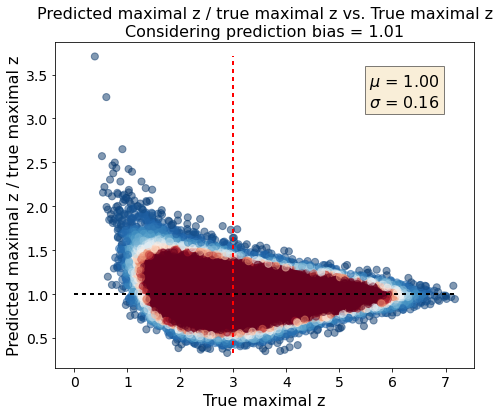

In [ ]:
# (RVZ) Ratio of means of predicted and true heights of maximal z vs. True max z - Considering bias 

# Calculating variables
x = max_z_true[max_z_true>0] # max_z_true
y = ((max_z_pred[max_z_true>0]/pred_bias) / max_z_true[max_z_true>0]) # Considering bias
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
axes_max = np.max(np.concatenate((x,y)))

# Mean of the height of maximal z
mean_max_z_true = np.mean(max_z_true)
mean_max_z_pred = np.mean((max_z_pred/pred_bias)) # Considering bias
print('Mean of true maximal z: %.3f'%(mean_max_z_true), '\nMean of predicted maximal z: %.3f'%(mean_max_z_pred))
mean_max_z_ratio = np.mean((max_z_pred/pred_bias)/max_z_true) # Considering bias
print('Mean of (predicted maximal z / true maximal z): %.3f\n'%(pred_bias))

# Standard deviation of the height of maximal z
std_max_z_true = np.std(max_z_true)
std_max_z_pred = np.std((max_z_pred/pred_bias)) # Considering bias
print('Standard deviation of true maximal z: %.3f'%(std_max_z_true), '\nStandard deviation of predicted maximal z: %.3f'%(std_max_z_pred))
std_max_z_ratio = np.std((max_z_pred/pred_bias)/max_z_true)
print('Standard deviation of (predicted maximal z / true maximal z): %.3f'%(std_max_z_ratio))

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5,6))

# axes.scatter(x, y)
xy = np.vstack([x,y])/5
z = gaussian_kde(xy)(xy)
cmap = matplotlib.cm.get_cmap('RdBu_r')
axes.scatter(x, y, s=50, c=cmap(z), alpha=0.5)

axes.plot(np.linspace(0, x_max, num=100), np.full((100,1), fill_value=1), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.plot(np.full((100,1), fill_value=3), np.linspace(y_min, y_max, num=100), 'r--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.set_title('Predicted maximal z / true maximal z vs. True maximal z\nConsidering prediction bias = {placeholder:.2f}'.format(placeholder = pred_bias), fontsize=font_size)
axes.set_ylabel('Predicted maximal z / true maximal z', fontsize=font_size)
axes.set_xlabel('True maximal z', fontsize=font_size)
axes.tick_params(labelsize=tick_size)

textstr = '$\u03bc$ = {placeholder1:.2f}\n$\u03c3$ = {placeholder2:.2f}'.format(placeholder1 = mean_max_z_ratio, placeholder2 = std_max_z_ratio) # The \uxxxx is for unicode letters and $xxx$ is for italics
props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.75, 0.8, textstr, transform=axes.transAxes, fontsize=font_size, bbox=props)

plt.show()

FN = 8.69%, FP = 6.46%, TN = 35.20%, TP = 49.65%.
True positive rate = 85.11%. False positive rate = 15.51%.


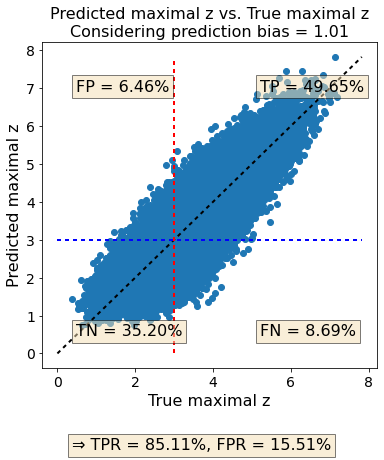

In [ ]:
# (ZVZ) Predicted max z vs. True max z - Considering bias

x = max_z_true[max_z_true>0] # max_z_true
y = (max_z_pred[max_z_true>0]/pred_bias) # Considering predictions bias
x_len = len(x)
z_max = np.max(np.concatenate((x,y)))

# Calculating false / true negatives / positives precentages
fn = 0
fp = 0
tn = 0
tp = 0
for i in range(x_len):
  if (x[i] > 3) and (y[i] < 3):
    fn += 1
  elif (x[i] < 3) and (y[i] > 3):
    fp += 1
  elif (x[i] < 3) and (y[i] < 3):
    tn += 1
  elif (x[i] > 3) and (y[i] > 3):
    tp += 1

fn_percent = 100*fn/x_len
fp_percent = 100*fp/x_len
tn_percent = 100*tn/x_len
tp_percent = 100*tp/x_len
print('FN = %.2f%%, FP = %.2f%%, TN = %.2f%%, TP = %.2f%%.' %(fn_percent, fp_percent, tn_percent, tp_percent))

tpr = tp_percent/(tp_percent+fn_percent) # True positive rate = tp_num/(tp_num+fn_num)
fpr = fp_percent/(fp_percent+tn_percent) # False positive rate = fp_num/(fp_num+tn_num) = 1 - Specificity = 1 - tn_num/(tn_num+fp_num)
print('True positive rate = %.2f%%. False positive rate = %.2f%%.' %(100*tpr, 100*fpr)) # "%%"" prints a single '%'

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

axes.scatter(x, y)
axes.plot(np.linspace(0, z_max, num=100), np.linspace(0, z_max, num=100), 'k--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.plot(np.full((100,1), fill_value=3), np.linspace(0, z_max, num=100), 'r--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.plot(np.linspace(0, z_max, num=100), np.full((100,1), fill_value=3), 'b--', linewidth=2, dashes=(2, 2)) # dashes(length, space)
axes.set_title('Predicted maximal z vs. True maximal z\nConsidering prediction bias = {placeholder:.2f}'.format(placeholder = pred_bias), fontsize=font_size)
axes.set_ylabel('Predicted maximal z', fontsize=font_size)
axes.set_xlabel('True maximal z', fontsize=font_size)
axes.tick_params(labelsize=tick_size)

props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.65, 0.85, 'TP = {placeholder:.2f}%'.format(placeholder = tp_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)
axes.text(0.1, 0.85, 'FP = {placeholder:.2f}%'.format(placeholder = fp_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)
axes.text(0.1, 0.1, 'TN = {placeholder:.2f}%'.format(placeholder = tn_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)
axes.text(0.65, 0.1, 'FN = {placeholder:.2f}%'.format(placeholder = fn_percent), transform=axes.transAxes, fontsize=font_size, bbox=props)

text_rates = '\u21d2 TPR = {placeholder1:.2f}%, FPR = {placeholder2:.2f}%'.format(placeholder1 = 100*tpr, placeholder2 = 100*fpr)
props = dict(facecolor='wheat', alpha=0.5)
axes.text(0.05+0.01*z_max/2, -0.25, text_rates, transform=axes.transAxes, fontsize=font_size, bbox=props)

if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_pred_z_true_z_bias_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'pred_z_true_z_bias.png')

plt.show() # A new figure is created after plt.show() is called

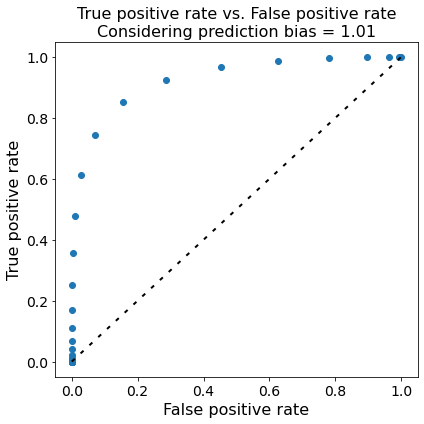

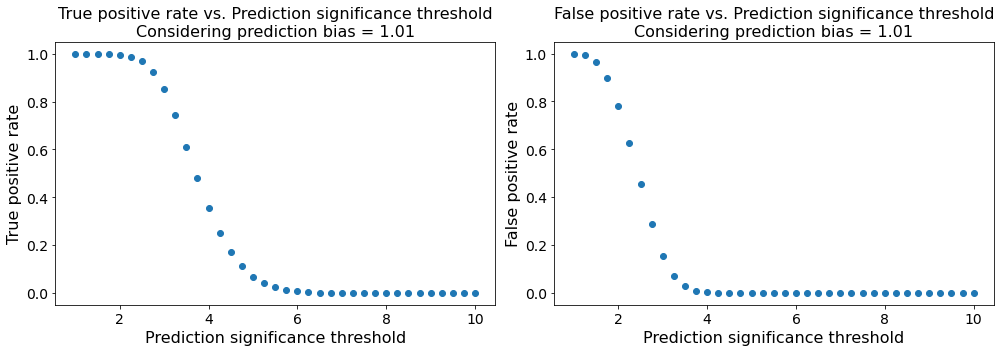

In [ ]:
# (ROC) ROC Curve - Considering prediction bias

# Setting significance thresholds
significance_threshold_true = 3 # Significance threshold for the true max z
significance_threshold_min = 1 # Significance threshold for the predicted max z
significance_threshold_max = 10
significance_threshold_step = 0.25
significance_threshold_pred = np.arange(significance_threshold_min, significance_threshold_max + significance_threshold_step, significance_threshold_step) # arange(a,b) returns [a,b)

# Calculating false / true negatives / positives percentages
tpr_values = np.array([])
fpr_values = np.array([])

for i in range(0,len(significance_threshold_pred)): # For all of the predicted samples thresholds
  fn = np.array([])
  fp = np.array([])
  tn = np.array([])
  tp = np.array([])
  for j in range(0,len(max_z_true)): # For all of the samples
    if (max_z_true[j] > significance_threshold_true) and ((max_z_pred/pred_bias)[j] < significance_threshold_pred[i]):
      fn = np.append(fn, max_z_true[j])
    elif (max_z_true[j] < significance_threshold_true) and ((max_z_pred/pred_bias)[j] > significance_threshold_pred[i]):
      fp = np.append(fp, max_z_true[j])
    elif (max_z_true[j] < significance_threshold_true) and ((max_z_pred/pred_bias)[j] < significance_threshold_pred[i]):
      tn = np.append(tn, max_z_true[j])
    elif (max_z_true[j] > significance_threshold_true) and ((max_z_pred/pred_bias)[j] > significance_threshold_pred[i]):
      tp = np.append(tp, max_z_true[j])

  fn_num = len(fn)
  fp_num = len(fp)
  tn_num = len(tn)
  tp_num = len(tp)

  tpr = tp_num/(tp_num+fn_num) # True positive rate
  fpr = fp_num/(fp_num+tn_num) # False positive rate = 1 - Specificity = 1 - tn_num/(tn_num+fp_num)
  tpr_values = np.append(tpr_values, tpr) # Saving the values for later
  fpr_values = np.append(fpr_values, fpr)

max_value = np.max(np.concatenate((tpr_values,fpr_values)))

# Plotting results
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

axes.scatter(fpr_values, tpr_values)
axes.plot(np.linspace(0, max_value, num=100), np.linspace(0, max_value, num=100), 'k--', linewidth=2, dashes=(2, 4)) # dashes(length, space)
axes.set_title('True positive rate vs. False positive rate\nConsidering prediction bias = {placeholder:.2f}'.format(placeholder = pred_bias), fontsize=font_size)
axes.set_ylabel('True positive rate', fontsize=font_size)
axes.set_xlabel('False positive rate', fontsize=font_size)
axes.tick_params(labelsize=tick_size)

plt.tight_layout()
if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_roc_bias_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'roc_bias.png')
plt.show() # A new figure is created after plt.show() is called

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].scatter(significance_threshold_pred, tpr_values)
axes[0].set_title('True positive rate vs. Prediction significance threshold\nConsidering prediction bias = {placeholder:.2f}'.format(placeholder = pred_bias), fontsize=font_size)
axes[0].set_ylabel('True positive rate', fontsize=font_size)
axes[0].set_xlabel('Prediction significance threshold', fontsize=font_size)
axes[0].tick_params(labelsize=tick_size)

axes[1].scatter(significance_threshold_pred, fpr_values)
axes[1].set_title('False positive rate vs. Prediction significance threshold\nConsidering prediction bias = {placeholder:.2f}'.format(placeholder = pred_bias), fontsize=font_size)
axes[1].set_ylabel('False positive rate', fontsize=font_size)
axes[1].set_xlabel('Prediction significance threshold', fontsize=font_size)
axes[1].tick_params(labelsize=tick_size)

plt.tight_layout()
if plot_ml_save_flag:
  plt.savefig(plot_directory + 'evaluation_roc_bias_2_' + plot_session_id + '.png')
  # plt.savefig(plot_directory + 'roc_bias_2.png')
plt.show() # A new figure is created after plt.show() is called

### Entire z Curve

In [ ]:
# Evaluating the prediction of the ENTIRE Z CURVE

# Mean normalized difference error (subtracting the curves from one another)
cum_error = np.sum(abs(Y_test - predictions_scaled_back), axis=1) # Compare predictions to Y_test, which is normalized and scaled!
avg_frac_error = np.mean(cum_error/np.sum(Y_test, axis=1))
print('Average fractional error in prediction: {0:.2%}'.format(avg_frac_error))

Average fractional error in prediction: 41.84%


## (P) Plotting for a Paper

### 1) Data Generation

Presenting preprocessed training sample number 141027/600000.

Could not print observed data parameters.



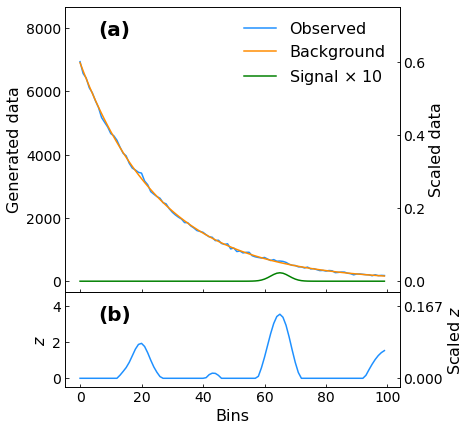

In [ ]:
# Plotting example training data

if plot_paper_flag:
  # Searching for a sample that looks good for presentation
  search_sample_flag = 0 # 0 - Don't search for a sample and use "sample_index" to specify it. 1 - Search.
  sample_index = 141027 - 1 # You need to subtract 1 from the number of the sample to get its array index
  # sample_index = 5487 - 1
  # sample_index = 141027 - 1
  # sample_index = 193738 - 1
  # sample_index = 259289 - 1
  # sample_index = 318119 - 1
  # sample_index = 372794 - 1
  skips_num = 0

   # Number of samples to skip when searching. Allows to go throw samples of the same query
  
  if search_sample_flag:
    for sample_index in range(0, data_train_num_samples):
      bin_of_max_z_in_sig = np.where(S_train[sample_index] == max(S_train[sample_index]))[0][0]
      bin_of_max_z_in_z = np.where(Y_train[sample_index] == max(Y_train[sample_index]))[0][0]

      if (5000 <= X_train[sample_index][0] <= 7000) \
      and (X_train[sample_index][-1] <= 200) \
      and (3 <= np.max(Y_train[sample_index]) <= 4) \
      and (abs(bin_of_max_z_in_sig - bin_of_max_z_in_z) <= 0) \
      and (40 <= bin_of_max_z_in_z):
        if skips_num > 0:
          skips_num -= 1
        else:
          break

  print('Presenting preprocessed training sample number %d/%d.\n' %(sample_index+1, data_train_num_samples))
 
  # Plotting
  sig_factor = 10 # Multiplies the signal in the plot
  fig_1, (axes_0, axes_1) = plt.subplots(2, 1, figsize=(6,7), sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

  ######################### Subplot (a) #########################
  axes_0.plot(X_train[sample_index], color='dodgerblue', label='Observed')
  axes_0.plot(B_train[sample_index], color='darkorange', label='Background')
  axes_0.plot(sig_factor * S_train[sample_index], color='green', label='Signal $\u00D7$ {}'.format(sig_factor))
  axes_0.legend(loc='upper right', fontsize=font_size, frameon=False)
  # axes_0.set_title('Generated data vs. Bins', fontsize=font_size)
  # axes_0.set_xlabel('Bins', fontsize=font_size)
  axes_0.set_ylabel('Generated data', fontsize=font_size)
  axes_0.tick_params(axis='both', which='major', direction='in', labelsize=tick_size)
  # axes_0.semilogy()
  axes_0.set_ylim(top=1.25*np.max(X_train[sample_index]))
  # axes_0.set_ylim(top=np.amax(X_train)*0.6)
  
  # Adding a right axis
  axes_right = axes_0.twinx()
  axes_right.set_ylabel('Scaled data', fontsize=font_size)
  axes_right.set_yticks(ticks=np.linspace(0, 1, num=6, endpoint=True))
  # axes_right.set_yticklabels(labels=np.linspace(0, 1, num=6, endpoint=True))
  axes_right.tick_params(axis ='y', which='major', direction='in', labelsize=tick_size)
  axes_right.set_ylim(bottom=-0.03, top=0.75)

  # Adding label
  axes_0.text(0.1, 0.9, '(a)', transform=axes_0.transAxes, fontweight='bold', fontsize=font_size+4)

  ######################### Subplot (b) #########################
  axes_1.plot(Y_train[sample_index], color='dodgerblue')
  # axes_1.set_title('z vs. Bins', fontsize=font_size)
  axes_1.set_xlabel('Bins', fontsize=font_size)
  axes_1.set_ylabel('$z$', fontsize=font_size)
  axes_1.tick_params(axis='both', which='major', direction='in', labelsize=tick_size)
  axes_1.set_ylim(top=np.amax(Y_train)*0.2)
  axes_1.set_ylim(bottom=-0.5, top=np.amax(Y_train)*0.2)

  # Adding a right axis
  axes_right = axes_1.twinx()
  # axes_right.set_navigate(False)
  axes_right.set_ylabel('Scaled $z$', fontsize=font_size)
  axes_right.set_yticks(ticks=np.linspace(0, 1, num=7, endpoint=True), minor=False)
  # axes_right.set_yticklabels(labels=np.linspace(0, 10, num=7, endpoint=True))
  axes_right.tick_params(axis ='y', which='major', direction='in', labelsize=tick_size)
  axes_right.set_ylim(bottom=-0.0225, top=0.2)

  # Adding label
  axes_1.text(0.1, 0.7, '(b)', transform=axes_1.transAxes, fontweight='bold', fontsize=font_size+4)

  # Removing the vertical gap between the subplots
  plt.subplots_adjust(hspace=0.0)

  # Printing extra details
  try:
    print('Background type:', BT_train[sample_index], ', background parameters:', \
          BP_train[sample_index], ', signal height:', SP_train[rand_index,2], '\n')
  except:
    print('Could not print observed data parameters.\n')

  # Saving the plot
  if plot_paper_save_flag:
    plt.savefig(plot_directory + 'paper_1_' + plot_session_id + '.png')

  plt.show() # A new figure is created after plt.show() is called
  
else:
  print('This cell wasn\'t executed.')

In [ ]:
# Exploring the desired limits of the y axes

print('Exploring the desired limits of the y axes:\n')

# Subplot (a)
min_obs_all = np.amin(X_train)
max_obs_all = np.amax(X_train)
min_obs_sample = X_train[sample_index].min()
max_obs_sample = X_train[sample_index].max()

print('min of obs of all train samples =', min_obs_all)
print('max of obs of all train samples =', max_obs_all)
print('min of obs of plotted sample =', min_obs_sample)
print('max of obs of plotted sample =', max_obs_sample)
print()
print('=> max_obs_sample / max_obs_all =', max_obs_sample / max_obs_all)
print()

# Subplot (b)
min_z_all = np.amin(Y_train)
max_z_all = np.amax(Y_train)
min_z_sample = Y_train[sample_index].min()
max_z_sample = Y_train[sample_index].max()

print('min of z of all train samples =', min_z_all)
print('max of z of all train samples =', max_z_all)
print('min of z of plotted sample =', min_z_sample)
print('max of z of plotted sample =', max_z_sample)
print()
print('=> max_z_sample / max_z_all =', max_z_sample / max_z_all)

Exploring the desired limits of the y axes:

min of obs of all train samples = 64.6964539095884
max of obs of all train samples = 10927.123090879331
min of obs of plotted sample = 172.0
max of obs of plotted sample = 6943.0

=> max_obs_sample / max_obs_all = 0.6353913964596221

min of z of all train samples = 0.0
max of z of all train samples = 23.910254340990342
min of z of plotted sample = 0.0
max of z of plotted sample = 3.557843155324662

=> max_z_sample / max_z_all = 0.14879988747026016


### 2) Maximum z Error

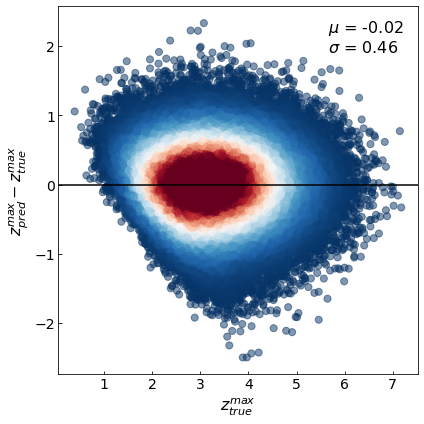

In [ ]:
# Plotting predictions evaluation: Predicted maximal z - True maximal z vs. True maximal z

if plot_paper_flag:
  # Calculating variables
  max_z_true = Y_test.max(axis=1)
  max_z_pred = predictions_scaled_back.max(axis=1)
  max_z_true_num = len(max_z_true)
  max_z_pred_num = len(max_z_pred)
  # You might want to look only at nonzero values, in case you'll divide by them:
  # max_z_true = max_z_true[max_z_true>0]

  # Calculating statistics
  if 0:
    # Calculating the mean of the height of maximal z
    mean_max_z_true = np.mean(max_z_true)
    print('Mean of true maximal z: %.3f'%(mean_max_z_true))
    mean_max_z_pred = np.mean(max_z_pred)
    print('Mean of predicted maximal z: %.3f'%(mean_max_z_pred))

    max_z_diff = (max_z_true[max_z_true>0] - max_z_pred[max_z_true>0])
    mean_max_z_diff = np.mean(max_z_diff)
    print('Mean difference between true and predicted height of maximal z: %.3f'%(mean_max_z_diff))

    max_z_ratio = max_z_pred[max_z_true>0]/max_z_true[max_z_true>0]
    mean_max_z_ratio = np.mean(max_z_ratio)
    print('Mean of (predicted maximal z / true maximal z): %.3f\n'%(mean_max_z_ratio))

    # Calculating the standard deviation of the height of maximal z
    std_max_z_true = np.std(max_z_true)
    print('Standard deviation of true maximal z: %.3f'%(std_max_z_true))
    std_max_z_pred = np.std(max_z_pred)
    print('Standard deviation of predicted maximal z: %.3f'%(std_max_z_pred))

    std_max_z_diff = np.std(max_z_diff)
    print('Standard deviation of difference between true and predicted height of maximal z: %.3f'%(std_max_z_diff))
    std_max_z_ratio = np.std(max_z_ratio)
    print('Standard deviation of (predicted maximal z / true maximal z): %.3f'%(std_max_z_ratio))
    print('\n')

  # Creating figure and axes
  fig_2, axes = plt.subplots(1, 1, figsize=(6,6))

  # Setting plot variables
  x = max_z_true[max_z_true>0] # True maximal z
  y = (max_z_pred - max_z_true)[max_z_true>0]
  # y = np.nan_to_num(y)

  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y)
  y_max = np.max(y)
  y_lim = max(abs(y.max()),abs(y.min()))

  # Plotting
  if 1:
    xy = np.vstack([x,y])/2 # Increasing the numerical value increases the radius of the red spot
    z = gaussian_kde(xy)(xy)
    cmap = matplotlib.cm.get_cmap('RdBu_r')
    axes.scatter(x, y, s=50, c=cmap(z), alpha=0.5) # s = size
    # axes.scatter(x, y, c=cmap(z), edgecolor='', alpha=0.5) cuases an error when using a local runtime
  else:
    axes.scatter(x, y)
  axes.axhline(0, color='black') # Adding the x = 0
  # axes.set_title('Predicted maximum z - True maximum z vs. True maximum z', fontsize=font_size)
  axes.set_ylabel('$z_{pred}^{max} - z_{true}^{max}$', fontsize=font_size)
  # axes.set_ylabel('Predicted maximum z - True maximum z', fontsize=font_size)
  axes.set_xlabel('$z_{true}^{max}$', fontsize=font_size)
  # axes.set_xlabel('True maximum z', fontsize=font_size)
  axes.tick_params(axis='both', which='major', direction='in', labelsize=tick_size)

  textstr = '$\u03bc$ = {:.2f}\n$\u03c3$ = {:.2f}'.format(mean_max_z_diff, std_max_z_diff) # The \uxxxx is for unicode letters and $xxx$ is for italics
  props = dict(facecolor='none', edgecolor='none')
  axes.text(0.75, 0.875, textstr, transform=axes.transAxes, fontsize=font_size, bbox=props)

  plt.tight_layout()
  
  # Saving the plot
  if plot_paper_save_flag:
    plt.savefig(plot_directory + 'paper_2_' + plot_session_id + '.png')
    # plt.savefig(plot_directory + 'dz_vs_z.png')

  plt.show() # A new figure is created after plt.show() is called
  
else:
  print('This cell wasn\'t executed.')

### 3) Maximum z Histograms

Number of testing samples with background only: 150000
Number of testing samples with background + signal: 150000 



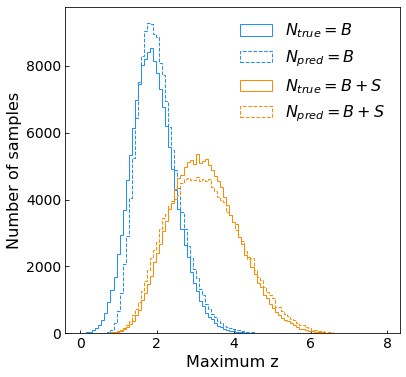

In [ ]:
# Plotting maximal z histograms (WITHOUT FILTERING BY MASS)

if plot_paper_flag:
  # Loading data
  session_id_true_obs_is_b = 'prl_simulation_211029_150k_testing_no_sig' # Testing data with observed with background only
  session_id_true_obs_is_b_plus_s = 'prl_simulation_211029_150k_testing_sig' # Testing data with observed with background + signal
  session_id_pred_obs_is_b = 'prl_simulation_211029_150k_testing_no_sig' # Predictions for observed with background only
  session_id_pred_obs_is_b_plus_s = 'prl_simulation_211029_150k_testing_sig' # Predictions for observed with background + signal

  z_true_obs_is_b = np.load(data_test_directory + 'data_test_' + session_id_true_obs_is_b + '_Y.npy')
  z_true_obs_is_b_plus_s = np.load(data_test_directory + 'data_test_' + session_id_true_obs_is_b_plus_s + '_Y.npy')
  z_pred_obs_is_b = np.load(ml_predict_directory + 'predictions_scaled_back_' + session_id_pred_obs_is_b + '.npy')
  z_pred_obs_is_b_plus_s = np.load(ml_predict_directory + 'predictions_scaled_back_' + session_id_pred_obs_is_b_plus_s + '.npy')

  print('Number of testing samples with background only:', len(z_true_obs_is_b))
  print('Number of testing samples with background + signal:', len(z_true_obs_is_b_plus_s), '\n')

  # Calculating variables
  max_z_true_obs_is_b = np.max(z_true_obs_is_b, axis=1)
  max_z_true_obs_is_b_plus_s = np.max(z_true_obs_is_b_plus_s, axis=1)
  max_z_pred_obs_is_b = np.max(z_pred_obs_is_b, axis=1)
  max_z_pred_obs_is_b_plus_s = np.max(z_pred_obs_is_b_plus_s, axis=1)

  conc_args = (max_z_true_obs_is_b, max_z_true_obs_is_b_plus_s, max_z_pred_obs_is_b, max_z_pred_obs_is_b_plus_s)
  max_z_overall = np.max(np.concatenate(conc_args))

  # Calculating histogram variables
  hist_bins = np.linspace(0, max_z_overall, num=101, endpoint=True)
  # hist_bins = [0,0.25,0.5,0.75, 1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4,4.25,4.5,4.75, 5]
  # hist_bins = [0,0.5, 1,1.5, 2,2.5, 3,3.5, 4,4.5, 5]
  # hist_bins = [2.5,2.75,3,3.25,3.5]

  hist_bins_centers = np.zeros(len(hist_bins) - 1)
  for i in range(0, len(hist_bins) - 1):
    hist_bins_centers[i] = 0.5 * (hist_bins[i] + hist_bins[i+1]) 

  hist_true_obs_is_b, hist_bin_edges_true_obs_is_b = np.histogram(max_z_true_obs_is_b, bins=hist_bins)
  hist_true_obs_is_b_plus_s, hist_bin_edges_true_obs_is_b_plus_s = np.histogram(max_z_true_obs_is_b_plus_s, bins=hist_bins)
  hist_pred_obs_is_b, hist_bin_edges_pred_obs_is_b = np.histogram(max_z_pred_obs_is_b, bins=hist_bins)
  hist_pred_obs_is_b_plus_s, hist_bin_edges_pred_obs_is_b_plus_s = np.histogram(max_z_pred_obs_is_b_plus_s, bins=hist_bins)

  # Debugging
  if 0:
    max_hist_true = np.max(np.concatenate((hist_true_obs_is_b, hist_true_obs_is_b_plus_s), axis=0)) # The maximal value in the histogram 
    max_hist_pred = np.max(np.concatenate((hist_pred_obs_is_b, hist_pred_obs_is_b_plus_s), axis=0))
    print('max_hist_true =', max_hist_true)
    print('max_hist_pred =', max_hist_pred)

  # Plotting
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

  axes.hist(max_z_true_obs_is_b, hist_bins, histtype='step', linestyle='solid', \
            color='dodgerblue', label='$N_{true} = B$')
  axes.hist(max_z_pred_obs_is_b, hist_bins, histtype='step', linestyle='dashed', \
            color='dodgerblue', label='$N_{pred} = B$')
  axes.hist(max_z_true_obs_is_b_plus_s, hist_bins, histtype='step', linestyle='solid', \
            color='darkorange', label='$N_{true} = B + S$')
  axes.hist(max_z_pred_obs_is_b_plus_s, hist_bins, histtype='step', linestyle='dashed', \
            color='darkorange', label='$N_{pred} = B + S$')
  # axes.set_title('Maximum z histograms', fontsize=font_size)
  axes.set_ylabel('Number of samples', fontsize=font_size)
  axes.set_xlabel('Maximum z', fontsize=font_size)
  axes.tick_params(axis='both', which='major', direction='in', labelsize=tick_size)
  # axes.plot(np.full((100,1), fill_value=3), np.linspace(0, max_hist_pred, num=100), 'k--', linewidth=2, dashes=(2, 3)) # dashes=(length, space)
  
  # Adding a legend
  legend_type = 1 # Selecting legend type
  if legend_type == 1:
    axes.legend(loc='upper right', fontsize=font_size, frameon=False)
  elif legend_type == 2:
    the_table = plt.table(cellText = [['solid', 'dashed'], ['solid', 'dashed']],
    # plt.table(cellText = [[colored('-', 'blue'), colored('--', 'yellow')], [colored('-', 'blue'), colored('--', 'yellow')]],
    # plt.table(cellText = [[Fore.CYAN + '-', Fore.RED + '--'], [Fore.CYAN + '-', Fore.RED + '--']],
              cellColours = [['dodgerblue', 'dodgerblue'], ['darkorange', 'darkorange']],
              cellLoc = 'center',
              rowLabels = ['$N = B$', '$N = B + S$'],
              rowLoc = 'left',
              colLabels = ['true', 'pred'],
              colLoc = 'center',
              colWidths = [0.175, 0.175],
              edges = 'closed',
              loc = 'upper right',
              fontsize = font_size)

  # Saving the plot
  if plot_ml_save_flag:
    plt.savefig(plot_directory + 'paper_3_' + session_id_pred_obs_is_b + '_' + session_id_pred_obs_is_b_plus_s + '.png')
  plt.show()

  # Debugging
  if 0:
    print('max_z_overall =', max_z_overall)
    print('len(hist_bins) =', len(hist_bins))
    print('hist_bins =', hist_bins)
    print('len(hist_bins_centers) =', len(hist_bins_centers))
    print('len(hist_true_obs_is_b) =', len(hist_true_obs_is_b))
    print('type(hist_true_obs_is_b) =', type(hist_true_obs_is_b))
    print('hist_true_obs_is_b =', hist_true_obs_is_b)
  
else:
  print('This cell wasn\'t executed.')

### 4) ROC Curves

Area under ROC curve - True: 0.899, predicted: 0.865
Area under true ROC curve / Area under predicted ROC curve: 1.040
Area error = 100*(A_true-A_pred)/A_true = 3.85%


For true z histograms and threshold = 3.05: TPR = 0.579, FPR = 0.039
For predicted z histograms and threshold = 3.05: TPR = 0.572, FPR = 0.057




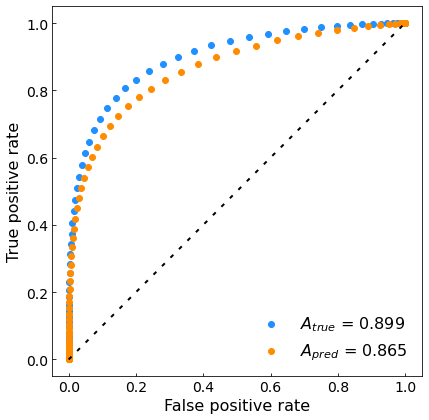

In [ ]:
# Plotting ROC curves (WITHOUT FILTERING BY MASS)

if plot_paper_flag:
  # Calculating true positive rate & false positive rate
  tpr_values_true = np.array([])
  fpr_values_true = np.array([])
  tpr_values_pred = np.array([])
  fpr_values_pred = np.array([])

  for bin_i in np.arange(0, len(hist_bins)-1): # If hist_bins is the bins edges, then for 100 bins its length is 101
    tp_true = np.sum(hist_true_obs_is_b_plus_s[bin_i:]) # Sensitivity
    fn_true = np.sum(hist_true_obs_is_b_plus_s[0:bin_i]) # Type 2 error - Rejecting a correct alt' hypothesis. The right index isn't included
    fp_true = np.sum(hist_true_obs_is_b[bin_i:]) # Type 1 error - Rejecting a correct null hypothesis
    tn_true = np.sum(hist_true_obs_is_b[0:bin_i]) # Specificity

    tpr_true = tp_true/(tp_true+fn_true) # True positive rate
    fpr_true = fp_true/(fp_true+tn_true) # False positive rate = 1 - Specificity = 1 - tn/(tn+fp)
    tpr_values_true = np.append(tpr_values_true, tpr_true) # Saving the values for later
    fpr_values_true = np.append(fpr_values_true, fpr_true)

    tp_pred = np.sum(hist_pred_obs_is_b_plus_s[bin_i:])
    fn_pred = np.sum(hist_pred_obs_is_b_plus_s[0:bin_i]) # The right index isn't included
    fp_pred = np.sum(hist_pred_obs_is_b[bin_i:])
    tn_pred = np.sum(hist_pred_obs_is_b[0:bin_i])

    tpr_pred = tp_pred/(tp_pred+fn_pred) # True positive rate
    fpr_pred = fp_pred/(fp_pred+tn_pred) # False positive rate = 1 - Specificity = 1 - tn/(tn+fp)
    tpr_values_pred = np.append(tpr_values_pred, tpr_pred) # Saving the values for later
    fpr_values_pred = np.append(fpr_values_pred, fpr_pred)

  # Calculating the area under the ROC curves
  area_roc_true = area_trapezoidal(fpr_values_true, tpr_values_true) # The arguments of area_trapezoidal() are coordinates (x,y)
  area_roc_pred = area_trapezoidal(fpr_values_pred, tpr_values_pred)

  # Printing results
  print('Area under ROC curve - True: %.3f, predicted: %.3f' %(area_roc_true, area_roc_pred))
  print('Area under true ROC curve / Area under predicted ROC curve: %.3f' %(area_roc_true/area_roc_pred))
  print('Area error = 100*(A_true-A_pred)/A_true = {:.2f}%'.format(100*(area_roc_true-area_roc_pred)/area_roc_true))
  print('\n')

  threshold_example = 3
  bins_example = np.where(np.floor(hist_bins_centers) == threshold_example) # Returns a tuple with an array in it: ([...])
  if len(bins_example[0]) != 0: # If not empty
    bin_example = bins_example[0][0] # The first bin
    print('For true z histograms and threshold = %.2f: TPR = %.3f, FPR = %.3f' %(hist_bins_centers[bin_example], tpr_values_true[bin_example], fpr_values_true[bin_example]))
    print('For predicted z histograms and threshold = %.2f: TPR = %.3f, FPR = %.3f' %(hist_bins_centers[bin_example], tpr_values_pred[bin_example], fpr_values_pred[bin_example]))
  else:
    print('The chosen threshold doesn\'t appear in the histogram bins.')
  print('\n')

  # Plotting results
  figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
  axes.set_aspect(1)

  axes.scatter(fpr_values_true, tpr_values_true, color='dodgerblue', \
               label='$A_{true}$' + ' = {:.3f}'.format(area_roc_true))
  axes.scatter(fpr_values_pred, tpr_values_pred, color='darkorange', \
               label='$A_{pred}$' + ' = {:.3f}'.format(area_roc_pred))
  axes.plot(np.linspace(0, 1, num=100), np.linspace(0, 1, num=100), 'k--', linewidth=2, dashes=(2, 4)) # dashes(length, space)
  # axes.set_title('True positive rate vs. False positive rate', fontsize=font_size)
  axes.set_ylabel('True positive rate', fontsize=font_size)
  axes.set_xlabel('False positive rate', fontsize=font_size)
  axes.legend(loc='lower right', fontsize=font_size, frameon=False)
  axes.tick_params(axis='both', which='major', direction='in', labelsize=tick_size)

  if 0: # Add text with areas under the ROC curve inside the figure
    area_roc_ratio = area_roc_true/area_roc_pred
    text = '$AUC_{true} = $' + '{:.3f}\n'.format(area_roc_true) + \
          '$AUC_{pred} = $' + '{:.3f}'.format(area_roc_pred)
    props = dict(facecolor='none', edgecolor='none')
    axes.text(0.625, 0.2, text, transform=axes.transAxes, fontsize=font_size, bbox=props)

  if 0: # Add text with areas under the ROC curves under the figure
    area_roc_ratio = area_roc_true/area_roc_pred
    text = '    Area under true curve: {:.3f}\n'.format(area_roc_true) + \
          '\u21d2 Area under predicted curve: {:.3f}\n'.format(area_roc_pred) + \
          '    Ratio of areas: {:.3f}'.format(area_roc_ratio)
    props = dict(facecolor='wheat', alpha=0.5)
    axes.text(-0.15, -0.45, text, transform=axes.transAxes, fontsize=font_size, bbox=props)

  plt.tight_layout()

  # Saving the plot
  if plot_ml_save_flag:
    plt.savefig(plot_directory + 'paper_4_' + session_id_pred_obs_is_b + '_' + session_id_pred_obs_is_b_plus_s + '.png')
  
  plt.show()
  
else:
  print('This cell wasn\'t executed.')

In [ ]:
# Finding FPRs that correspond to specific TPRs
if plot_paper_flag:
  if 0: # DEBUGGING
    print(tpr_values_true)
    print()
    print(fpr_values_true)

  tpr_thresholds = [0.6, 0.8] # Find FPRs that correspond to these TPRs

  for i in range(0,len(tpr_thresholds)):
    for j in range(len(tpr_values_true)-1, -1, -1): # Looping in reverse order
      if tpr_values_true[j] >= tpr_thresholds[i]:
        print('The first true TPR value over {} is {:.3f}, and its corresponding FPR is {:.3f}.' \
            .format(tpr_thresholds[i], tpr_values_true[j], fpr_values_true[j]))
        break
  print('\n')

  for i in range(0,len(tpr_thresholds)):
    for j in range(len(tpr_values_pred)-1, -1, -1): # Looping in reverse order
      if tpr_values_pred[j] >= tpr_thresholds[i]:
        print('The first predicted TPR value over {} is {:.3f}, and its corresponding FPR is {:.3f}.' \
            .format(tpr_thresholds[i], tpr_values_pred[j], fpr_values_pred[j]))
        break
        
else:
  print('This cell wasn\'t executed.')

The first true TPR value over 0.6 is 0.613, and its corresponding FPR is 0.049.
The first true TPR value over 0.8 is 0.806, and its corresponding FPR is 0.168.


The first predicted TPR value over 0.6 is 0.602, and its corresponding FPR is 0.070.
The first predicted TPR value over 0.8 is 0.805, and its corresponding FPR is 0.246.


## (T) Timing Section

In [ ]:
time_bump_hunting_end = datetime.datetime.now()
time_bump_hunting_total = time_bump_hunting_end - time_bump_hunting_start
print('This section finished running at:', time_bump_hunting_end, '\nIt was running for:', time_bump_hunting_total)

This section finished running at: 2021-11-09 21:45:16.156916 
It was running for: 0:50:12.057664


# USEFUL TOOLS

## (S) Copying Training Data

In [ ]:
# Loading a training data sets and saving it with a different name

data_train_copy_flag = 0

if data_train_copy_flag:
  # Setting session IDs
  data_train_loaded_session_id = '210305_v1'
  data_train_saved_session_id = '210305_v1+2'

  # Loading the training data set
  X_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_X.npy')
  Y_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_Y.npy')
  B_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_B.npy')
  S_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_S.npy')
  M_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_M.npy')
  try:
    BT_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_BT.npy')
    BP_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_BP.npy')
    SP_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_SP.npy')
    print('Training data set was fully loaded.')
  except:
    print('Training data set was partially loaded!')
  try:
    Smu_train = np.load(data_train_directory + 'data_train_' + data_train_loaded_session_id + '_Smu.npy')
  except:
    print('Training data set\'s mu for correct signal z wans\'t loaded!')

  print('Number of training samples in the loaded data set: %i, number of bins: %i.' %(len(X_train[:,1]), len(X_train[1,:])))

  # Saving the loaded training data set with a different name
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_X.npy', X_train)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_Y.npy', Y_train)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_B.npy', B_train)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_S.npy', S_train)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_M.npy', M_train)
  try:
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_BT.npy', BT_train)
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_BP.npy', BP_train)
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_SP.npy', SP_train)
  except:
    print('Training data set was partially saved!')
  try:
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_Smu.npy', Smu_train)
  except:
    print('Training data set\'s mu for correct signal z wans\'t saved!')

else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.


## (S) Joining Training Data

In [ ]:
# Loading 2 training data sets, joining (concatenating) them and saving the result

data_train_join_flag = 0

if data_train_join_flag:
  # Setting session IDs
  data_train_loaded_1_session_id = 'bumps_near_edges_300k_sig_v1'
  data_train_loaded_2_session_id = 'bumps_near_edges_300k_sig_v2'
  data_train_saved_session_id = 'bumps_near_edges_600k_sig'

  # Loading the 1st training data set
  X_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_X.npy')
  Y_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_Y.npy')
  B_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_B.npy')
  S_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_S.npy')
  M_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_M.npy')
  try:
    BT_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_BT.npy')
    BP_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_BP.npy')
    SP_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_SP.npy')
    print('Training data set 1 was fully loaded.')
  except:
    print('Training data set 1 was partially loaded!')
  try:
    Smu_train_1 = np.load(data_train_directory + 'data_train_' + data_train_loaded_1_session_id + '_Smu.npy')
  except:
    print('Training data set 1\'s mu for correct signal z wans\'t loaded!')

  # Loading the 2nd training data set  
  X_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_X.npy')
  Y_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_Y.npy')
  B_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_B.npy')
  S_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_S.npy')
  M_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_M.npy')
  try:
    BT_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_BT.npy')
    BP_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_BP.npy')
    SP_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_SP.npy')
    print('Training data set 2 was fully loaded.')
  except:
    print('Training data set 2 was partially loaded!')
  try:
    Smu_train_2 = np.load(data_train_directory + 'data_train_' + data_train_loaded_2_session_id + '_Smu.npy')
  except:
    print('Training data set 2\'s mu for correct signal z wans\'t loaded!')

  # data_train_num_samples = len(X_train[:,1])
  # data_train_num_bins = len(X_train[1,:])
  # print('Number of training samples: %i, number of bins: %i.' %(data_train_num_samples, data_train_num_bins))

  # Joining the 2 training data sets
  X_train_3 = np.concatenate((X_train_1, X_train_2), axis=0)
  Y_train_3 = np.concatenate((Y_train_1, Y_train_2), axis=0)
  B_train_3 = np.concatenate((B_train_1, B_train_2), axis=0)
  S_train_3 = np.concatenate((S_train_1, S_train_2), axis=0)
  M_train_3 = np.concatenate((M_train_1, M_train_2), axis=0)
  try:
    BT_train_3 = np.concatenate((BT_train_1, BT_train_2), axis=0)
    BP_train_3 = np.concatenate((BP_train_1, BP_train_2), axis=0)
    SP_train_3 = np.concatenate((SP_train_1, SP_train_2), axis=0)
    print('Training data set 3 was fully created.')
  except:
      print('Training data set 3 was partially created!')
  try:
    Smu_train_3 = np.concatenate((Smu_train_1, Smu_train_2), axis=0)
  except:
    print('Training data set 3\'s mu for correct signal z wans\'t created!')

  # Saving the result
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_X.npy', X_train_3)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_Y.npy', Y_train_3)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_B.npy', B_train_3)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_S.npy', S_train_3)
  np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_M.npy', M_train_3)
  try:
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_BT.npy', BT_train_3)
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_BP.npy', BP_train_3)
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_SP.npy', SP_train_3)
  except:
    pass
  try:
    np.save(data_train_directory + 'data_train_' + data_train_saved_session_id + '_Smu.npy', Smu_train_3)
  except:
    pass

  print('\n')  
  print('Number of training samples in data set 1: %i, number of bins: %i.' %(len(X_train_1[:,1]), len(X_train_1[1,:])))
  print('Number of training samples in data set 2: %i, number of bins: %i.' %(len(X_train_2[:,1]), len(X_train_2[1,:])))
  print('Number of training samples in the joined data set: %i, number of bins: %i.' %(len(X_train_3[:,1]), len(X_train_3[1,:])))

else:
  print('This cell wasn\'t executed.')

This cell wasn't executed.
